# Football Player Price Prediction: ML Project

# By: Arjun Seth, Akshat Bhandari & Mayank Gubba.

## Importing the neccessary libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 500)

## Web-Scraping the soFIFA Dataset

In [2]:
player_list=[]
i=0
while i <4000:
    url_list = "https://sofifa.com/?r=220013&set=true?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=jt&showCol%5B%5D=le&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=gc&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=wk&showCol%5B%5D=sk&showCol%5B%5D=aw&showCol%5B%5D=dw&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset="+str(i)
    response = requests.get(url_list)
    page = response.text
    soup = BeautifulSoup(page,"lxml")
    rows = soup.find_all("tr")
    for row in rows:
        cells = row.find_all('td')
        cells_to_string = str(cells)
        cells_sub = re.sub(re.compile('<.*?>'),'',cells_to_string)
        player_list.append(cells_sub)
        result = pd.DataFrame(player_list)
    i += 60

In [3]:
duplicate_result = result.copy()

In [4]:
result

0
0                                                    []
1     [\n, \nL. Messi RW ST CF, 34, 93, 93, \n\n\n\n...
2     [\n, \nR. Lewandowski ST, 32, 92, 92, \n\n\n\n...
3     [\n, \nK. Mbappé ST LW, 22, 91, 95, \n\n\n\nPa...
4     [\n, \nJ. Oblak GK, 28, 91, 93, \n\n\n\nAtléti...
...                                                 ...
4082  [\n, \nA. Bouzat RW LW, 27, 71, 71, \n\n\n\nVé...
4083  [\n, \nL. Mothiba ST, 25, 71, 76, \n\n\n\nRC S...
4084  [\n, \nM. Vrousai LM RM CAM, 22, 71, 78, \n\n\...
4085  [\n, \nD. Arslanagic CB, 28, 71, 72, \n\n\n\nG...
4086  [\n, \nM. Di Gregorio GK, 23, 71, 76, \n\n\n\n...

[4087 rows x 1 columns]

In [5]:
print("Number of All Rows")
print(len(result));
print("")
print("Number of Rows Without Duplicated")
result.drop_duplicates(subset=None, keep="first", inplace=True)
print(len(result))

Number of All Rows
4087

Number of Rows Without Duplicated
3918


In [6]:
result = result[0].str.split(',',expand=True)

In [7]:
result

0                        1     2     3     4   \
0      []                     None  None  None  None   
1     [\n      \nL. Messi RW ST CF    34    93    93   
2     [\n      \nR. Lewandowski ST    32    92    92   
3     [\n        \nK. Mbappé ST LW    22    91    95   
4     [\n            \nJ. Oblak GK    28    91    93   
...   ...                      ...   ...   ...   ...   
4082  [\n        \nA. Bouzat RW LW    27    71    71   
4083  [\n          \nL. Mothiba ST    25    71    76   
4084  [\n   \nM. Vrousai LM RM CAM    22    71    78   
4085  [\n       \nD. Arslanagic CB    28    71    72   
4086  [\n      \nM. Di Gregorio GK    23    71    76   

                                                  5        6       7      8   \
0                                               None     None    None   None   
1       \n\n\n\nParis Saint-Germain\n2021 ~ 2023\n\n   158023   170cm   72kg   
2         \n\n\n\nFC Bayern München\n2014 ~ 2023\n\n   188545   185cm   81kg   
3       \n\n\n\nParis Saint-Germain\n2018 ~ 2022\n\n   231747   182cm   73kg   
4        \n\n\n\nAtlético de Madrid\n2014 ~ 2023\n\n   200389   188cm   87kg   
...                                              ...      ...     ...    ...   
4082        \n\n\n\nVélez Sarsfield\n2017 ~ 2022\n\n   232255   169cm   72kg   
4083   \n\n\n\nRC Strasbourg Alsace\n2018 ~ 2023\n\n   237631   182cm   76kg   
4084         \n\n\n\nOlympiacos CFP\n2016 ~ 2024\n\n   244287   183cm   78kg   
4085             \n\n\n\nGöztepe SK\n2021 ~ 2023\n\n   204352   191cm   87kg   
4086               \n\n\n\nAC Monza\n2016 ~ 2024\n\n   235840   187cm   81kg   

          9     10    11    12       13     14    15        16      17  \
0       None  None  None  None     None   None  None      None    None   
1       Left    93    RW     0   Aug 10   2021   N/A      €78M   €320K   
2      Right    92    ST     0    Jul 1   2014   N/A   €119.5M   €270K   
3      Right    92    ST     4    Jul 1   2018   N/A     €194M   €230K   
4      Right    91    GK     2   Jul 16   2014   N/A     €112M   €130K   
...      ...   ...   ...   ...      ...    ...   ...       ...     ...   
4082    Left    72    LM     0   Dec 27   2017   N/A       €2M    €11K   
4083   Right    73    ST     5   Aug 30   2018   N/A     €2.8M    €16K   
4084   Right    72   CAM     7   Sep 30   2016   N/A     €3.8M    €800   
4085   Right    72    CB     1    Jul 5   2021   N/A     €1.8M    €10K   
4086   Right    71    GK     5    Jul 1   2016   N/A     €2.3M     €2K   

            18    19    20    21    22    23    24    25    26    27    28  \
0         None  None  None  None  None  None  None  None  None  None  None   
1      €144.3M   429    85    95    70    91    88   470    96    93    94   
2      €197.2M   430    71    95    90    85    89   407    85    79    85   
3      €373.5M   411    78    93    72    85    83   404    93    80    69   
4        €238M    95    13    11    15    43    13   109    12    13    14   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
4082       €3M   311    68    62    56    70    55   317    74    59    45   
4083     €5.8M   332    54    73    70    66    69   305    71    59    51   
4084     €8.7M   323    64    69    59    69    62   336    73    64    63   
4085     €3.7M   238    46    24    72    69    27   221    53    19    16   
4086     €3.9M    67    13     9    11    23    11    79    18    12    14   

        29    30    31    32    33    34    35    36    37    38    39    40  \
0     None  None  None  None  None  None  None  None  None  None  None  None   
1       91    96   451    91    80    91    94    95   389    86    68    72   
2       70    88   408    77    79    77    93    82   424    90    85    76   
3       71    91   462    97    97    92    93    83   411    86    78    88   
4       40    30   307    43    60    67    88    49   268    59    78    41   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   

## Cleaning the scraped data

In [8]:
result[1] = result[1].str.replace("\n ","")

chars_to_remove = ["GK","RB","CB","LB","RWB","CDM","LWB","RM","CM","LM","CAM","RW","CF","LW","ST"]
for char in chars_to_remove:
    result[1]=result[1].str.replace(char,"")
    result[1]=result[1].str.lstrip()
result[5] = result[5].str.replace("\n\n\n\n","")
result[5] = result[5].str.split("\n").str[0]
result[5] = result[5].str.strip()
result[6] = result[6].replace(r'Loan', np.nan, regex=True)
result[72] = result[72].str.replace(']','')
result = result.iloc[1:]


C:\Users\Mayank Gubba\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


In [9]:
result

0                1    2    3    4                     5        6   \
1     [\n      L. Messi      34   93   93   Paris Saint-Germain   158023   
2     [\n  R. Lewandowski    32   92   92     FC Bayern München   188545   
3     [\n      K. Mbappé     22   91   95   Paris Saint-Germain   231747   
4     [\n        J. Oblak    28   91   93    Atlético de Madrid   200389   
5     [\n   K. De Bruyne     30   91   91       Manchester City   192985   
...   ...              ...  ...  ...  ...                   ...      ...   
4082  [\n      A. Bouzat     27   71   71       Vélez Sarsfield   232255   
4083  [\n      L. Mothiba    25   71   76  RC Strasbourg Alsace   237631   
4084  [\n    M. Vrousai      22   71   78        Olympiacos CFP   244287   
4085  [\n   D. Arslanagic    28   71   72            Göztepe SK   204352   
4086  [\n  M. Di Gregorio    23   71   76              AC Monza   235840   

          7      8       9    10    11  12       13     14    15        16  \
1      170cm   72kg    Left   93    RW   0   Aug 10   2021   N/A      €78M   
2      185cm   81kg   Right   92    ST   0    Jul 1   2014   N/A   €119.5M   
3      182cm   73kg   Right   92    ST   4    Jul 1   2018   N/A     €194M   
4      188cm   87kg   Right   91    GK   2   Jul 16   2014   N/A     €112M   
5      181cm   70kg   Right   91    CM   0   Aug 30   2015   N/A   €125.5M   
...      ...    ...     ...  ...   ...  ..      ...    ...   ...       ...   
4082   169cm   72kg    Left   72    LM   0   Dec 27   2017   N/A       €2M   
4083   182cm   76kg   Right   73    ST   5   Aug 30   2018   N/A     €2.8M   
4084   183cm   78kg   Right   72   CAM   7   Sep 30   2016   N/A     €3.8M   
4085   191cm   87kg   Right   72    CB   1    Jul 5   2021   N/A     €1.8M   
4086   187cm   81kg   Right   71    GK   5    Jul 1   2016   N/A     €2.3M   

          17        18    19   20   21   22   23   24    25   26   27   28  \
1      €320K   €144.3M   429   85   95   70   91   88   470   96   93   94   
2      €270K   €197.2M   430   71   95   90   85   89   407   85   79   85   
3      €230K   €373.5M   411   78   93   72   85   83   404   93   80   69   
4      €130K     €238M    95   13   11   15   43   13   109   12   13   14   
5      €350K   €232.2M   405   94   81   55   93   82   439   88   85   83   
...      ...       ...   ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
4082    €11K       €3M   311   68   62   56   70   55   317   74   59   45   
4083    €16K     €5.8M   332   54   73   70   66   69   305   71   59   51   
4084    €800     €8.7M   323   64   69   59   69   62   336   73   64   63   
4085    €10K     €3.7M   238   46   24   72   69   27   221   53   19   16   
4086     €2K     €3.9M    67   13    9   11   23   11    79   18   12   14   

       29   30    31   32   33   34   35   36    37   38   39   40   41   42  \
1      91   96   451   91   80   91   94   95   389   86   68   72   69   94   
2      70   88   408   77   79   77   93   82   424   90   85   76   86   87   
3      71   91   462   97   97   92   93   83   411   86   78   88   77   82   
4      40   30   307   43   60   67   88   49   268   59   78   41   78   12   
5      93   90   400   76   76   79   91   78   407   91   63   88   74   91   
...   ...  ...   ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
4082   66   73   400   84   88   85   66   77   332   64   86   87   39   56   
4083   53   71   335   69   70   61   69   66   354   71   71   69   74   69   
4084   64   72   373   80   82   77   67   67   343   70   69   70   67   67   
4085   69   64   256   48   52   47   68   41   282   58   52   65   81   26   
4086   15   20   179   35   23   38   48   35   240   50   66   44   62   18   

        43   44   45   46   47   48   49    50   51   52   53    54   55   56  \
1      347   44   40   93   95   75   96    79   20   35   24    54    6   11   
2      395   81   49   95   81   89   88    96   35   42   19    51   15    6   
3      353   62 

In [10]:
result_not_na = result[result[6].notna()]
mask_sub = result[6].notna()
result_sub = result.loc[mask_sub].shift(-1, axis=1)
result_sub.dropna(inplace=True)
result_master = pd.concat([result_not_na,result_sub]).reset_index()

In [11]:
result_master

index    0                1    2    3    4                     5  \
0         1  [\n      L. Messi      34   93   93   Paris Saint-Germain   
1         2  [\n  R. Lewandowski    32   92   92     FC Bayern München   
2         3  [\n      K. Mbappé     22   91   95   Paris Saint-Germain   
3         4  [\n        J. Oblak    28   91   93    Atlético de Madrid   
4         5  [\n   K. De Bruyne     30   91   91       Manchester City   
...     ...  ...              ...  ...  ...  ...                   ...   
3659   4082  [\n      A. Bouzat     27   71   71       Vélez Sarsfield   
3660   4083  [\n      L. Mothiba    25   71   76  RC Strasbourg Alsace   
3661   4084  [\n    M. Vrousai      22   71   78        Olympiacos CFP   
3662   4085  [\n   D. Arslanagic    28   71   72            Göztepe SK   
3663   4086  [\n  M. Di Gregorio    23   71   76              AC Monza   

            6       7      8       9   10    11  12       13     14    15  \
0      158023   170cm   72kg    Left   93    RW   0   Aug 10   2021   N/A   
1      188545   185cm   81kg   Right   92    ST   0    Jul 1   2014   N/A   
2      231747   182cm   73kg   Right   92    ST   4    Jul 1   2018   N/A   
3      200389   188cm   87kg   Right   91    GK   2   Jul 16   2014   N/A   
4      192985   181cm   70kg   Right   91    CM   0   Aug 30   2015   N/A   
...       ...     ...    ...     ...  ...   ...  ..      ...    ...   ...   
3659   232255   169cm   72kg    Left   72    LM   0   Dec 27   2017   N/A   
3660   237631   182cm   76kg   Right   73    ST   5   Aug 30   2018   N/A   
3661   244287   183cm   78kg   Right   72   CAM   7   Sep 30   2016   N/A   
3662   204352   191cm   87kg   Right   72    CB   1    Jul 5   2021   N/A   
3663   235840   187cm   81kg   Right   71    GK   5    Jul 1   2016   N/A   

            16      17        18    19   20   21   22   23   24    25   26  \
0         €78M   €320K   €144.3M   429   85   95   70   91   88   470   96   
1      €119.5M   €270K   €197.2M   430   71   95   90   85   89   407   85   
2        €194M   €230K   €373.5M   411   78   93   72   85   83   404   93   
3        €112M   €130K     €238M    95   13   11   15   43   13   109   12   
4      €125.5M   €350K   €232.2M   405   94   81   55   93   82   439   88   
...        ...     ...       ...   ...  ...  ...  ...  ...  ...   ...  ...   
3659       €2M    €11K       €3M   311   68   62   56   70   55   317   74   
3660     €2.8M    €16K     €5.8M   332   54   73   70   66   69   305   71   
3661     €3.8M    €800     €8.7M   323   64   69   59   69   62   336   73   
3662     €1.8M    €10K     €3.7M   238   46   24   72   69   27   221   53   
3663     €2.3M     €2K     €3.9M    67   13    9   11   23   11    79   18   

       27   28   29   30    31   32   33   34   35   36    37   38   39   40  \
0      93   94   91   96   451   91   80   91   94   95   389   86   68   72   
1      79   85   70   88   408   77   79   77   93   82   424   90   85   76   
2      80   69   71   91   462   97   97   92   93   83   411   86   78   88   
3      13   14   40   30   307   43   60   67   88   49   268   59   78   41   
4      85   83   93   90   400   76   76   79   91   78   407   91   63   88   
...   ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
3659   59   45   66   73   400   84   88   85   66   77   332   64   86   87   
3660   59   51   53   71   335   69   70   61   69   66   354   71   71   69   
3661   64   63   64   72   373   80   82   77   67   67   343   70   69   70   
3662   19   16   69   64   256   48   52   47   68   41   282   58   52   65   
3663   12   14   15   20   179   35   23   38   48   35   240   50   66   44   

       41   42    43   44   45   46   47   48   49    50   51   52   53    54  \
0      69   94   347   44   40   93   95   75   96    79   20   35   24    54   
1      86   87   395   81   49   95   81   89   88    96   35   42   19    51   
2      77   82   353   62   38   92   82   79   88 

In [12]:
del result_master["index"]
del result_master[0]
del result_master[15]
del result_master[73]
del result_master[74]
# del result_master[75]

In [13]:
result_master

1    2    3    4                     5        6       7  \
0         L. Messi      34   93   93   Paris Saint-Germain   158023   170cm   
1     R. Lewandowski    32   92   92     FC Bayern München   188545   185cm   
2         K. Mbappé     22   91   95   Paris Saint-Germain   231747   182cm   
3           J. Oblak    28   91   93    Atlético de Madrid   200389   188cm   
4      K. De Bruyne     30   91   91       Manchester City   192985   181cm   
...               ...  ...  ...  ...                   ...      ...     ...   
3659      A. Bouzat     27   71   71       Vélez Sarsfield   232255   169cm   
3660      L. Mothiba    25   71   76  RC Strasbourg Alsace   237631   182cm   
3661    M. Vrousai      22   71   78        Olympiacos CFP   244287   183cm   
3662   D. Arslanagic    28   71   72            Göztepe SK   204352   191cm   
3663  M. Di Gregorio    23   71   76              AC Monza   235840   187cm   

          8       9   10    11  12       13     14        16      17  \
0      72kg    Left   93    RW   0   Aug 10   2021      €78M   €320K   
1      81kg   Right   92    ST   0    Jul 1   2014   €119.5M   €270K   
2      73kg   Right   92    ST   4    Jul 1   2018     €194M   €230K   
3      87kg   Right   91    GK   2   Jul 16   2014     €112M   €130K   
4      70kg   Right   91    CM   0   Aug 30   2015   €125.5M   €350K   
...     ...     ...  ...   ...  ..      ...    ...       ...     ...   
3659   72kg    Left   72    LM   0   Dec 27   2017       €2M    €11K   
3660   76kg   Right   73    ST   5   Aug 30   2018     €2.8M    €16K   
3661   78kg   Right   72   CAM   7   Sep 30   2016     €3.8M    €800   
3662   87kg   Right   72    CB   1    Jul 5   2021     €1.8M    €10K   
3663   81kg   Right   71    GK   5    Jul 1   2016     €2.3M     €2K   

            18    19   20   21   22   23   24    25   26   27   28   29   30  \
0      €144.3M   429   85   95   70   91   88   470   96   93   94   91   96   
1      €197.2M   430   71   95   90   85   89   407   85   79   85   70   88   
2      €373.5M   411   78   93   72   85   83   404   93   80   69   71   91   
3        €238M    95   13   11   15   43   13   109   12   13   14   40   30   
4      €232.2M   405   94   81   55   93   82   439   88   85   83   93   90   
...        ...   ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
3659       €3M   311   68   62   56   70   55   317   74   59   45   66   73   
3660     €5.8M   332   54   73   70   66   69   305   71   59   51   53   71   
3661     €8.7M   323   64   69   59   69   62   336   73   64   63   64   72   
3662     €3.7M   238   46   24   72   69   27   221   53   19   16   69   64   
3663     €3.9M    67   13    9   11   23   11    79   18   12   14   15   20   

        31   32   33   34   35   36    37   38   39   40   41   42    43   44  \
0      451   91   80   91   94   95   389   86   68   72   69   94   347   44   
1      408   77   79   77   93   82   424   90   85   76   86   87   395   81   
2      462   97   97   92   93   83   411   86   78   88   77   82   353   62   
3      307   43   60   67   88   49   268   59   78   41   78   12   140   34   
4      400   76   76   79   91   78   407   91   63   88   74   91   406   75   
...    ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  ...   
3659   400   84   88   85   66   77   332   64   86   87   39   56   323   83   
3660   335   69   70   61   69   66   354   71   71   69   74   69   284   55   
3661   373   80   82   77   67   67   343   70   69   70   67   67   275   46   
3662   256   48   52   47   68   41   282   58   52   65   81   26   252   75   
3663   179   35   23   38   48   35   240   50   66   44   62   18    93   26   

       45   46   47   48   49    50   51   52   53    54   55   56   57   58  \
0      40   93   95   75   96    79   20   35   24    54    6   11   15   14   
1      49   95   81   89   88    96   35   42   19    51   15    6   12    8   
2      38   92   82   79   88   

In [14]:
# Getting table name (header)
table_players = soup.find("table",attrs={"class":"table table-hover persist-area"})
header_players = table_players.find_all("th")
column_name_players = []
for row in header_players:
    column_name_players.append(row.text)

In [15]:
len(column_name_players)

72

In [16]:
column_name_players = column_name_players[1:]

In [17]:
result_master.columns = column_name_players

In [18]:
result_master.head(500)

Name  Age ↓OVA  POT                  Team & Contract  \
0               L. Messi      34   93   93              Paris Saint-Germain   
1           R. Lewandowski    32   92   92                FC Bayern München   
2               K. Mbappé     22   91   95              Paris Saint-Germain   
3                 J. Oblak    28   91   93               Atlético de Madrid   
4            K. De Bruyne     30   91   91                  Manchester City   
5               Neymar Jr     29   91   91              Paris Saint-Germain   
6       Cristiano Ronaldo     36   91   91                Manchester United   
7                N. Kanté     30   90   90                          Chelsea   
8                 M. Salah    29   90   90                        Liverpool   
9                  H. Kane    27   90   90                Tottenham Hotspur   
10           M. ter Stegen    29   90   92                     FC Barcelona   
11                M. Neuer    35   90   90                FC Bayern München   
12           G. Donnarumma    22   89   93              Paris Saint-Germain   
13                 Alisson    28   89   90                        Liverpool   
14             J. Kimmich     26   89   90                FC Bayern München   
15                 Ederson    27   89   91                  Manchester City   
16                 S. Mané    29   89   89                        Liverpool   
17             V. van Dijk    29   89   89                        Liverpool   
18                Casemiro    29   89   89                   Real Madrid CF   
19                 H. Son     28   89   89                Tottenham Hotspur   
20             T. Courtois    29   89   91                   Real Madrid CF   
21             K. Benzema     33   89   89                   Real Madrid CF   
22              Rúben Dias    24   88   91                  Manchester City   
23              E. Haaland    20   88   94                Borussia Dortmund   
24         Bruno Fernandes    26   88   89                Manchester United   
25                K. Navas    34   88   88              Paris Saint-Germain   
26               R. Lukaku    28   88   88                          Chelsea   
27                T. Kroos    31   88   88                   Real Madrid CF   
28               L. Suárez    34   88   88               Atlético de Madrid   
29     T. Alexander-Arnold    22   87   90                        Liverpool   
30            F. de Jong      24   87   92                     FC Barcelona   
31            A. Robertson    27   87   88                        Liverpool   
32              P. Dybala     27   87   88                         Juventus   
33            L. Goretzka     26   87   88                FC Bayern München   
34              Marquinhos    27   87   90              Paris Saint-Germain   
35            R. Sterling     26   87   88                  Manchester City   
36            M. Verratti     28   87   87              Paris Saint-Germain   
37               P. Pogba     28   87   87                Manchester United   
38             C. Immobile    31   87   87                            Lazio   
39             T. Müller      31   87   87                FC Bayern München   
40             W. Szczęsny    31   87   87                         Juventus   
41            Á. Di María     33   87   87              Paris Saint-Germain   
42               L. Modrić    35   87   87                   Real Madrid CF   
43               H. Lloris    34   87   87                Tottenham Hotspur   
44            Sergio Ramos    35   87   87              Paris Saint-Germain   
45               S. Agüero    33   87   87                     FC Barcelona   
46              J. Sancho     21   86   90                Manchester United   
47             M. Škriniar    26   86   87                            Inter   
48                   Rodri    25   86   88                  Manchester City   
49       Marcos Llorente      26   86   89               Atlético de Madr

In [19]:
del result_master['Joined']
del result_master['Loan Date End']

In [20]:
result_master["W/F"] = result_master["W/F"].str[:-1]
result_master["SM"] = result_master["SM"].str[:-1]
result_master["A/W"] = result_master["A/W"].str[:-1]
result_master["IR"] = result_master["IR"].str[:-1]

In [21]:
result_master.rename(columns={'↓OVA' :'OVA' }, inplace=True)

In [22]:
int_col_name = [ 'Age', 'OVA', 'POT', 'ID', 'BOV', 'Growth', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
for i in int_col_name:
#     result_master.apply(pd.to_numeric, errors='coerce').dropna()
    result_master[i] = pd.to_numeric(result_master[i], errors='coerce')
#     result_master[i] = result_master[i].dropna()



In [23]:
result_master = result_master.dropna()
for i in int_col_name:
    result_master[i] = result_master[i].astype(int)

C:\Users\Mayank Gubba\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
result_master.isnull().sum()

Name                0
Age                 0
OVA                 0
POT                 0
Team & Contract     0
ID                  0
Height              0
Weight              0
foot                0
BOV                 0
BP                  0
Growth              0
Value               0
Wage                0
Release Clause      0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure 

In [25]:
curr_col_name_mil = ["Value","Release Clause"]
#Cleaning to Value column
for i in curr_col_name_mil:
    result_master[i] = result_master[i].str.replace("€","")
    result_master[i] = result_master[i].str.replace("M","")
    result_master[i] = result_master[i].str.replace("N/A","0")
    result_master.loc[result_master[i].str.contains("K"),i] = result_master[i].str.split("K").str[0].astype(float)/1000
    result_master[i] = round(result_master[i].astype(float),2)
#     result_master = result_master.loc[result_master[i]>0]


result_master["Wage"] = result_master["Wage"].str.replace("€","")
result_master["Wage"] = result_master["Wage"].str.replace("K","")
result_master["Wage"] = result_master["Wage"].str.replace("N/A","0")
result_master["Wage"] = round(result_master["Wage"].astype(float),2)

C:\Users\Mayank Gubba\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mayank Gubba\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Mayank Gubba\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [26]:
result_master.rename(columns={'Value': 'Value in Mil', 'Release Clause': 'Release Clause in Mil','Wage': 'Wage in Thousand' }, inplace=True)

C:\Users\Mayank Gubba\anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
result_master['Height'] = result_master['Height'].str[:-2].astype(int)
result_master['Weight'] = result_master['Weight'].str[:-2].astype(int)

C:\Users\Mayank Gubba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mayank Gubba\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Taking an insight of data

In [28]:
result_master.head(500)

Name  Age  OVA  POT                  Team & Contract  \
0               L. Messi      34   93   93              Paris Saint-Germain   
1           R. Lewandowski    32   92   92                FC Bayern München   
2               K. Mbappé     22   91   95              Paris Saint-Germain   
3                 J. Oblak    28   91   93               Atlético de Madrid   
4            K. De Bruyne     30   91   91                  Manchester City   
5               Neymar Jr     29   91   91              Paris Saint-Germain   
6       Cristiano Ronaldo     36   91   91                Manchester United   
7                N. Kanté     30   90   90                          Chelsea   
8                 M. Salah    29   90   90                        Liverpool   
9                  H. Kane    27   90   90                Tottenham Hotspur   
10           M. ter Stegen    29   90   92                     FC Barcelona   
11                M. Neuer    35   90   90                FC Bayern München   
12           G. Donnarumma    22   89   93              Paris Saint-Germain   
13                 Alisson    28   89   90                        Liverpool   
14             J. Kimmich     26   89   90                FC Bayern München   
15                 Ederson    27   89   91                  Manchester City   
16                 S. Mané    29   89   89                        Liverpool   
17             V. van Dijk    29   89   89                        Liverpool   
18                Casemiro    29   89   89                   Real Madrid CF   
19                 H. Son     28   89   89                Tottenham Hotspur   
20             T. Courtois    29   89   91                   Real Madrid CF   
21             K. Benzema     33   89   89                   Real Madrid CF   
22              Rúben Dias    24   88   91                  Manchester City   
23              E. Haaland    20   88   94                Borussia Dortmund   
24         Bruno Fernandes    26   88   89                Manchester United   
25                K. Navas    34   88   88              Paris Saint-Germain   
26               R. Lukaku    28   88   88                          Chelsea   
27                T. Kroos    31   88   88                   Real Madrid CF   
28               L. Suárez    34   88   88               Atlético de Madrid   
29     T. Alexander-Arnold    22   87   90                        Liverpool   
30            F. de Jong      24   87   92                     FC Barcelona   
31            A. Robertson    27   87   88                        Liverpool   
32              P. Dybala     27   87   88                         Juventus   
33            L. Goretzka     26   87   88                FC Bayern München   
34              Marquinhos    27   87   90              Paris Saint-Germain   
35            R. Sterling     26   87   88                  Manchester City   
36            M. Verratti     28   87   87              Paris Saint-Germain   
37               P. Pogba     28   87   87                Manchester United   
38             C. Immobile    31   87   87                            Lazio   
39             T. Müller      31   87   87                FC Bayern München   
40             W. Szczęsny    31   87   87                         Juventus   
41            Á. Di María     33   87   87              Paris Saint-Germain   
42               L. Modrić    35   87   87                   Real Madrid CF   
43               H. Lloris    34   87   87                Tottenham Hotspur   
44            Sergio Ramos    35   87   87              Paris Saint-Germain   
45               S. Agüero    33   87   87                     FC Barcelona   
46              J. Sancho     21   86   90                Manchester United   
47             M. Škriniar    26   86   87                            Inter   
48                   Rodri    25   86   88                  Manchester City   
49       Marcos Llorente      26   86   89               Atlético de Madr

In [29]:
result_master.shape

(3661, 69)

In [30]:
player_list = result_master.drop_duplicates()
player_list.shape

(3661, 69)

In [31]:
player_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3661 entries, 0 to 3663
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   3661 non-null   object 
 1   Age                    3661 non-null   int32  
 2   OVA                    3661 non-null   int32  
 3   POT                    3661 non-null   int32  
 4   Team & Contract        3661 non-null   object 
 5   ID                     3661 non-null   int32  
 6   Height                 3661 non-null   int32  
 7   Weight                 3661 non-null   int32  
 8   foot                   3661 non-null   object 
 9   BOV                    3661 non-null   int32  
 10  BP                     3661 non-null   object 
 11  Growth                 3661 non-null   int32  
 12  Value in Mil           3661 non-null   float64
 13  Wage in Thousand       3661 non-null   float64
 14  Release Clause in Mil  3661 non-null   float64
 15  Atta

In [32]:
player_list.describe()

Age          OVA          POT             ID       Height  \
count  3661.000000  3661.000000  3661.000000    3661.000000  3661.000000   
mean     27.601748    75.360557    77.403715  214807.819448   181.593554   
std       4.088346     3.631453     4.528878   25454.000161     6.942134   
min      17.000000    71.000000    71.000000      41.000000   158.000000   
25%      25.000000    73.000000    74.000000  200110.000000   177.000000   
50%      28.000000    74.000000    77.000000  216749.000000   182.000000   
75%      30.000000    77.000000    80.000000  232119.000000   187.000000   
max      43.000000    93.000000    95.000000  265395.000000   202.000000   

            Weight          BOV       Growth  Value in Mil  Wage in Thousand  \
count  3661.000000  3661.000000  3661.000000   3661.000000       3661.000000   
mean     76.114723    76.036875     2.043158     10.286370         60.694619   
std       7.225067     3.716821     2.934214     14.973163        151.577842   
min      55.000000    71.000000     0.000000      0.000000          0.000000   
25%      71.000000    73.000000     0.000000      2.700000         12.000000   
50%      76.000000    75.000000     0.000000      4.900000         21.000000   
75%      81.000000    78.000000     4.000000     11.500000         40.000000   
max     103.000000    93.000000    15.000000    194.000000        950.000000   

       Release Clause in Mil    Attacking     Crossing    Finishing  \
count            3661.000000  3661.000000  3661.000000  3661.000000   
mean               19.644207   293.470910    59.137121    54.715925   
std                29.020890    78.242851    19.331839    20.924954   
min                 0.000000    43.000000     7.000000     5.000000   
25%                 4.800000   275.000000    51.000000    40.000000   
50%                 9.100000   316.000000    66.000000    61.000000   
75%                22.200000   341.000000    72.000000    71.000000   
max               373.500000   438.000000    94.000000    95.000000   

       Heading Accuracy  Short Passing      Volleys        Skill    Dribbling  \
count       3661.000000    3661.000000  3661.000000  3661.000000  3661.000000   
mean          59.168806      68.757990    51.691068   306.097241    65.167987   
std           18.723146      13.816929    19.625911    81.431387    19.043420   
min            7.000000      11.000000     5.000000    61.000000     6.000000   
25%           52.000000      67.000000    38.000000   283.000000    62.000000   
50%           64.000000      72.000000    56.000000   329.000000    72.000000   
75%           73.000000      76.000000    67.000000   359.000000    76.000000   
max           92.000000      93.000000    90.000000   470.000000    96.000000   

            Curve  FK Accuracy  Long Passing  Ball Control     Movement  \
count  3661.00000  3661.000000   3661.000000   3661.000000  3661.000000   
mean     57.97487    51.254848     63.424201     68.275335   344.636984   
std      19.79660    19.448666     14.180494     16.484638    53.539579   
min       8.00000     7.000000     11.000000      9.000000   145.000000   
25%      47.00000    37.000000     59.000000     68.000000   315.000000   
50%      64.00000    54.000000     67.000000     73.000000   355.000000   
75%      73.00000    68.000000     73.000000     77.000000   383.000000   
max      94.00000    94.000000     93.000000     96.000000   462.000000   

       Acceleration  Sprint Speed      Agility    Reactions      Balance  \
count   3661.000000   3661.000000  3661.000000  3661.000000  3661.000000   
mean      68.352090     68.563234    68.473914    72.609943    66.637804   
std       14.530796     14.325782    14.297032     5.562094    14.676007   
min       15.000000     16.000000    19.000000    48.000000    20.000000   
25%       60.000000     61.000000    61.000000    69.000000    58.000000   
50%       71.000000     71.000000    71.000000    72.000000    69.000000   
75%       79.000000     79.0000

In [33]:
#Changing column order
player_list = player_list[['Name', 'Value in Mil', 'Age', 'OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight', 'foot', 'BOV', 'BP', 'Growth', 'Wage in Thousand', 'Release Clause in Mil', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']]


In [34]:
corr_mat = player_list.corr()
corr_mat

Value in Mil       Age       OVA       POT        ID  \
Value in Mil               1.000000 -0.212757  0.826069  0.756515  0.068985   
Age                       -0.212757  1.000000  0.040113 -0.468256 -0.766500   
OVA                        0.826069  0.040113  1.000000  0.762737 -0.163028   
POT                        0.756515 -0.468256  0.762737  1.000000  0.245655   
ID                         0.068985 -0.766500 -0.163028  0.245655  1.000000   
Height                     0.012098  0.070847  0.057392  0.050923 -0.090251   
Weight                    -0.001968  0.175646  0.059884 -0.025673 -0.159439   
BOV                        0.837019 -0.100497  0.968495  0.839481 -0.056637   
Growth                     0.145297 -0.772385 -0.060360  0.599491  0.580929   
Wage in Thousand           0.095213 -0.009100  0.043344  0.049557  0.074872   
Release Clause in Mil      0.994356 -0.227959  0.815123  0.763665  0.083722   
Attacking                  0.215574 -0.091245  0.164782  0.112083  0.027405   
Crossing                   0.172665 -0.110085  0.126581  0.081705  0.043735   
Finishing                  0.200365 -0.091793  0.138219  0.101212  0.036569   
Heading Accuracy           0.096216 -0.040562  0.067776  0.037920  0.033877   
Short Passing              0.264931 -0.142042  0.223366  0.206312  0.061836   
Volleys                    0.197421 -0.018767  0.162974  0.077029 -0.048664   
Skill                      0.221160 -0.106949  0.171008  0.128765  0.031253   
Dribbling                  0.216422 -0.203342  0.137480  0.156114  0.124470   
Curve                      0.192634 -0.063660  0.151723  0.087511 -0.011270   
FK Accuracy                0.148107  0.012788  0.121057  0.021104 -0.057189   
Long Passing               0.231419 -0.073169  0.216587  0.174889  0.003157   
Ball Control               0.237332 -0.169102  0.174590  0.175298  0.088887   
Movement                   0.269138 -0.289776  0.187371  0.237099  0.208864   
Acceleration               0.201041 -0.346451  0.099825  0.195263  0.286180   
Sprint Speed               0.210823 -0.353183  0.103387  0.201396  0.302475   
Agility                    0.187782 -0.224413  0.111962  0.153545  0.143422   
Reactions                  0.648444  0.057316  0.778962  0.569729 -0.166986   
Balance                    0.148313 -0.172458  0.079499  0.109536  0.106920   
Power                      0.226599 -0.042730  0.198978  0.111718  0.009520   
Shot Power                 0.238063  0.049133  0.251739  0.121712 -0.103953   
Jumping                    0.051287  0.072353  0.081831  0.022018 -0.073167   
Stamina                    0.181273 -0.224162  0.102439  0.123657  0.219726   
Strength                   0.063206  0.104477  0.097867  0.026308 -0.074022   
Long Shots                 0.173425 -0.057477  0.124941  0.061843  0.000468   
Mentality                  0.208259 -0.050885  0.181811  0.113648 -0.000691   
Aggression                 0.089977 -0.001465  0.085254  0.037529 -0.004506   
Interceptions              0.065392 -0.035650  0.076373  0.056944  0.025658   
Positioning                0.193834 -0.112403  0.126828  0.095299  0.049714   
Vision                     0.304791 -0.054362  0.303452  0.233603 -0.042337   
Penalties                  0.147277  0.033744  0.120396  0.025516 -0.060190   
Composure                  0.386794  0.027442  0.427849  0.300111 -0.141044   
Defending                  0.054933 -0.074777  0.054035  0.058375  0.067104   
Marking                    0.064530 -0.060297  0.068347  0.061381  0.045288   
Standing Tackle            0.058950 -0.082335  0.053892  0.062795  0.073550   
Sliding Tackle             0.039413 -0.077318  0.038291  0.048453  0.077965   
Goalkeeping               -0.038753  0.177138  0.064058  0.012281 -0.148155   
GK Diving                 -0.039042  0.174665  0.063461  0.011559 -0.147724   
GK Handling               -0.040761  0.177989  0.062592  0.010139 -0.149972   
GK Kicking                -0.035617  0.172162  0.062886  0.013927 -0.1425

In [35]:
corr_mat.iloc[:1].T.sort_values("Value in Mil",ascending=False).head(10)

Value in Mil
Value in Mil               1.000000
Release Clause in Mil      0.994356
BOV                        0.837019
OVA                        0.826069
POT                        0.756515
Reactions                  0.648444
IR                         0.546824
Base Stats                 0.501891
DRI                        0.406293
Composure                  0.386794

## Dividing the dataset according to the 4 different positions. (Attacker, Midfielder, Defender and Goalkeeper)

In [36]:
player_list

Name  Value in Mil  Age  OVA  POT       Team & Contract  \
0         L. Messi             78.0   34   93   93   Paris Saint-Germain   
1     R. Lewandowski          119.5   32   92   92     FC Bayern München   
2         K. Mbappé           194.0   22   91   95   Paris Saint-Germain   
3           J. Oblak          112.0   28   91   93    Atlético de Madrid   
4      K. De Bruyne           125.5   30   91   91       Manchester City   
...               ...           ...  ...  ...  ...                   ...   
3659      A. Bouzat             2.0   27   71   71       Vélez Sarsfield   
3660      L. Mothiba            2.8   25   71   76  RC Strasbourg Alsace   
3661    M. Vrousai              3.8   22   71   78        Olympiacos CFP   
3662   D. Arslanagic            1.8   28   71   72            Göztepe SK   
3663  M. Di Gregorio            2.3   23   71   76              AC Monza   

          ID  Height  Weight    foot  BOV    BP  Growth  Wage in Thousand  \
0     158023     170      72    Left   93    RW       0             320.0   
1     188545     185      81   Right   92    ST       0             270.0   
2     231747     182      73   Right   92    ST       4             230.0   
3     200389     188      87   Right   91    GK       2             130.0   
4     192985     181      70   Right   91    CM       0             350.0   
...      ...     ...     ...     ...  ...   ...     ...               ...   
3659  232255     169      72    Left   72    LM       0              11.0   
3660  237631     182      76   Right   73    ST       5              16.0   
3661  244287     183      78   Right   72   CAM       7             800.0   
3662  204352     191      87   Right   72    CB       1              10.0   
3663  235840     187      81   Right   71    GK       5               2.0   

      Release Clause in Mil  Attacking  Crossing  Finishing  Heading Accuracy  \
0                     144.3        429        85         95                70   
1                     197.2        430        71         95                90   
2                     373.5        411        78         93                72   
3                     238.0         95        13         11                15   
4                     232.2        405        94         81                55   
...                     ...        ...       ...        ...               ...   
3659                    3.0        311        68         62                56   
3660                    5.8        332        54         73                70   
3661                    8.7        323        64         69                59   
3662                    3.7        238        46         24                72   
3663                    3.9         67        13          9                11   

      Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0                91       88    470         96     93           94   
1                85       89    407         85     79           85   
2                85       83    404         93     80           69   
3                43       13    109         12     13           14   
4                93       82    439         88     85           83   
...             ...      ...    ...        ...    ...          ...   
3659             70       55    317         74     59           45   
3660             66       69    305         71     59           51   
3661             69       62    336         73     64           63   
3662             69       27    221         53     19           16   
3663             23       11     79         18     12           14   

      Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
0               91            96       451            91            80   
1               70            88       408            77            79   
2               71            91       462            97            97   
3               40            30       307            43            6

In [37]:
attack_player_list = player_list.copy()
defend_player_list = player_list.copy()
mid_player_list = player_list.copy()
goalkeeper_player_list = player_list.copy()

## Model specific feature reduction for Attacker

In [38]:
#deleting all the goal keeper, defending, mid fielder stats.
attack_player_list.drop(['ID', 'Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes', 'Defending','Marking','Standing Tackle','Sliding Tackle'], axis=1, inplace=True)
att_pos = [" GK"," RB"," CB"," LB"," RWB"," CDM"," LWB"," RM"," CM"," LM"," CAM"]
attack_player_list = attack_player_list.drop(attack_player_list.index[attack_player_list['BP'].isin(att_pos)])
attack_player_list = attack_player_list.reset_index(drop=True)

attack_player_list.rename(columns={'Value in Mil' :'Value' }, inplace=True)

## Model specific feature reduction for Midfielder

In [39]:
#deleting all the goal keeper, defending,attacking stats.
mid_player_list.drop(['ID', 'Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes', 'Defending'], axis=1, inplace=True)
mid_pos = [" GK"," RB"," CB"," LB"," RWB"," LWB"," RW"," CF"," LW"," ST"]
mid_player_list = mid_player_list.drop(mid_player_list.index[mid_player_list['BP'].isin(mid_pos)])
mid_player_list = mid_player_list.reset_index(drop=True)

mid_player_list.rename(columns={'Value in Mil' :'Value' }, inplace=True)

## Model specific feature reduction for Defender

In [40]:
#deleting all the goal keeper, mid fielder, attacking stats.
defend_player_list.drop(['ID' , 'Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes','Attacking','Crossing','Finishing','Volleys','Skill','Dribbling','Curve','Ball Control'], axis=1, inplace=True)
def_pos = [" GK"," CDM"," RM"," CM"," LM"," CAM"," RW"," CF"," LW"," ST"]
defend_player_list = defend_player_list.drop(defend_player_list.index[defend_player_list['BP'].isin(def_pos)])
defend_player_list = defend_player_list.reset_index(drop=True)

defend_player_list.rename(columns={'Value in Mil' :'Value' }, inplace=True)

## Model specific feature reduction for Goal-Keeper

In [41]:
#deleting all the defender, mid fielder, attacking stats.
goalkeeper_player_list.drop(['ID' ,'Attacking','Crossing','Finishing','Volleys','Skill','Dribbling','Curve','Ball Control','Attacking','Crossing','Finishing','Heading Accuracy','Volleys','Skill','Dribbling','Curve','FK Accuracy','Ball Control','Movement','Acceleration','Sprint Speed','Agility','Reactions','Balance','Power','Shot Power','Jumping','Strength','Long Shots','Interceptions','Positioning','Defending','Marking','Standing Tackle','Sliding Tackle'], axis=1, inplace=True)
goal_pos = [" RB"," CB"," LB"," RWB"," CDM"," LWB"," RM"," CM"," LM"," CAM"," RW"," CF"," LW"," ST"]
goalkeeper_player_list = goalkeeper_player_list.drop(goalkeeper_player_list.index[goalkeeper_player_list['BP'].isin(goal_pos)])
goalkeeper_player_list = goalkeeper_player_list.reset_index(drop=True)

goalkeeper_player_list.rename(columns={'Value in Mil' :'Value' }, inplace=True)

## Some insights on the combined dataset

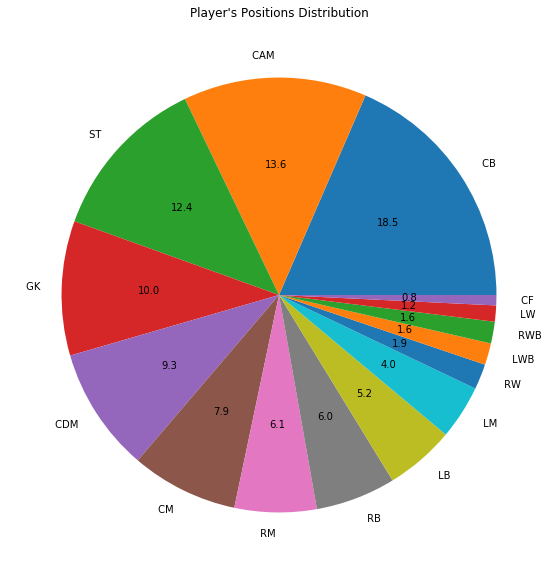

In [42]:
plt.figure(figsize=(10,10))
loc=player_list.BP.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

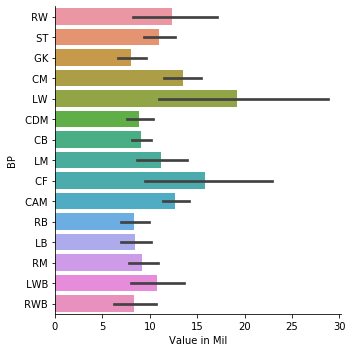

In [43]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="BP", x="Value in Mil", kind="bar",  data=player_list)
plt.show()

In [44]:
player_list.nlargest(10,columns="Value in Mil")[["Name","Age","Team & Contract","Value in Mil"]]

Name  Age      Team & Contract  Value in Mil
2       K. Mbappé     22  Paris Saint-Germain         194.0
23      E. Haaland    20    Borussia Dortmund         143.5
9          H. Kane    27    Tottenham Hotspur         129.5
5       Neymar Jr     29  Paris Saint-Germain         129.0
4    K. De Bruyne     30      Manchester City         125.5
1   R. Lewandowski    32    FC Bayern München         119.5
12   G. Donnarumma    22  Paris Saint-Germain         119.5
30    F. de Jong      24         FC Barcelona         119.5
8         M. Salah    29            Liverpool         117.5
3         J. Oblak    28   Atlético de Madrid         112.0

In [45]:
player_list.nlargest(10,columns="OVA")[["Name","Age","Team & Contract","OVA"]]

Name  Age      Team & Contract  OVA
0          L. Messi      34  Paris Saint-Germain   93
1      R. Lewandowski    32    FC Bayern München   92
2          K. Mbappé     22  Paris Saint-Germain   91
3            J. Oblak    28   Atlético de Madrid   91
4       K. De Bruyne     30      Manchester City   91
5          Neymar Jr     29  Paris Saint-Germain   91
6  Cristiano Ronaldo     36    Manchester United   91
7           N. Kanté     30              Chelsea   90
8            M. Salah    29            Liverpool   90
9             H. Kane    27    Tottenham Hotspur   90


### EDA for attackers

In [46]:
attack_player_list

Name  Value  Age  OVA  POT       Team & Contract  Height  \
0            L. Messi      78.0   34   93   93   Paris Saint-Germain     170   
1        R. Lewandowski   119.5   32   92   92     FC Bayern München     185   
2            K. Mbappé    194.0   22   91   95   Paris Saint-Germain     182   
3            Neymar Jr    129.0   29   91   91   Paris Saint-Germain     175   
4    Cristiano Ronaldo     45.0   36   91   91     Manchester United     187   
..                   ...    ...  ...  ...  ...                   ...     ...   
589       S. Adegbenro      2.3   25   71   72        IFK Norrköping     178   
590        K. Coulibaly     1.9   29   71   71             FC Nantes     197   
591        M. Osmajić       4.2   21   71   81              Cádiz CF     185   
592        C. Woodrow       2.4   26   71   73              Barnsley     184   
593          L. Mothiba     2.8   25   71   76  RC Strasbourg Alsace     182   

     Weight    foot  BOV   BP  Growth  Wage in Thousand  \
0        72    Left   93   RW       0             320.0   
1        81   Right   92   ST       0             270.0   
2        73   Right   92   ST       4             230.0   
3        68   Right   91   LW       0             270.0   
4        83   Right   91   ST       0             270.0   
..      ...     ...  ...  ...     ...               ...   
589      75   Right   72   ST       1               6.0   
590      87   Right   71   ST       0              18.0   
591      76   Right   73   ST      10              15.0   
592      74   Right   73   ST       2              29.0   
593      76   Right   73   ST       5              16.0   

     Release Clause in Mil  Attacking  Crossing  Finishing  Heading Accuracy  \
0                    144.3        429        85         95                70   
1                    197.2        430        71         95                90   
2                    373.5        411        78         93                72   
3                    238.7        403        85         83                63   
4                     83.3        438        87         95                90   
..                     ...        ...       ...        ...               ...   
589                    3.0        315        61         67                68   
590                    3.8        338        62         69                71   
591                   10.1        331        64         74                72   
592                    4.6        318        44         73                67   
593                    5.8        332        54         73                70   

     Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0               91       88    470         96     93           94   
1               85       89    407         85     79           85   
2               85       83    404         93     80           69   
3               86       86    446         95     88           87   
4               80       86    418         88     81           84   
..             ...      ...    ...        ...    ...          ...   
589             60       59    322         74     61           63   
590             68       68    269         66     46           39   
591             63       58    293         66     56           49   
592             66       68    299         69     53           46   
593             66       69    305         71     59           51   

     Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
0              91            96       451            91            80   
1              70            88       408            77            79   
2              71            91       462            97            97   
3              81            95       451            93            89   
4              77            88       426            84            88   
..            ...           ...       ...           ...           ...   
589            51            73       428        

In [47]:
attack_player_list.nlargest(5,columns="Value")[["Name","Age","Team & Contract","Value"]]

Name  Age      Team & Contract  Value
2      K. Mbappé     22  Paris Saint-Germain  194.0
9      E. Haaland    20    Borussia Dortmund  143.5
6         H. Kane    27    Tottenham Hotspur  129.5
3      Neymar Jr     29  Paris Saint-Germain  129.0
1  R. Lewandowski    32    FC Bayern München  119.5

In [48]:
attack_player_list.nlargest(5,columns="OVA")[["Name","Age","Team & Contract","OVA"]]

Name  Age      Team & Contract  OVA
0          L. Messi      34  Paris Saint-Germain   93
1      R. Lewandowski    32    FC Bayern München   92
2          K. Mbappé     22  Paris Saint-Germain   91
3          Neymar Jr     29  Paris Saint-Germain   91
4  Cristiano Ronaldo     36    Manchester United   91

In [49]:
pd.DataFrame(attack_player_list.groupby("BP").Value.mean().sort_values(ascending=False)).head(5)

Value
BP            
 LW  19.152273
 CF  15.771429
 RW  12.368116
 ST  10.928918

In [50]:
attack_player_list[["Age","Height","Weight"]].describe()

Age      Height      Weight
count  594.000000  594.000000  594.000000
mean    28.048822  182.018519   77.195286
std      3.991472    6.638687    7.156566
min     18.000000  163.000000   59.000000
25%     25.000000  178.000000   72.000000
50%     28.000000  182.000000   77.000000
75%     31.000000  187.000000   82.000000
max     39.000000  201.000000   98.000000

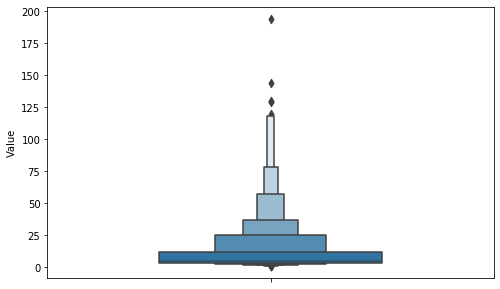

In [51]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=attack_player_list, width=0.5)
plt.show()

C:\Users\Mayank Gubba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


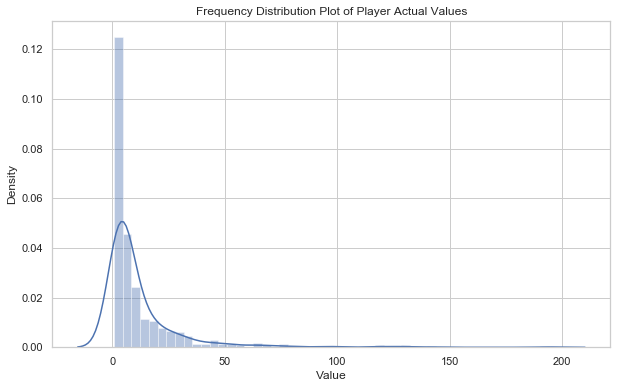

In [52]:
x = attack_player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

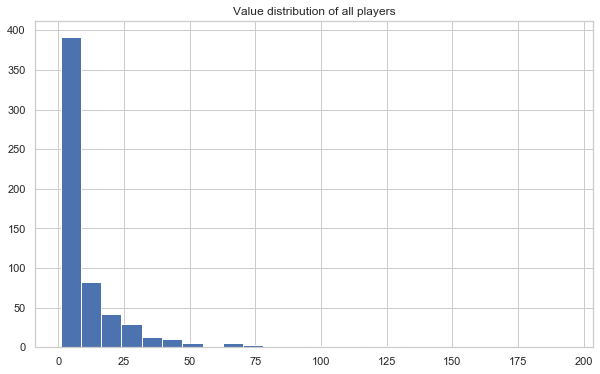

In [53]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=attack_player_list)
plt.title('Value distribution of all players')
plt.show()

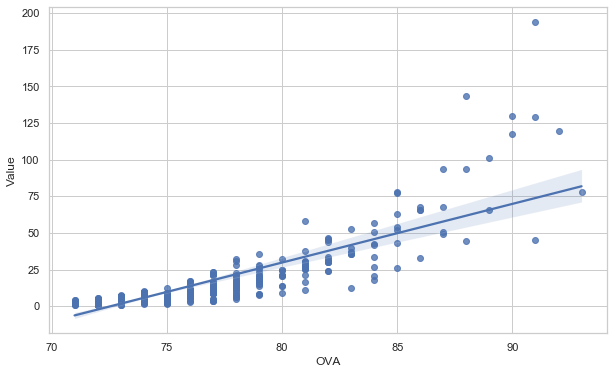

In [54]:
plt.figure(figsize=(10,6))
sns.regplot(x="OVA",y="Value",data=attack_player_list)
plt.show()

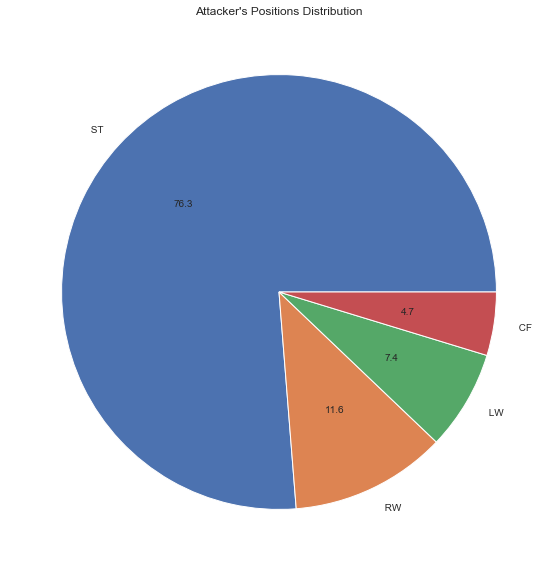

In [55]:
plt.figure(figsize=(10,10))
loc=attack_player_list.BP.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Attacker's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

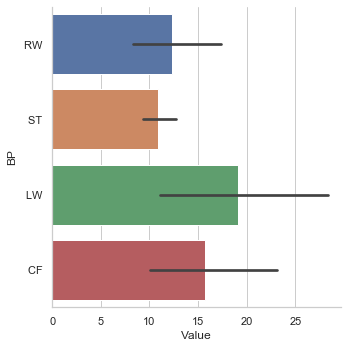

In [56]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="BP", x="Value", kind="bar",  data=attack_player_list)
plt.show()

### EDA for Mid-Fielders

In [57]:
mid_player_list.nlargest(5,columns="Value")[["Name","Age","Team & Contract","Value"]]

Name  Age    Team & Contract  Value
0    K. De Bruyne     30    Manchester City  125.5
7     F. de Jong      24       FC Barcelona  119.5
2      J. Kimmich     26  FC Bayern München  108.0
5  Bruno Fernandes    26  Manchester United  107.5
4          H. Son     28  Tottenham Hotspur  104.0

In [58]:
mid_player_list.nlargest(5,columns="OVA")[["Name","Age","Team & Contract","OVA"]]

Name  Age    Team & Contract  OVA
0  K. De Bruyne     30    Manchester City   91
1      N. Kanté     30            Chelsea   90
2    J. Kimmich     26  FC Bayern München   89
3       Casemiro    29     Real Madrid CF   89
4        H. Son     28  Tottenham Hotspur   89

In [59]:
pd.DataFrame(mid_player_list.groupby("BP").Value.mean().sort_values(ascending=False)).head(5)

Value
BP             
 CM   13.481787
 CAM  12.704349
 LM   11.178435
 RM    9.178475
 CDM   8.837404

In [60]:
mid_player_list[["Age","Height","Weight"]].describe()

Age       Height       Weight
count  1499.000000  1499.000000  1499.000000
mean     26.989326   178.310874    72.734490
std       4.028423     5.897383     5.827535
min      17.000000   158.000000    55.000000
25%      24.000000   174.000000    69.000000
50%      27.000000   178.000000    73.000000
75%      30.000000   183.000000    77.000000
max      40.000000   197.000000    96.000000

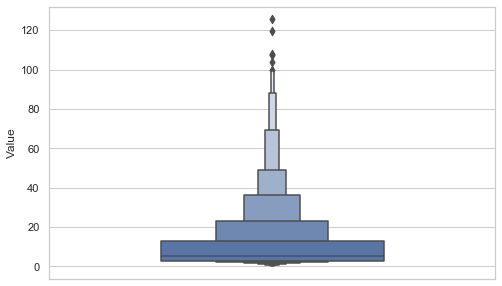

In [61]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=mid_player_list, width=0.5)
plt.show()

C:\Users\Mayank Gubba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


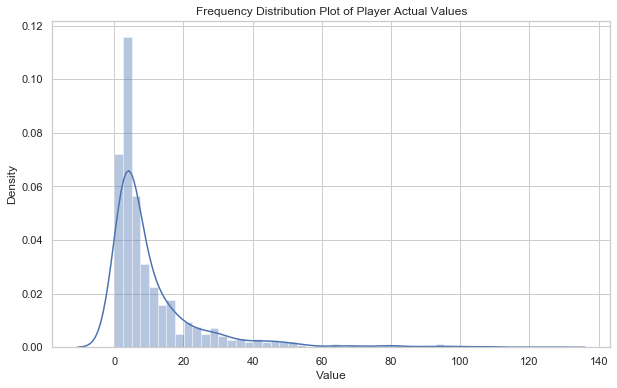

In [62]:
x = mid_player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

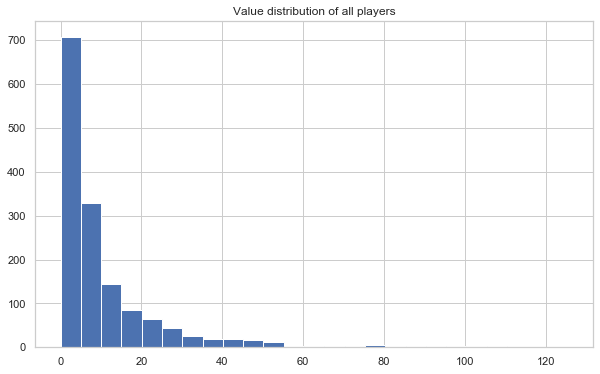

In [63]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=mid_player_list)
plt.title('Value distribution of all players')
plt.show()

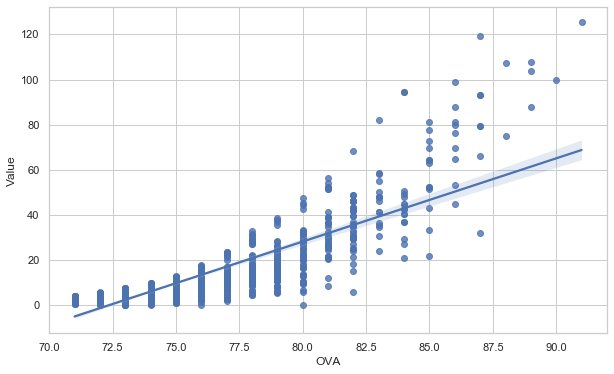

In [64]:
plt.figure(figsize=(10,6))
sns.regplot(x="OVA",y="Value",data=mid_player_list)
plt.show()

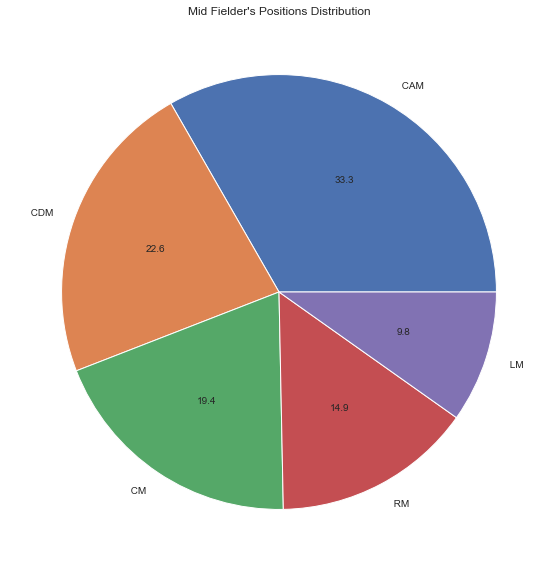

In [65]:
plt.figure(figsize=(10,10))
loc=mid_player_list.BP.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Mid Fielder's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

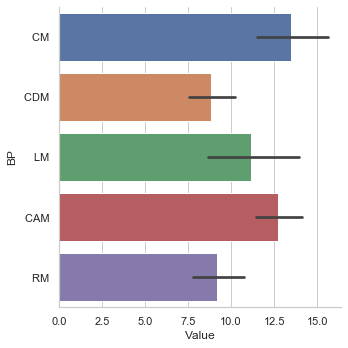

In [66]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="BP", x="Value", kind="bar",  data=mid_player_list)
plt.show()

### EDA for defenders

In [67]:
defend_player_list.nlargest(5,columns="Value")[["Name","Age","Team & Contract","Value"]]

Name  Age      Team & Contract  Value
1           Rúben Dias    24      Manchester City  111.5
2  T. Alexander-Arnold    22            Liverpool  102.5
4           Marquinhos    27  Paris Saint-Germain   90.5
0          V. van Dijk    29            Liverpool   86.0
3         A. Robertson    27            Liverpool   83.5

In [68]:
defend_player_list.nlargest(5,columns="OVA")[["Name","Age","Team & Contract","OVA"]]

Name  Age      Team & Contract  OVA
0          V. van Dijk    29            Liverpool   89
1           Rúben Dias    24      Manchester City   88
2  T. Alexander-Arnold    22            Liverpool   87
3         A. Robertson    27            Liverpool   87
4           Marquinhos    27  Paris Saint-Germain   87

In [69]:
pd.DataFrame(mid_player_list.groupby("BP").Value.mean().sort_values(ascending=False)).head(5)

Value
BP             
 CM   13.481787
 CAM  12.704349
 LM   11.178435
 RM    9.178475
 CDM   8.837404

In [70]:
defend_player_list[["Age","Height","Weight"]].describe()

Age       Height       Weight
count  1202.000000  1202.000000  1202.000000
mean     27.507488   183.085691    77.451747
std       3.842489     6.390835     6.755989
min      18.000000   163.000000    60.000000
25%      25.000000   178.000000    73.000000
50%      28.000000   183.000000    77.500000
75%      30.000000   188.000000    82.000000
max      39.000000   200.000000   100.000000

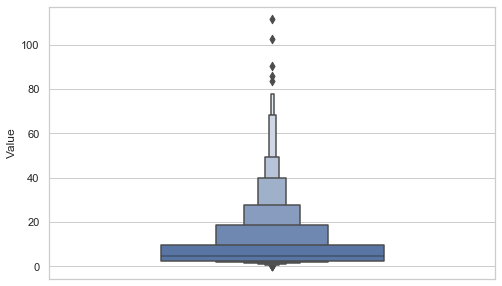

In [71]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=defend_player_list, width=0.5)
plt.show()

C:\Users\Mayank Gubba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


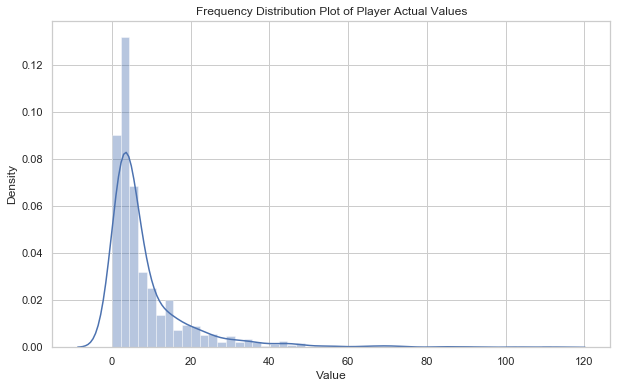

In [72]:
x = defend_player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

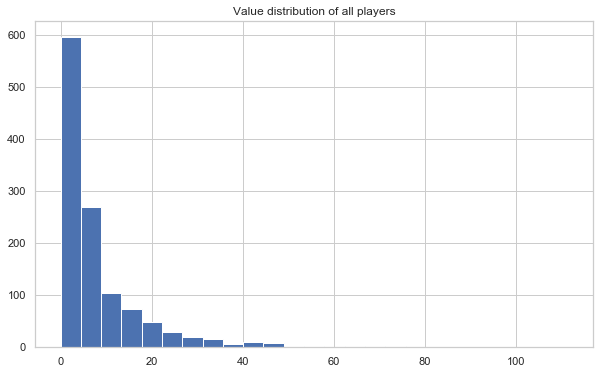

In [73]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=defend_player_list)
plt.title('Value distribution of all players')
plt.show()

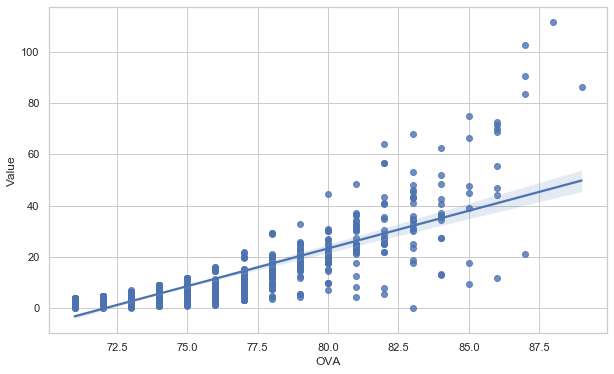

In [74]:
plt.figure(figsize=(10,6))
sns.regplot(x="OVA",y="Value",data=defend_player_list)
plt.show()

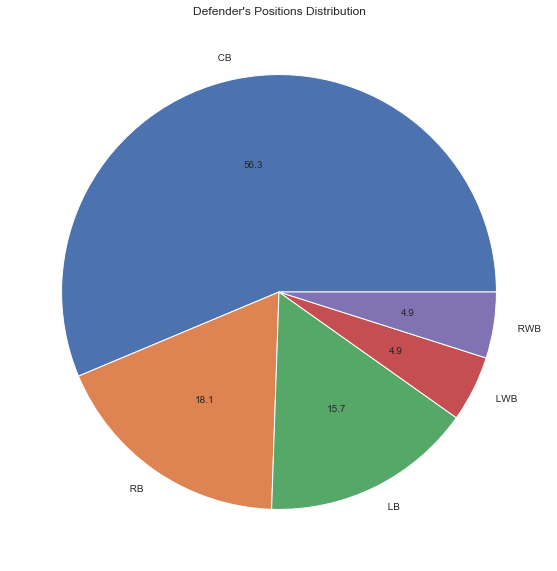

In [75]:
plt.figure(figsize=(10,10))
loc=defend_player_list.BP.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Defender's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

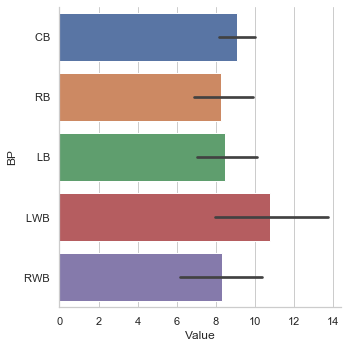

In [76]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="BP", x="Value", kind="bar",  data=defend_player_list)
plt.show()

### EDA for GoalKeeper

In [77]:
goalkeeper_player_list.nlargest(5,columns="Value")[["Name","Age","Team & Contract","Value"]]

Name  Age      Team & Contract  Value
3  G. Donnarumma    22  Paris Saint-Germain  119.5
0       J. Oblak    28   Atlético de Madrid  112.0
1  M. ter Stegen    29         FC Barcelona   99.0
5        Ederson    27      Manchester City   94.0
6    T. Courtois    29       Real Madrid CF   85.5

In [78]:
goalkeeper_player_list.nlargest(5,columns="OVA")[["Name","Age","Team & Contract","OVA"]]

Name  Age      Team & Contract  OVA
0       J. Oblak    28   Atlético de Madrid   91
1  M. ter Stegen    29         FC Barcelona   90
2       M. Neuer    35    FC Bayern München   90
3  G. Donnarumma    22  Paris Saint-Germain   89
4        Alisson    28            Liverpool   89

In [79]:
pd.DataFrame(goalkeeper_player_list.groupby("BP").Value.mean().sort_values(ascending=False)).head(5)

Value
BP           
 GK  8.047104

In [80]:
goalkeeper_player_list[["Age","Height","Weight"]].describe()

Age      Height      Weight
count  366.000000  366.000000  366.000000
mean    29.693989  189.448087   83.814208
std      4.500145    4.558453    6.043080
min     19.000000  177.000000   67.000000
25%     27.000000  186.250000   80.000000
50%     29.000000  189.500000   83.000000
75%     33.000000  192.000000   88.000000
max     43.000000  202.000000  103.000000

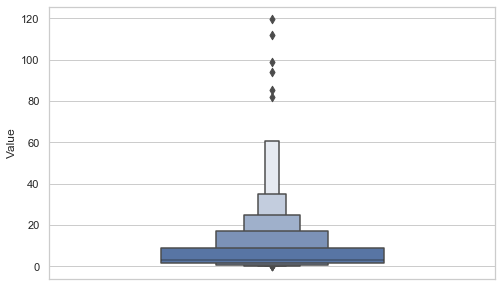

In [81]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=goalkeeper_player_list, width=0.5)
plt.show()

C:\Users\Mayank Gubba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


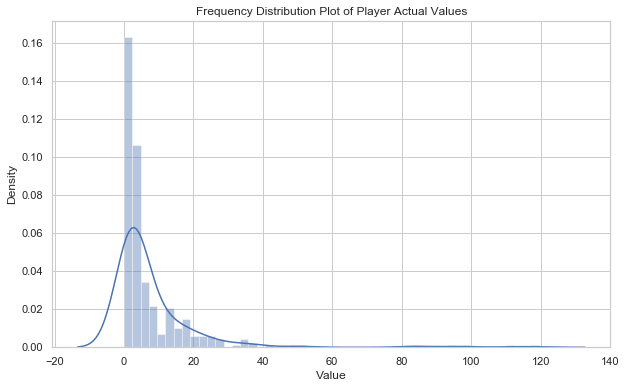

In [82]:
x = goalkeeper_player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

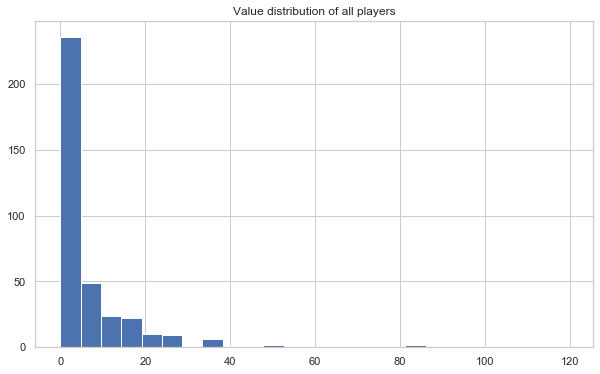

In [83]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=goalkeeper_player_list)
plt.title('Value distribution of all players')
plt.show()

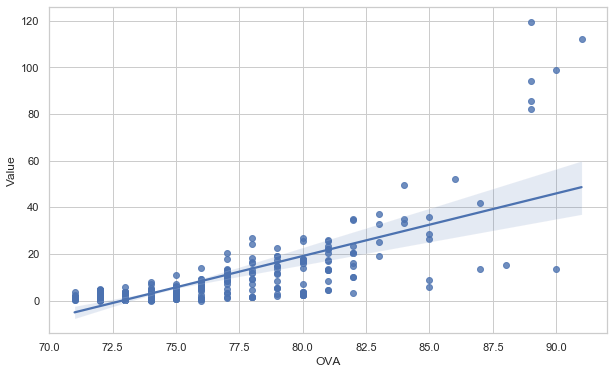

In [84]:
plt.figure(figsize=(10,6))
sns.regplot(x="OVA",y="Value",data=goalkeeper_player_list)
plt.show()

## Model For Attacker

### Dropping the derived features

In [85]:
attack_player_list.drop(['Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Total Stats', 'Base Stats'], axis=1, inplace=True)

### Correlation matrix

In [86]:
attack_corr_mat = attack_player_list.corr()
attack_corr_mat

Value       Age       OVA       POT    Height  \
Value                  1.000000 -0.115117  0.845314  0.769733 -0.021807   
Age                   -0.115117  1.000000  0.100819 -0.338321 -0.024790   
OVA                    0.845314  0.100819  1.000000  0.816481 -0.009789   
POT                    0.769733 -0.338321  0.816481  1.000000  0.040106   
Height                -0.021807 -0.024790 -0.009789  0.040106  1.000000   
Weight                -0.009180  0.033670 -0.000122 -0.003033  0.753006   
BOV                    0.848683 -0.043198  0.976003  0.888555  0.003095   
Growth                 0.075291 -0.733979 -0.073483  0.515814  0.083801   
Wage in Thousand       0.189882  0.007244  0.127492  0.111156 -0.065131   
Release Clause in Mil  0.995829 -0.137487  0.837557  0.779682 -0.020363   
Crossing               0.280159  0.153668  0.361072  0.198507 -0.380304   
Finishing              0.628952  0.090277  0.761282  0.659128  0.203216   
Heading Accuracy       0.128261  0.116791  0.211664  0.186906  0.503099   
Short Passing          0.571102  0.145040  0.696554  0.542299 -0.118045   
Volleys                0.466176  0.281004  0.625465  0.426842  0.157544   
Dribbling              0.574952 -0.018672  0.665668  0.563773 -0.322316   
Curve                  0.359798  0.164842  0.455246  0.291258 -0.281638   
FK Accuracy            0.235013  0.294567  0.337367  0.122884 -0.296739   
Long Passing           0.328154  0.154346  0.414162  0.268934 -0.290506   
Ball Control           0.660800  0.112714  0.807924  0.657181 -0.130919   
Acceleration           0.261832 -0.316535  0.219100  0.304230 -0.537047   
Sprint Speed           0.269307 -0.360423  0.207718  0.304112 -0.341839   
Agility                0.269392 -0.150729  0.268430  0.259746 -0.648014   
Reactions              0.662848  0.154214  0.801691  0.614804  0.004236   
Balance                0.215788 -0.087456  0.202489  0.194527 -0.747864   
Shot Power             0.417834  0.162606  0.559082  0.420605  0.241290   
Jumping                0.062254 -0.020452  0.088611  0.114170  0.003099   
Stamina                0.288327 -0.244694  0.281462  0.309837  0.003689   
Strength               0.039800  0.059058  0.077814  0.088696  0.693931   
Long Shots             0.480107  0.186856  0.609185  0.426851 -0.086912   
Aggression             0.109693  0.163589  0.179950  0.091730  0.217064   
Interceptions          0.121459  0.176975  0.180045  0.053516 -0.155128   
Positioning            0.636494  0.202394  0.796252  0.621201  0.121099   
Vision                 0.445379  0.201618  0.562897  0.368932 -0.176369   
Penalties              0.323357  0.306677  0.424695  0.271994  0.123541   
Composure              0.553024  0.288649  0.704849  0.488551 -0.016388   
W/F                    0.142207  0.061600  0.144009  0.110410 -0.128236   
SM                     0.306865  0.133340  0.377493  0.265103 -0.264223   
IR                     0.620930  0.289745  0.706272  0.505623  0.029603   
PAC                    0.276429 -0.351392  0.221469  0.314796 -0.447894   
SHO                    0.651671  0.196469  0.819263  0.645897  0.169606   
PAS                    0.467779  0.209378  0.590909  0.388000 -0.310309   
DRI                    0.626346  0.012797  0.728549  0.607329 -0.419689   
DEF                    0.138048  0.107460  0.196710  0.097697 -0.080256   
PHY                    0.150416  0.019932  0.197801  0.187666  0.545511   

                         Weight       BOV    Growth  Wage in Thousand  \
Value                 -0.009180  0.848683  0.075291          0.189882   
Age                    0.033670 -0.043198 -0.733979          0.007244   
OVA                   -0.000122  0.976003 -0.073483          0.127492   
POT                   -0.003033  0.888555  0.515814          0.111156   
Height                 0.753006  0.003095  0.083801         -0.065131   
Weight                 1.000000  0.000854 -0.005059         -0.030201   
BOV                    0.000854  1.000000  0.086618          0.1

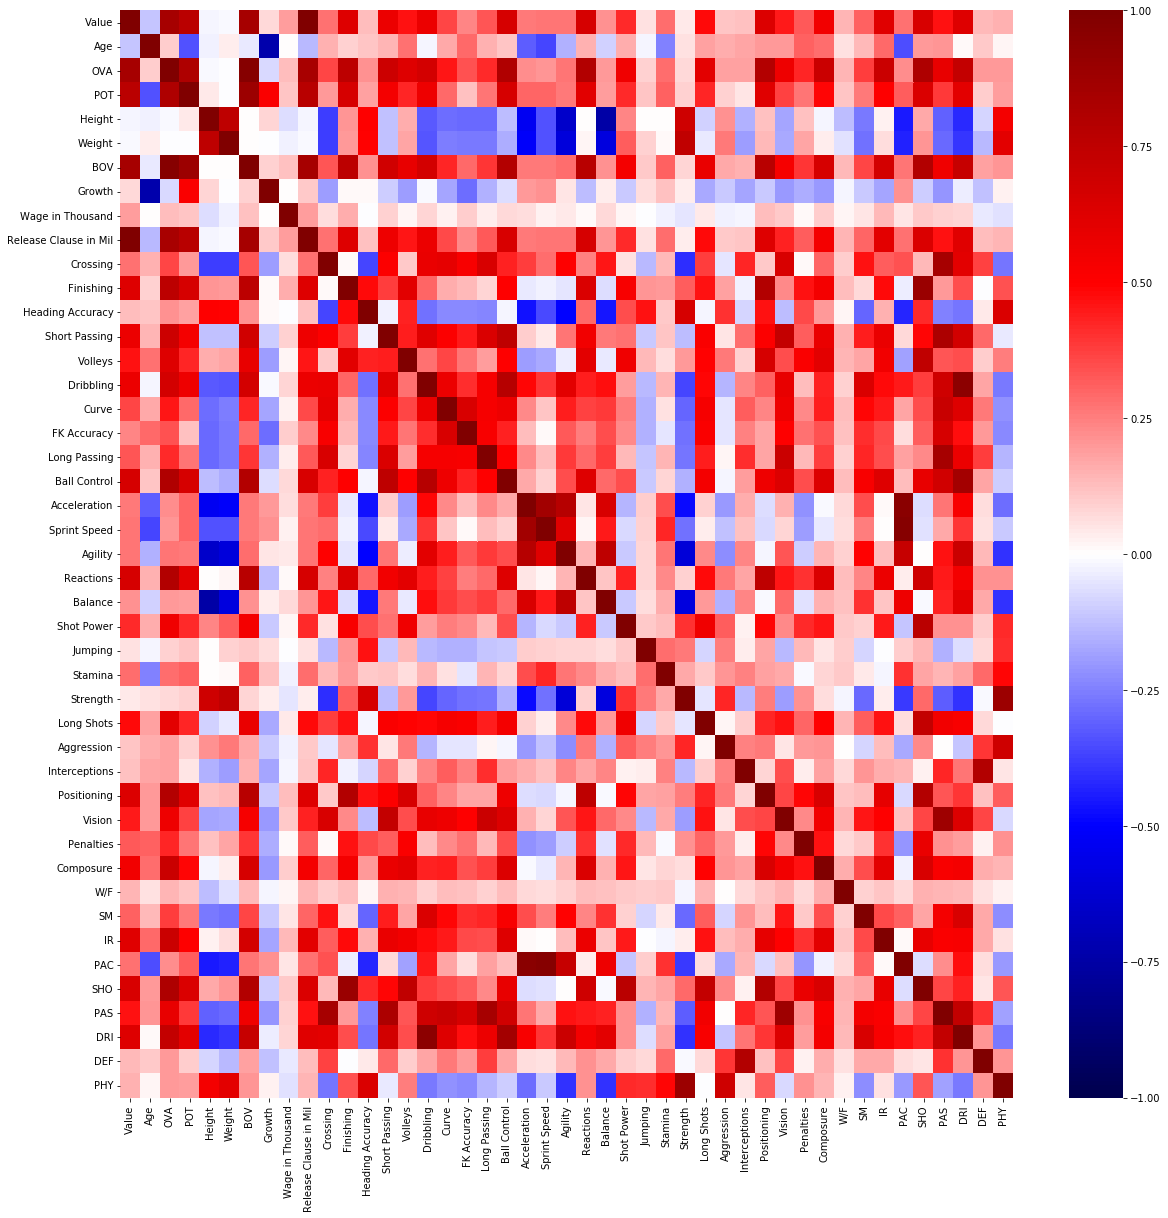

In [87]:
plt.figure(figsize=(20,20)),
plt.style.use('default')
sns.heatmap(attack_player_list.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);
plt.show()

In [88]:
pd.DataFrame(attack_corr_mat["Value"]).sort_values("Value", ascending=True).head(20)

Value
Age              -0.115117
Height           -0.021807
Weight           -0.009180
Strength          0.039800
Jumping           0.062254
Growth            0.075291
Aggression        0.109693
Interceptions     0.121459
Heading Accuracy  0.128261
DEF               0.138048
W/F               0.142207
PHY               0.150416
Wage in Thousand  0.189882
Balance           0.215788
FK Accuracy       0.235013
Acceleration      0.261832
Sprint Speed      0.269307
Agility           0.269392
PAC               0.276429
Crossing          0.280159

In [89]:
attack_player_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   594 non-null    object 
 1   Value                  594 non-null    float64
 2   Age                    594 non-null    int32  
 3   OVA                    594 non-null    int32  
 4   POT                    594 non-null    int32  
 5   Team & Contract        594 non-null    object 
 6   Height                 594 non-null    int32  
 7   Weight                 594 non-null    int32  
 8   foot                   594 non-null    object 
 9   BOV                    594 non-null    int32  
 10  BP                     594 non-null    object 
 11  Growth                 594 non-null    int32  
 12  Wage in Thousand       594 non-null    float64
 13  Release Clause in Mil  594 non-null    float64
 14  Crossing               594 non-null    int32  
 15  Finish

## Dropping the categorical and textual features

In [90]:
attack_X = attack_player_list.drop(columns=["Value","Team & Contract","BP", "A/W", "D/W","foot" ])
attack_Y = attack_player_list.loc[:,"Value"]

In [91]:
attack_X_train, attack_X_test, attack_y_train, attack_y_test = train_test_split(attack_X,attack_Y,test_size=0.2, random_state=10)

attacker_name_train = attack_X_train.Name
attacker_name_test = attack_X_test.Name

attack_X_train = attack_X_train.drop(columns=['Name'])
attack_X_test = attack_X_test.drop(columns=['Name'])

attack_lr = LinearRegression()
attack_lr.fit(attack_X_train,attack_y_train)

LinearRegression()

In [92]:
attack_y_pred = attack_lr.predict(attack_X_train)
attack_df = pd.DataFrame({'Name':attacker_name_train,'Actual': attack_y_train, 'Predicted': attack_y_pred})
attack_df["Difference"] = attack_df["Actual"]-attack_df["Predicted"]
attack_df = round(attack_df.sort_values('Difference').set_index('Name'),2)
attack_df

Actual  Predicted  Difference
Name                                                 
Oyarzabal                 77.5      85.89       -8.39
M. Depay                  63.0      69.32       -6.32
A. Isak                   45.0      50.85       -5.85
K. Benzema                66.0      71.42       -5.42
Gerard Moreno             68.0      73.18       -5.18
E. Hazard                 52.0      56.57       -4.57
L. Suárez                 44.5      49.05       -4.55
Iñaki Williams            30.0      34.31       -4.31
S. Agüero                 51.0      55.03       -4.03
Puado                     28.0      31.85       -3.85
B. Dia                    22.5      26.33       -3.83
Ansu Fati                 17.5      21.24       -3.74
L. Ocampos                39.5      43.08       -3.58
Borja Iglesias            21.5      24.47       -2.97
Suso                      32.5      35.44       -2.94
De Tomás                  25.0      27.74       -2.74
Portu                     30.0      32.56       -2.56
E. Ávila                  20.5      22.98       -2.48
Paco Alcácer              28.0      30.46       -2.46
L. Suárez                 23.5      25.90       -2.40
Rafa Mir                  21.5      23.81       -2.31
Roger                     20.5      22.80       -2.30
Negredo                    6.0       8.23       -2.23
Morales                   16.5      18.71       -2.21
Falcao                     6.0       8.12       -2.12
Gervinho                   2.6       4.69       -2.09
Iago Aspas                27.0      28.97       -1.97
J. David                  32.0      33.96       -1.96
L. Ajorque                16.5      18.43       -1.93
G. Zardes                  3.0       4.70       -1.70
I. Toney                  10.5      12.16       -1.66
S. Palacios                7.5       9.13       -1.63
J. Beauguel                5.5       7.12       -1.62
M. Dembélé                20.5      22.08       -1.58
Lucas Pérez               14.0      15.55       -1.55
D. Calvert-Lewin          37.5      39.05       -1.55
T. Nguen                   4.5       6.03       -1.53
Rochinha                   9.0      10.37       -1.37
A. Budimir                14.0      15.35       -1.35
J. Kuchta                 11.0      12.34       -1.34
K. Gameiro                 5.0       6.34       -1.34
Júnior Moraes              7.0       8.34       -1.34
L. Jović                  27.0      28.30       -1.30
O. Watkins                21.0      22.29       -1.29
G. Mastriani               2.4       3.69       -1.29
M. Balotelli               7.5       8.78       -1.28
A. Mitrović                9.0      10.27       -1.27
Santi da Bruma             2.6       3.85       -1.25
Quaresma                   3.4       4.61       -1.21
Soares                    10.5      11.68       -1.18
M. Waris                   1.9       3.05       -1.15
N. Pépé                   25.0      26.15       -1.15
S. Rondón                  9.0      10.14       -1.14
L. Cavallini               2.4       3.53       -1.13
Éder                       1.9       3.01       -1.11
M. Braithwaite            10.5      11.58       -1.08
E. Cavani                 26.0      27.08       -1.08
Y. El Arabi                8.5       9.57       -1.07
R. Yaremchuk              14.0      15.05       -1.05
K. Dolberg                25.5      26.54       -1.04
Santi Mina                15.0      16.03       -1.03
Paulinho                  18.0      19.02       -1.02
A. Hložek                 16.0      17.00       -1.00
G. Bergessio               1.9       2.90       -1.00
H. Akbunar                 4.5       5.50       -1.00
P. Bamford                15.0      15.99       -0.99
E. Valencia                4.8       5.76       -0.96
M. Uzuni                   6.5       7.45       -0.95
K. Świderski               6.5       7.45       -0.95
F. Boli                    2.5       3.43       -0.93
M. Niang                  10.0      10.92       -0.92
Luimo Boas Santos         21.0      21.91       -0.91
I. Schranz                 4

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(attack_y_train, attack_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(attack_y_train, attack_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_train, attack_y_pred)))
print('Linear Regression R^2:',attack_lr.score(attack_X_train,attack_y_train))

Mean Absolute Error: 0.9050885269006042
Mean Squared Error: 2.04168463774281
Root Mean Squared Error: 1.428875305176351
Linear Regression R^2: 0.9941902839459479


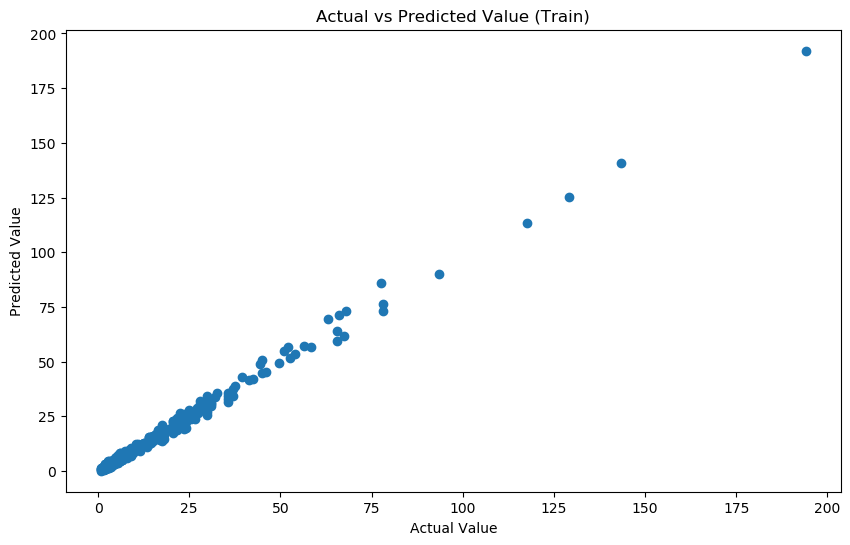

In [94]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(attack_y_train, attack_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [95]:
attack_y_pred_test = attack_lr.predict(attack_X_test)
attack_df = pd.DataFrame({'Name':attacker_name_test,'Actual': attack_y_test, 'Predicted': attack_y_pred_test})
attack_df["Difference"] = attack_df["Actual"]-attack_df["Predicted"]
attack_df = round(attack_df.sort_values('Difference').set_index('Name'),2)
attack_df

Actual  Predicted  Difference
Name                                             
Y. En-Nesyri          44.0      48.71       -4.71
M. Gómez              32.0      34.98       -2.98
A. Januzaj            28.0      30.65       -2.65
M. Oršić              10.5      12.66       -2.16
C. Bacca               5.0       7.09       -2.09
A. Cornelius           3.1       4.84       -1.74
M. Diouf               1.9       3.51       -1.61
Sebas Couteira         2.8       4.27       -1.47
Richarlison           46.5      47.78       -1.28
H. Seferović          14.0      15.27       -1.27
L. Höler               2.8       3.99       -1.19
S. Mounié              5.0       6.19       -1.19
G. Laborde            24.5      25.57       -1.07
C. Wilson             17.5      18.48       -0.98
D. Rolán               2.4       3.33       -0.93
C. Bassogog            3.7       4.52       -0.82
R. Sterling           94.0      94.81       -0.81
T. Kadewere           10.0      10.80       -0.80
J. Vardy              33.0      33.78       -0.78
P. Aubameyang         43.5      44.22       -0.72
Fabri Arnoia           3.0       3.70       -0.70
T. Henry               5.0       5.63       -0.63
Llorente               1.0       1.62       -0.62
V. Germain             3.6       4.18       -0.58
G. Lapadula            2.6       3.17       -0.57
Marcos André           8.5       8.99       -0.49
C. Woodrow             2.4       2.86       -0.46
M. Taremi             18.0      18.45       -0.45
Nuno Lisareda          3.6       4.05       -0.45
Mariano                6.0       6.42       -0.42
A. Delort             25.5      25.89       -0.39
A. Modeste             2.7       3.06       -0.36
Manu Vallejo           8.5       8.84       -0.34
B. Samudio             3.8       4.12       -0.32
Nélson Oliveira        3.0       3.29       -0.29
C. Wood               17.5      17.74       -0.24
J. Forrest             5.5       5.73       -0.23
W. Zaha               30.5      30.73       -0.23
S. Adamyan             4.2       4.43       -0.23
L. Boyé                6.5       6.70       -0.20
M. Rangel              4.1       4.27       -0.17
N. Jørgensen           2.3       2.47       -0.17
S. Mugoša              2.3       2.47       -0.17
Carlitos               2.6       2.74       -0.14
K. Piątek             10.0      10.13       -0.13
J. Briand              1.0       1.10       -0.10
L. Manyama             1.8       1.90       -0.10
Pietrson Mendes        2.6       2.69       -0.09
K. Przybyłko           3.1       3.18       -0.08
B. Hrgota              3.1       3.14       -0.04
F. Gulbrandsen         2.4       2.43       -0.03
F. Niederlechner       5.5       5.53       -0.03
L. Castro              1.5       1.52       -0.02
Gustavo Sauer          3.1       3.11       -0.01
B. Gomis               7.5       7.50        0.00
A. Belotti            30.0      29.95        0.05
M. Marega             10.5      10.44        0.06
P. Testroet            2.3       2.21        0.09
N. Orsini              5.0       4.88        0.12
David Ferreiro         1.5       1.38        0.12
J. Allevinah           2.8       2.67        0.13
M. Demir               2.3       2.09        0.21
Leandro Damião         2.6       2.38        0.22
A Lan                  9.0       8.78        0.22
P. Hofmann             2.4       2.16        0.24
S. Terodde             3.6       3.32        0.28
N. Maupay             16.0      15.71        0.29
E. Copetti             3.1       2.79        0.31
Y. Mutō                2.4       2.02        0.38
C. Robinson            4.0       3.58        0.42
Silas                 12.5      12.07        0.43
S. Jovetić             9.0       8.55        0.45
Leandro Vivenço        2.8       2.34        0.46
A. Mehmedi             4.1       3.64        0.46
Marcos Júnior          3.1       2.61        0.49
Ricardo Lopes          2.3       1.79        0.51
Nicholas Aldair        4.2       3.69        0.51
O. Al Somah            6.0       5.48        0.52
J. Stanislas        

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(attack_y_test, attack_y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(attack_y_test, attack_y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_test, attack_y_pred_test)))
print('Linear Regression R^2:',attack_lr.score(attack_X_test,attack_y_test))

Mean Absolute Error: 1.097391853615492
Mean Squared Error: 4.211057320818537
Root Mean Squared Error: 2.0520860900114637
Linear Regression R^2: 0.9906628444581248


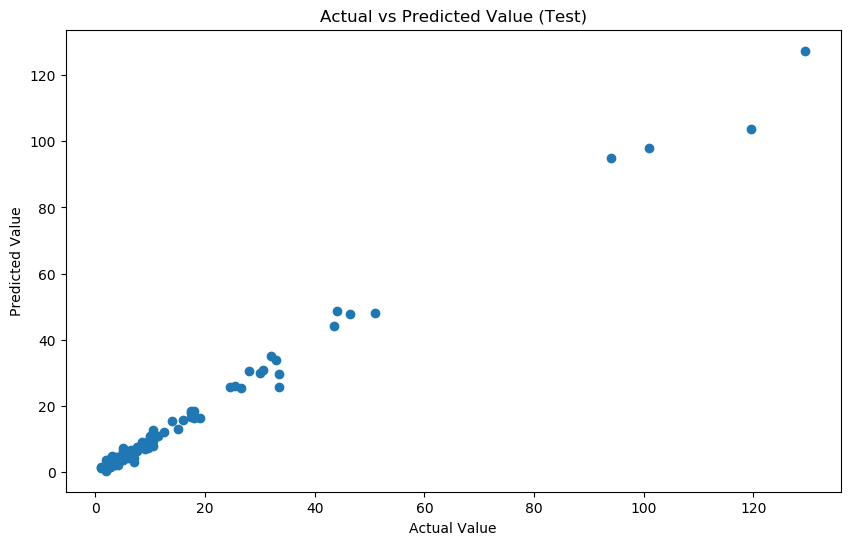

In [97]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(attack_y_test, attack_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [98]:
attack_lm = LinearRegression()
attack_scaler = StandardScaler()

attack_X_train_scaled = attack_scaler.fit_transform(attack_X_train.values)
attack_X_test_scaled = attack_scaler.transform(attack_X_test.values)

attack_lm_reg = Ridge(alpha=0.05, normalize=True)

attack_lm_lasso = Lasso(alpha=0.05, normalize=True)
attack_poly = PolynomialFeatures(degree=2) 

attack_X_train_poly = attack_poly.fit_transform(attack_X_train.values)
attack_X_test_poly = attack_poly.transform(attack_X_test.values)

attack_lm_poly = LinearRegression()

attack_lm.fit(attack_X_train, attack_y_train)
attack_lm_pred = attack_lm.predict(attack_X_test)
print(f'Linear Regression for test data R^2: {attack_lm.score(attack_X_test, attack_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_test, attack_lm_pred)))
print("")

attack_lm_reg.fit(attack_X_train_scaled, attack_y_train)
attack_lm_reg_pred = attack_lm_reg.predict(attack_X_test_scaled)
print(f'Ridge Regression for test data R^2: {attack_lm_reg.score(attack_X_test_scaled, attack_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_test, attack_lm_reg_pred)))
print("")


attack_lm_lasso.fit(attack_X_train,attack_y_train)
attack_lm_lasso_pred = attack_lm_lasso.predict(attack_X_test)
print(f'Lasso Regression for test data R^2: {attack_lm_lasso.score(attack_X_test, attack_y_test):.6f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_test, attack_lm_lasso_pred)))
print("")

attack_lm_poly.fit(attack_X_train_poly, attack_y_train)
attack_lm_poly_pred = attack_lm_poly.predict(attack_X_test_poly)
print(f'Degree 2 polynomial regression for test data R^2: {attack_lm_poly.score(attack_X_test_poly, attack_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_test, attack_lm_poly_pred)))

Linear Regression for test data R^2: 0.991
Root Mean Squared Error: 2.0520860900114584

Ridge Regression for test data R^2: 0.984
Root Mean Squared Error: 2.6878361809695916

Lasso Regression for test data R^2: 0.982507
Root Mean Squared Error: 2.808832574630864

Degree 2 polynomial regression for test data R^2: 0.958
Root Mean Squared Error: 4.349804532993871


C:\Users\Mayank Gubba\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
C:\Users\Mayank Gubba\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

## MODELLING WITH SVR

#### We applied SVR with 4 different kernals ('poly' , 'linear' , 'rbf' , 'sigmoid') where 'poly' was producing the best results in terms of R^2 score

In [99]:
svr = SVR(kernel='poly').fit(attack_X_train, attack_y_train)

In [100]:
attack_y_pred = svr.predict(attack_X_train)
attack_df = pd.DataFrame({'Name':attacker_name_train,'Actual': attack_y_train, 'Predicted': attack_y_pred})
attack_df["Difference"] = attack_df["Actual"]-attack_df["Predicted"]
attack_df_under = round(attack_df.sort_values('Difference').set_index('Name'),2)
attack_df_over = round(attack_df.sort_values('Difference').set_index('Name').tail(20),2)
attack_df_under

Actual  Predicted  Difference
Name                                                 
K. Mbappé                194.0     201.51       -7.51
L. Suárez                 44.5      50.82       -6.32
K. Benzema                66.0      71.82       -5.82
L. Ocampos                39.5      44.52       -5.02
M. Depay                  63.0      67.53       -4.53
Cristiano Ronaldo         45.0      49.24       -4.24
Oyarzabal                 77.5      81.38       -3.88
Iñaki Williams            30.0      33.53       -3.53
Gerard Moreno             68.0      71.33       -3.33
Ansu Fati                 17.5      20.23       -2.73
Morales                   16.5      19.23       -2.73
L. Messi                  78.0      80.72       -2.72
Iago Aspas                27.0      29.49       -2.49
E. Hazard                 52.0      54.44       -2.44
A. Isak                   45.0      46.90       -1.90
De Tomás                  25.0      26.88       -1.88
Portu                     30.0      31.75       -1.75
Puado                     28.0      29.33       -1.33
O. Edouard                15.0      16.16       -1.16
K. Gameiro                 5.0       6.13       -1.13
E. Ünal                    9.0      10.12       -1.12
Falcao                     6.0       7.09       -1.09
Y. El Arabi                8.5       9.59       -1.09
Negredo                    6.0       7.08       -1.08
S. Agüero                 51.0      52.07       -1.07
R. Babel                   2.6       3.61       -1.01
E. Ávila                  20.5      21.48       -0.98
Quaresma                   3.4       4.37       -0.97
L. Jović                  27.0      27.95       -0.95
M. Braithwaite            10.5      11.43       -0.93
Ayoze Pérez               11.0      11.92       -0.92
K. Volland                31.0      31.92       -0.92
A. Armstrong              12.0      12.92       -0.92
T. Pukki                   6.5       7.41       -0.91
A. Nwakaeme               11.0      11.91       -0.91
R. Nteka                   7.0       7.90       -0.90
Ángel                      7.0       7.89       -0.89
Júnior Moraes              7.0       7.88       -0.88
J. Kuchta                 11.0      11.87       -0.87
I. Cardona                 4.4       5.26       -0.86
Santi da Bruma             2.6       3.46       -0.86
L. Suárez                 23.5      24.36       -0.86
Gervinho                   2.6       3.45       -0.85
Lucas Pérez               14.0      14.83       -0.83
M. Sylla                   2.7       3.51       -0.81
I. Toney                  10.5      11.27       -0.77
Soldado                    3.6       4.35       -0.75
M. Cornet                  7.0       7.73       -0.73
A. Lozano                  4.3       5.03       -0.73
B. Yılmaz                 11.0      11.72       -0.72
Djaniny                    4.1       4.81       -0.71
Soares                    10.5      11.20       -0.70
A. El Ghazi                9.0       9.68       -0.68
F. Sotoca                  5.5       6.18       -0.68
D. Núñez                  17.0      17.67       -0.67
J. Ayew                    5.5       6.17       -0.67
I. Schranz                 4.6       5.26       -0.66
J. Maja                    3.8       4.43       -0.63
Santi Mina                15.0      15.62       -0.62
F. Quagliarella            4.8       5.42       -0.62
Dani Gómez                 4.9       5.52       -0.62
M. Uzuni                   6.5       7.11       -0.61
S. Palacios                7.5       8.11       -0.61
Bebé                       2.9       3.51       -0.61
A. Mitrović                9.0       9.59       -0.59
M. Vydra                   3.0       3.58       -0.58
C. Larin                   5.0       5.58       -0.58
J. Hernández               9.0       9.57       -0.57
Villalibre                 6.0       6.57       -0.57
Rafa Mir                  21.5      22.07       -0.57
Hwang Ui Jo                7.5       8.06       -0.56
J. Beauguel                5.5       6.05       -0.55
L. Tawamba                 2

In [101]:
score = svr.score(attack_X_train, attack_y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(attack_y_train, attack_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(attack_y_train, attack_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_train, attack_y_pred)))
print('SVR R^2:',score)

Mean Absolute Error: 0.7875960156265412
Mean Squared Error: 2.343523493883976
Root Mean Squared Error: 1.5308571108643603
SVR R^2: 0.993331386339607


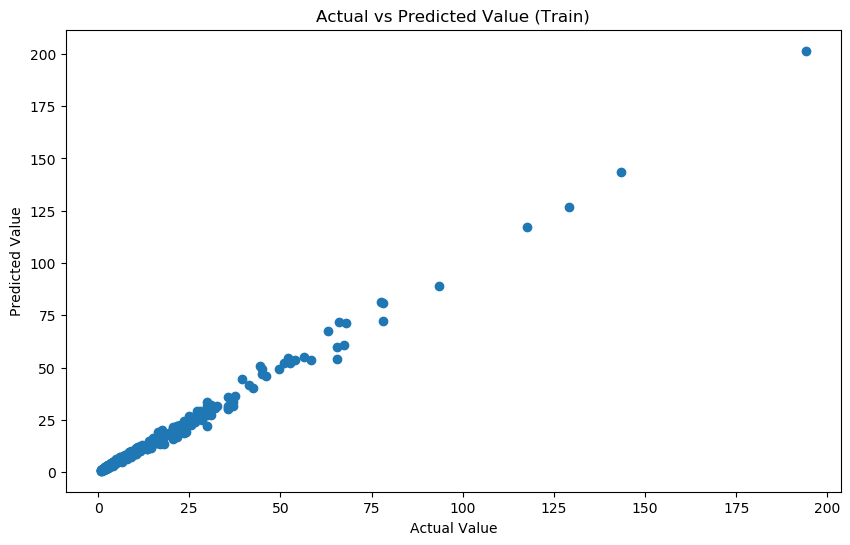

In [102]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(attack_y_train, attack_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [103]:
attack_y_pred_test = svr.predict(attack_X_test)
attack_df = pd.DataFrame({'Name':attacker_name_test,'Actual': attack_y_test, 'Predicted': attack_y_pred_test})
attack_df["Difference"] = attack_df["Actual"]-attack_df["Predicted"]
attack_df_under = round(attack_df.sort_values('Difference').set_index('Name'),2)
attack_df_over = round(attack_df.sort_values('Difference').set_index('Name').tail(20),2)
attack_df_under

Actual  Predicted  Difference
Name                                             
H. Kane              129.5     132.79       -3.29
J. Vardy              33.0      34.63       -1.63
M. Oršić              10.5      11.96       -1.46
Gonçalo Ramos          5.5       6.78       -1.28
M. Gómez              32.0      32.84       -0.84
Nuno Lisareda          3.6       4.39       -0.79
L. Castro              1.5       2.29       -0.79
T. Kadewere           10.0      10.78       -0.78
C. Bacca               5.0       5.77       -0.77
Manu Vallejo           8.5       9.24       -0.74
Mariano                6.0       6.67       -0.67
Richarlison           46.5      47.15       -0.65
Gustavo Sauer          3.1       3.69       -0.59
F. Gulbrandsen         2.4       2.97       -0.57
V. Germain             3.6       4.14       -0.54
G. Laborde            24.5      24.97       -0.47
S. Mounié              5.0       5.44       -0.44
A. Cornelius           3.1       3.52       -0.42
M. Diouf               1.9       2.31       -0.41
P. Aubameyang         43.5      43.89       -0.39
Sebas Couteira         2.8       3.16       -0.36
B. Hrgota              3.1       3.43       -0.33
T. Henry               5.0       5.32       -0.32
Nélson Oliveira        3.0       3.32       -0.32
B. Samudio             3.8       4.12       -0.32
L. Nmecha              9.0       9.30       -0.30
H. Seferović          14.0      14.30       -0.30
L. Boyé                6.5       6.80       -0.30
C. Bassogog            3.7       4.00       -0.30
Nicholas Aldair        4.2       4.48       -0.28
M. Taremi             18.0      18.27       -0.27
S. Adamyan             4.2       4.46       -0.26
N. Jørgensen           2.3       2.56       -0.26
A. Modeste             2.7       2.94       -0.24
C. Woodrow             2.4       2.64       -0.24
Marcos André           8.5       8.73       -0.23
Pietrson Mendes        2.6       2.83       -0.23
C. Robinson            4.0       4.22       -0.22
Llorente               1.0       1.22       -0.22
L. Höler               2.8       3.01       -0.21
B. Gomis               7.5       7.70       -0.20
K. Przybyłko           3.1       3.29       -0.19
J. Forrest             5.5       5.68       -0.18
Fabri Arnoia           3.0       3.17       -0.17
M. Demir               2.3       2.47       -0.17
J. Briand              1.0       1.13       -0.13
F. Niederlechner       5.5       5.60       -0.10
Leandro Vivenço        2.8       2.90       -0.10
Ricardo Lopes          2.3       2.38       -0.08
J. Stanislas           2.5       2.58       -0.08
S. Terodde             3.6       3.67       -0.07
D. Rolán               2.4       2.41       -0.01
G. Lapadula            2.6       2.59        0.01
A. Mehmedi             4.1       4.08        0.02
J. Allevinah           2.8       2.77        0.03
A. Delort             25.5      25.45        0.05
S. Mugoša              2.3       2.23        0.07
R. Alessandrini        4.6       4.53        0.07
B. Jatta               3.2       3.11        0.09
C. Adams              11.5      11.39        0.11
David Ferreiro         1.5       1.37        0.13
Sergio León            2.5       2.33        0.17
A. Januzaj            28.0      27.83        0.17
Marcos Júnior          3.1       2.91        0.19
Y. Mutō                2.4       2.20        0.20
J. Siebatcheu          4.3       4.09        0.21
I. Belfodil            4.2       3.99        0.21
P. Testroet            2.3       2.06        0.24
B. Brobbey             7.5       7.26        0.24
M. Rangel              4.1       3.85        0.25
P. Hofmann             2.4       2.15        0.25
E. Demirović           6.5       6.24        0.26
L. Abada               5.0       4.72        0.28
E. Copetti             3.1       2.79        0.31
Leandro Damião         2.6       2.24        0.36
B. Linssen             4.1       3.68        0.42
O. Al Somah            6.0       5.52        0.48
S. Romero              6.0       5.52        0.48
M. Caraglio         

In [104]:
score1 = svr.score(attack_X_test, attack_y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(attack_y_test, attack_y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(attack_y_test, attack_y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_test, attack_y_pred_test)))
print('SVR R^2:',score1)

Mean Absolute Error: 0.8767278422229069
Mean Squared Error: 2.6985248546354326
Root Mean Squared Error: 1.642718738748491
SVR R^2: 0.9940165748452815


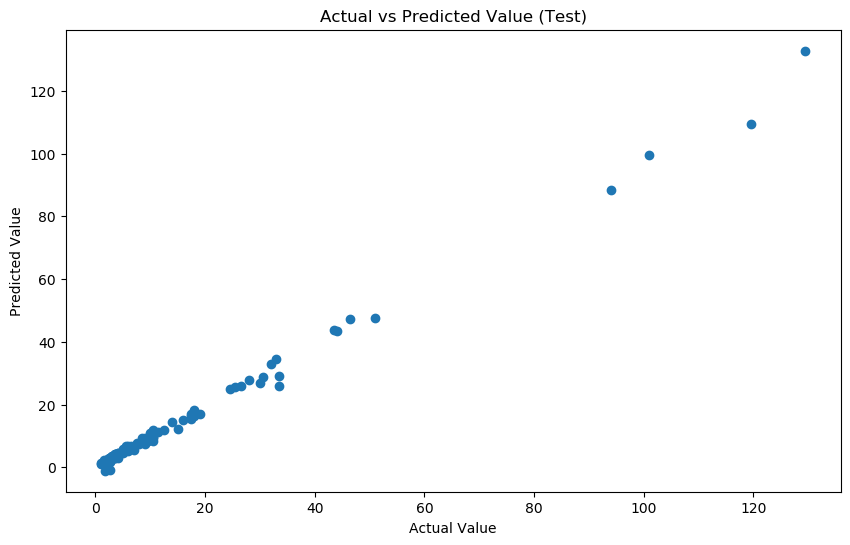

In [105]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(attack_y_test, attack_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## MODELLING WITH GRADIENT BOOSTING REGRESSION (GBR) MODEL

In [106]:
attackGBR_model = GradientBoostingRegressor()
attackGBR=attackGBR_model.fit(attack_X_train, attack_y_train)

In [107]:
attack_y_pred = attackGBR_model.predict(attack_X_train)
attack_df = pd.DataFrame({'Name':attacker_name_train,'Actual': attack_y_train, 'Predicted': attack_y_pred})
attack_df["Difference"] = attack_df["Actual"]-attack_df["Predicted"]
attack_df_under = round(attack_df.sort_values('Difference').set_index('Name'),2)
attack_df_over = round(attack_df.sort_values('Difference').set_index('Name').tail(20),2)
attack_df_under

Actual  Predicted  Difference
Name                                                 
Santi Mina                15.0      16.78       -1.78
Paulinho                  18.0      19.37       -1.37
R. Yaremchuk              14.0      15.32       -1.32
Lucas Pérez               14.0      15.20       -1.20
B. Dia                    22.5      23.54       -1.04
Iñaki Williams            30.0      30.99       -0.99
Puado                     28.0      28.95       -0.95
E. Ávila                  20.5      21.42       -0.92
M. Antonio                15.0      15.87       -0.87
Morales                   16.5      17.36       -0.86
Joselu                     9.0       9.84       -0.84
De Tomás                  25.0      25.79       -0.79
I. Toney                  10.5      11.28       -0.78
L. Jović                  27.0      27.76       -0.76
M. Icardi                 37.0      37.75       -0.75
M. Mohamed                 8.5       9.25       -0.75
R. Nteka                   7.0       7.74       -0.74
Gerard Moreno             68.0      68.74       -0.74
K. Gameiro                 5.0       5.72       -0.72
M. Dembélé                20.5      21.21       -0.71
A. Isak                   45.0      45.71       -0.71
Albertinho Dutra          14.0      14.69       -0.69
Portu                     30.0      30.69       -0.69
A. Budimir                14.0      14.66       -0.66
Dani Gómez                 4.9       5.56       -0.66
Villalibre                 6.0       6.65       -0.65
Roger                     20.5      21.14       -0.64
Toni Martínez             15.0      15.62       -0.62
Luimo Boas Santos         21.0      21.62       -0.62
J. Maja                    3.8       4.40       -0.60
Rafa Mir                  21.5      22.09       -0.59
S. Palacios                7.5       8.08       -0.58
G. Pandev                  1.0       1.56       -0.56
Rochinha                   9.0       9.56       -0.56
M. Depay                  63.0      63.55       -0.55
Bebé                       2.9       3.44       -0.54
M. Osmajić                 4.2       4.74       -0.54
E. Hazard                 52.0      52.54       -0.54
Fredditinho                9.0       9.54       -0.54
M. Braithwaite            10.5      11.03       -0.53
A. Lozano                  4.3       4.82       -0.52
Borja Iglesias            21.5      22.02       -0.52
Djaniny                    4.1       4.62       -0.52
Ansu Fati                 17.5      18.01       -0.51
J. Lingard                17.5      18.00       -0.50
M. Sylla                   2.7       3.20       -0.50
Iván Alejo                 5.0       5.50       -0.50
Santi da Bruma             2.6       3.09       -0.49
M. Diagne                  4.2       4.68       -0.48
S. Agüero                 51.0      51.47       -0.47
S. Bahoken                 4.2       4.66       -0.46
Carlos Fernández           8.5       8.96       -0.46
Negredo                    6.0       6.45       -0.45
A. Armstrong              12.0      12.44       -0.44
O. Watkins                21.0      21.44       -0.44
L. Dimata                  6.5       6.94       -0.44
Z. Ibrahimović            12.5      12.93       -0.43
S. Guirassy               15.0      15.43       -0.43
I. Ganago                  6.5       6.92       -0.42
D. Calvert-Lewin          37.5      37.91       -0.41
A. Hložek                 16.0      16.40       -0.40
A. Mitrović                9.0       9.39       -0.39
J. Tagueu                  2.7       3.09       -0.39
H. Mkhitaryan             24.0      24.39       -0.39
A. Nwakaeme               11.0      11.38       -0.38
Falcao                     6.0       6.37       -0.37
I. Slimani                 4.8       5.17       -0.37
F. Sotoca                  5.5       5.87       -0.37
Iago Aspas                27.0      27.37       -0.37
I. Šaponjić                3.8       4.16       -0.36
F. Boli                    2.5       2.86       -0.36
Kike García               12.0      12.36       -0.36
J. Hernández               9

In [108]:
score = attackGBR.score(attack_X_train, attack_y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(attack_y_train,attack_y_pred ))  
print('Mean Squared Error:', metrics.mean_squared_error(attack_y_train,attack_y_pred ))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_train,attack_y_pred )))
print('GBR R^2:',score)

Mean Absolute Error: 0.30626768346329064
Mean Squared Error: 0.17237982261877552
Root Mean Squared Error: 0.41518649137318464
GBR R^2: 0.9995094845676215


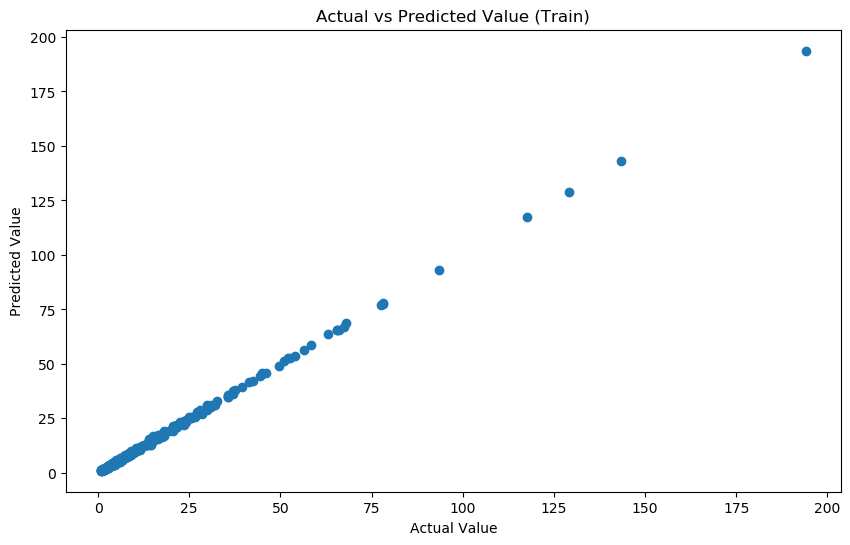

In [109]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(attack_y_train, attack_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [110]:
attack_y_pred_test = attackGBR.predict(attack_X_test)
attack_df = pd.DataFrame({'Name':attacker_name_test,'Actual': attack_y_test, 'Predicted': attack_y_pred_test})
attack_df["Difference"] = attack_df["Actual"]-attack_df["Predicted"]
attack_df_under = round(attack_df.sort_values('Difference').set_index('Name'),2)
attack_df_over = round(attack_df.sort_values('Difference').set_index('Name').tail(20),2)
attack_df_under

Actual  Predicted  Difference
Name                                             
R. Lewandowski       119.5     130.24      -10.74
M. Gómez              32.0      35.37       -3.37
H. Kane              129.5     132.27       -2.77
R. Sterling           94.0      96.64       -2.64
Y. En-Nesyri          44.0      46.48       -2.48
Richarlison           46.5      47.83       -1.33
M. Oršić              10.5      11.77       -1.27
M. Taremi             18.0      19.10       -1.10
H. Seferović          14.0      15.05       -1.05
G. Laborde            24.5      25.31       -0.81
Gonçalo Ramos          5.5       6.23       -0.73
Llorente               1.0       1.73       -0.73
F. Gulbrandsen         2.4       3.09       -0.69
S. Mounié              5.0       5.59       -0.59
Marcos André           8.5       9.06       -0.56
Manu Vallejo           8.5       9.06       -0.56
J. Vardy              33.0      33.44       -0.44
A. Delort             25.5      25.94       -0.44
C. Bacca               5.0       5.44       -0.44
M. Diouf               1.9       2.28       -0.38
L. Boyé                6.5       6.82       -0.32
Carlitos               2.6       2.89       -0.29
V. Germain             3.6       3.86       -0.26
L. Castro              1.5       1.76       -0.26
N. Jørgensen           2.3       2.55       -0.25
Gustavo Sauer          3.1       3.33       -0.23
A. Cornelius           3.1       3.31       -0.21
C. Woodrow             2.4       2.60       -0.20
J. Allevinah           2.8       3.00       -0.20
L. Abada               5.0       5.19       -0.19
M. Demir               2.3       2.49       -0.19
J. Stanislas           2.5       2.68       -0.18
Marcos Júnior          3.1       3.27       -0.17
L. Manyama             1.8       1.94       -0.14
C. Adams              11.5      11.63       -0.13
J. Briand              1.0       1.10       -0.10
M. Caraglio            1.9       2.00       -0.10
B. Hrgota              3.1       3.18       -0.08
E. Džeko              18.0      18.06       -0.06
A. Modeste             2.7       2.75       -0.05
Evandro Rochedo        2.6       2.64       -0.04
Nuno Lisareda          3.6       3.64       -0.04
Pietrson Mendes        2.6       2.63       -0.03
Nicholas Aldair        4.2       4.22       -0.02
P. Testroet            2.3       2.31       -0.01
C. Robinson            4.0       4.01       -0.01
Nélson Oliveira        3.0       3.01       -0.01
L. Höler               2.8       2.78        0.02
Ricardo Lopes          2.3       2.26        0.04
T. Henry               5.0       4.95        0.05
T. Kadewere           10.0       9.94        0.06
David Ferreiro         1.5       1.43        0.07
Fabri Arnoia           3.0       2.92        0.08
Leandro Vivenço        2.8       2.71        0.09
S. Mugoša              2.3       2.20        0.10
B. Samudio             3.8       3.68        0.12
C. Wilson             17.5      17.38        0.12
K. Przybyłko           3.1       2.97        0.13
Sebas Couteira         2.8       2.66        0.14
Leandro Damião         2.6       2.46        0.14
Y. Mutō                2.4       2.24        0.16
D. Rolán               2.4       2.23        0.17
E. Copetti             3.1       2.93        0.17
G. Lapadula            2.6       2.41        0.19
S. Terodde             3.6       3.40        0.20
Sergio León            2.5       2.30        0.20
P. Hofmann             2.4       2.19        0.21
V. Černý               2.7       2.48        0.22
N. Maupay             16.0      15.76        0.24
C. Bassogog            3.7       3.46        0.24
F. Niederlechner       5.5       5.26        0.24
B. Gomis               7.5       7.25        0.25
O. Al Somah            6.0       5.73        0.27
M. Rangel              4.1       3.83        0.27
Mariano                6.0       5.72        0.28
B. Jatta               3.2       2.87        0.33
S. Adamyan             4.2       3.85        0.35
F. Tănase              2.6       2.24        0.36
C. Wood             

In [111]:
score1 = attackGBR.score(attack_X_test, attack_y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(attack_y_test,attack_y_pred_test ))  
print('Mean Squared Error:', metrics.mean_squared_error(attack_y_test,attack_y_pred_test ))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(attack_y_test,attack_y_pred_test )))
print('GBR R^2:',score1)

Mean Absolute Error: 0.8041575721739059
Mean Squared Error: 2.706710329443832
Root Mean Squared Error: 1.645208293634527
GBR R^2: 0.9939984252344718


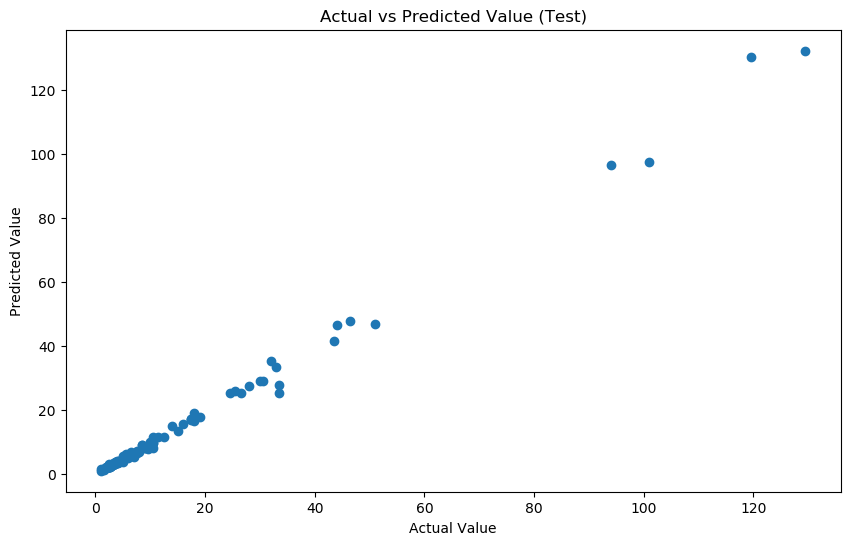

In [112]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(attack_y_test, attack_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## Model for Mid Fielders

### Dropping the derived features

In [113]:
mid_player_list.drop(['Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Total Stats', 'Base Stats'], axis=1, inplace=True)

### Correlation matrix

In [114]:
mid_corr_mat = mid_player_list.corr()
mid_corr_mat

Value       Age       OVA       POT    Height  \
Value                  1.000000 -0.227801  0.855541  0.760913  0.078140   
Age                   -0.227801  1.000000  0.011960 -0.537406 -0.012617   
OVA                    0.855541  0.011960  1.000000  0.729522  0.073602   
POT                    0.760913 -0.537406  0.729522  1.000000  0.057600   
Height                 0.078140 -0.012617  0.073602  0.057600  1.000000   
Weight                 0.028710  0.139756  0.050572 -0.065606  0.719915   
BOV                    0.861523 -0.150918  0.961668  0.826173  0.079145   
Growth                 0.158493 -0.798135 -0.048218  0.647986  0.002154   
Wage in Thousand       0.071683 -0.001596  0.016061  0.034408 -0.017685   
Release Clause in Mil  0.993359 -0.245805  0.841292  0.769020  0.076941   
Crossing               0.346987  0.118125  0.424548  0.224457 -0.112382   
Finishing              0.351846 -0.027880  0.371649  0.288310 -0.070091   
Heading Accuracy       0.086609  0.147395  0.152313  0.030363  0.469666   
Short Passing          0.580751  0.112238  0.727586  0.500718  0.137792   
Volleys                0.300290  0.167896  0.374502  0.182018  0.003713   
Dribbling              0.531776 -0.208109  0.566826  0.542581 -0.150190   
Curve                  0.293137  0.140807  0.361632  0.190042 -0.096690   
FK Accuracy            0.158960  0.242674  0.246670  0.028130 -0.072440   
Long Passing           0.382781  0.189187  0.520197  0.297999  0.206943   
Ball Control           0.653884 -0.041363  0.772204  0.631010  0.006247   
Acceleration           0.188796 -0.389940  0.095711  0.241353 -0.439579   
Sprint Speed           0.172145 -0.379823  0.066037  0.213469 -0.272798   
Agility                0.204508 -0.259919  0.147898  0.240287 -0.561252   
Reactions              0.651022  0.035611  0.769049  0.539391  0.103896   
Balance                0.183762 -0.128222  0.164405  0.201327 -0.718249   
Shot Power             0.313282  0.162140  0.413847  0.207560  0.162275   
Jumping                0.033811  0.073247  0.039745 -0.021115  0.056305   
Stamina                0.243199 -0.114021  0.235996  0.184994  0.075863   
Strength               0.070394  0.137607  0.111771  0.000058  0.585209   
Long Shots             0.325329  0.133020  0.403082  0.218865  0.050768   
Aggression             0.082294  0.171044  0.155993  0.039930  0.219043   
Interceptions          0.095210  0.160652  0.173084  0.051292  0.282585   
Positioning            0.429893  0.018554  0.476703  0.338045 -0.043564   
Vision                 0.533464  0.077645  0.628914  0.446194  0.004893   
Penalties              0.138211  0.278810  0.235132  0.010862 -0.053542   
Composure              0.514576  0.139169  0.643892  0.432305  0.114553   
Marking                0.092232  0.140665  0.174334  0.069168  0.270458   
Standing Tackle        0.087965  0.101552  0.150750  0.072787  0.289739   
Sliding Tackle         0.062572  0.102886  0.121410  0.048797  0.272460   
W/F                    0.129101  0.015980  0.147147  0.102899 -0.020257   
SM                     0.274484 -0.086611  0.296534  0.293117 -0.165015   
IR                     0.548615  0.238283  0.675849  0.381008  0.087041   
PAC                    0.186098 -0.396698  0.082513  0.233611 -0.356755   
SHO                    0.397119  0.079977  0.461175  0.290834 -0.000708   
PAS                    0.557456  0.174994  0.700052  0.428916  0.037507   
DRI                    0.601724 -0.176066  0.656983  0.597934 -0.244331   
DEF                    0.095171  0.139182  0.172557  0.066856  0.315684   
PHY                    0.135741  0.116841  0.184715  0.059364  0.467748   

                         Weight       BOV    Growth  Wage in Thousand  \
Value                  0.028710  0.861523  0.158493          0.071683   
Age                    0.139756 -0.150918 -0.798135         -0.001596   
OVA                    0.050572  0.961668 -0.048218          0.016061   
POT                   -0.065606  0.826173  0.647986       

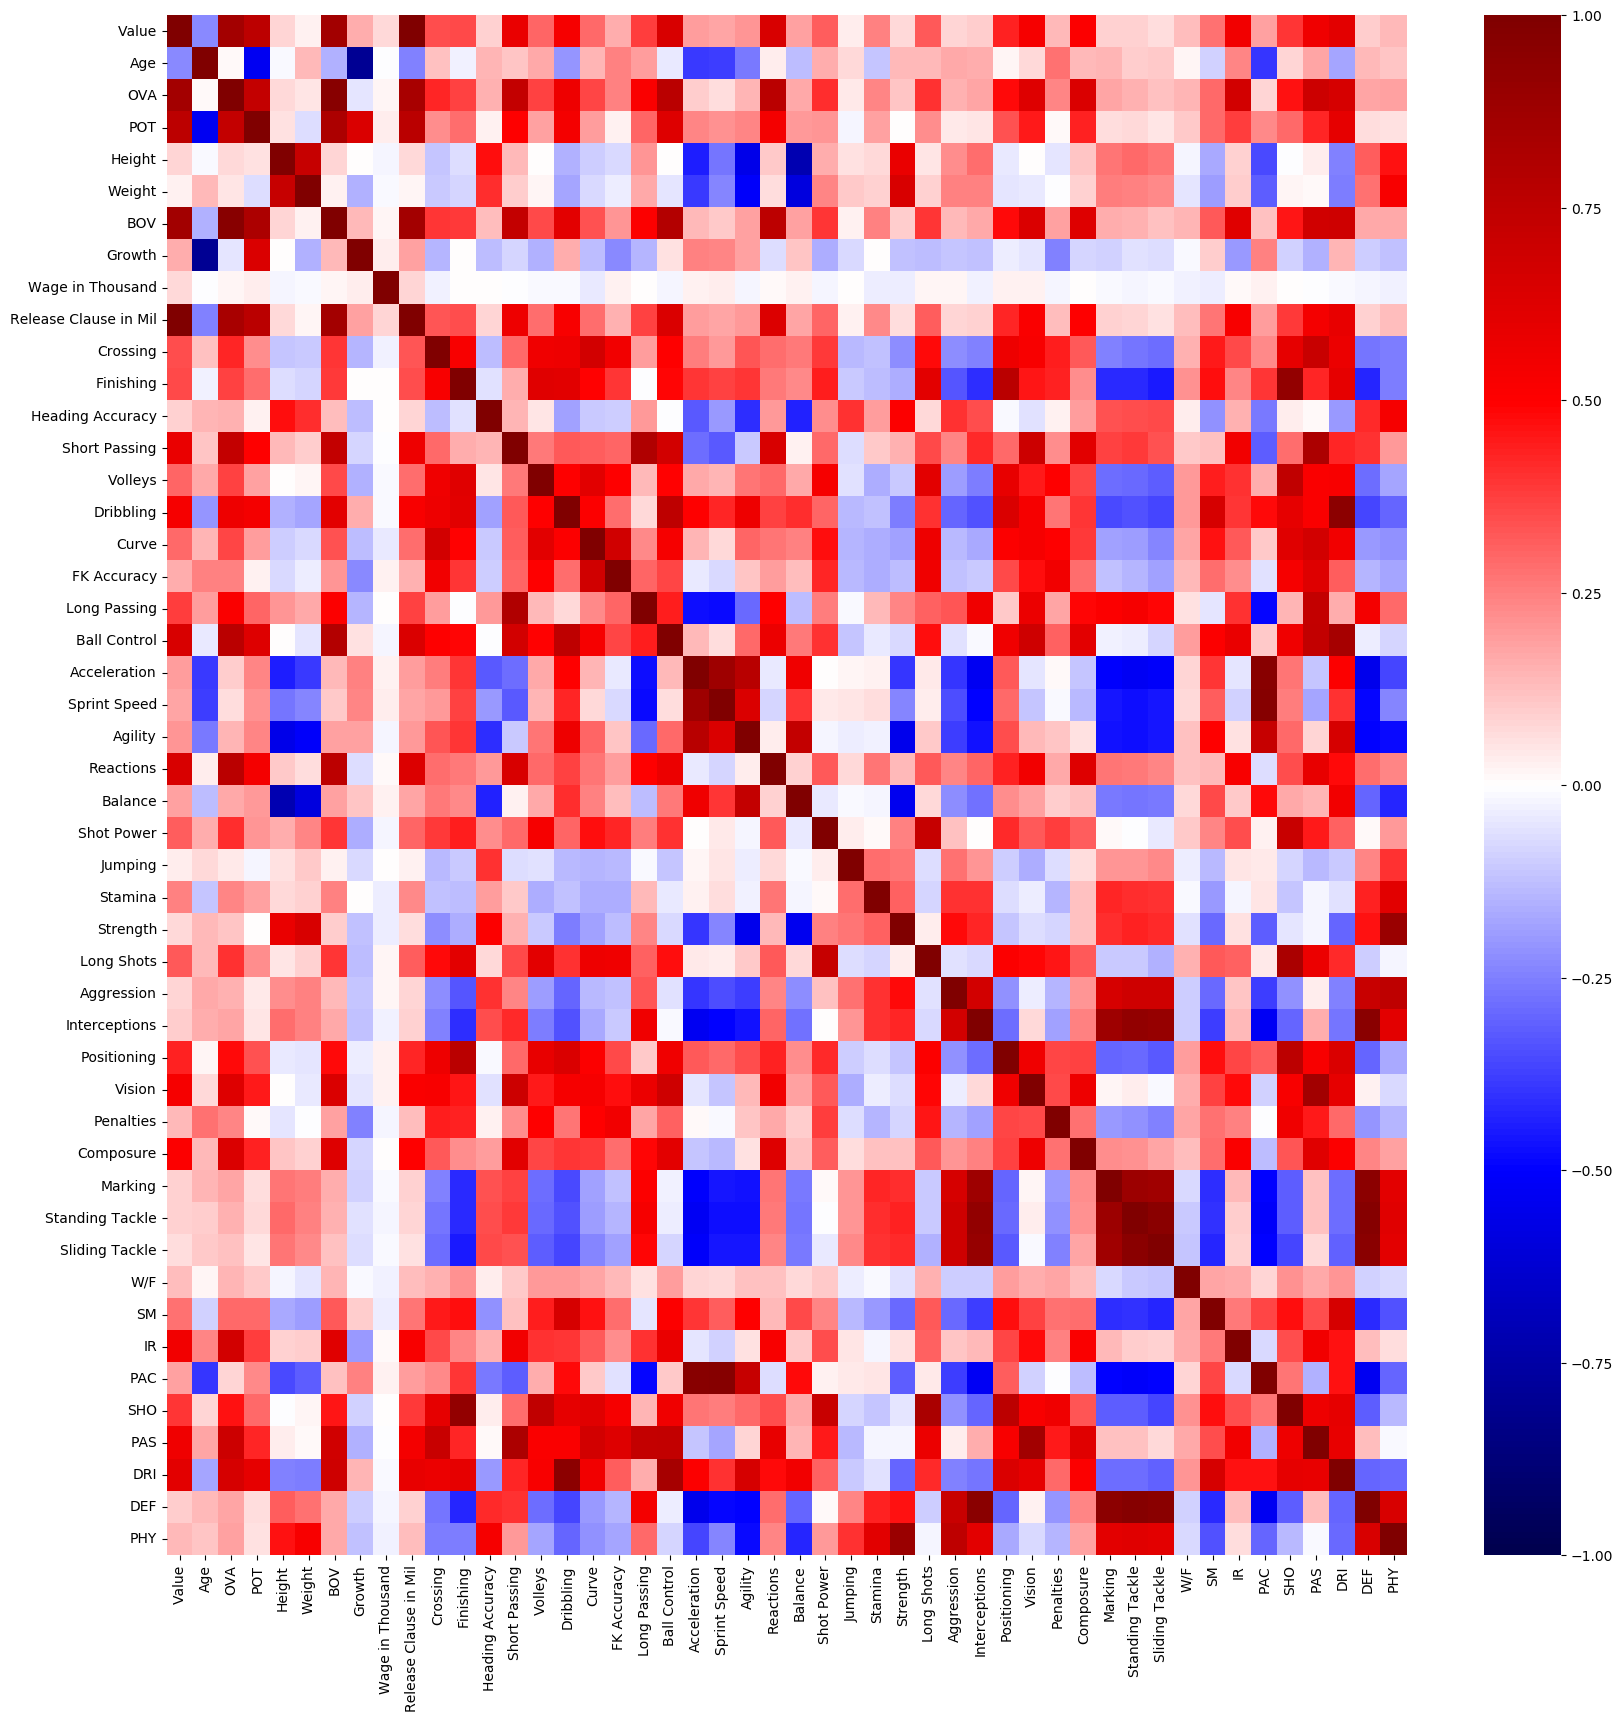

In [115]:
plt.figure(figsize=(20,20)),
plt.style.use('default')
sns.heatmap(mid_player_list.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);
plt.show()

In [116]:
pd.DataFrame(mid_corr_mat["Value"]).sort_values("Value", ascending=True).head(20)

Value
Age              -0.227801
Weight            0.028710
Jumping           0.033811
Sliding Tackle    0.062572
Strength          0.070394
Wage in Thousand  0.071683
Height            0.078140
Aggression        0.082294
Heading Accuracy  0.086609
Standing Tackle   0.087965
Marking           0.092232
DEF               0.095171
Interceptions     0.095210
W/F               0.129101
PHY               0.135741
Penalties         0.138211
Growth            0.158493
FK Accuracy       0.158960
Sprint Speed      0.172145
Balance           0.183762

In [117]:
mid_player_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   1499 non-null   object 
 1   Value                  1499 non-null   float64
 2   Age                    1499 non-null   int32  
 3   OVA                    1499 non-null   int32  
 4   POT                    1499 non-null   int32  
 5   Team & Contract        1499 non-null   object 
 6   Height                 1499 non-null   int32  
 7   Weight                 1499 non-null   int32  
 8   foot                   1499 non-null   object 
 9   BOV                    1499 non-null   int32  
 10  BP                     1499 non-null   object 
 11  Growth                 1499 non-null   int32  
 12  Wage in Thousand       1499 non-null   float64
 13  Release Clause in Mil  1499 non-null   float64
 14  Crossing               1499 non-null   int32  
 15  Fini

## Dropping the categorical and textual features

In [118]:
mid_X = mid_player_list.drop(columns=["Value","Team & Contract","BP", "A/W", "D/W","foot" ])
mid_Y = mid_player_list.loc[:,"Value"]

In [119]:
mid_X_train, mid_X_test, mid_y_train, mid_y_test = train_test_split(mid_X,mid_Y,test_size=0.2, random_state=10)

mid_name_train = mid_X_train.Name
mid_name_test = mid_X_test.Name

mid_X_train = mid_X_train.drop(columns=['Name'])
mid_X_test = mid_X_test.drop(columns=['Name'])

mid_lr = LinearRegression()
mid_lr.fit(mid_X_train,mid_y_train)

LinearRegression()

In [120]:
mid_y_pred = mid_lr.predict(mid_X_train)
mid_df = pd.DataFrame({'Name':mid_name_train,'Actual': mid_y_train, 'Predicted': mid_y_pred})
mid_df["Difference"] = mid_df["Actual"]-mid_df["Predicted"]
mid_df = round(mid_df.sort_values('Difference').set_index('Name'),2)
mid_df

Actual  Predicted  Difference
Name                                            
João Félix           82.0      92.39      -10.39
F. Valverde          58.0      65.76       -7.76
Matheus Cunha        35.5      40.96       -5.46
V. Tsygankov         32.0      37.28       -5.28
Pedro Gonçalves      51.5      56.70       -5.20
...                   ...        ...         ...
S. Gnabry            81.0      73.38        7.62
T. Müller            66.0      57.70        8.30
L. Goretzka          93.0      83.17        9.83
P. Dybala            93.0      82.69       10.31
J. Kimmich          108.0      96.40       11.60

[1199 rows x 3 columns]

In [121]:
print('Mean Absolute Error:', metrics.mean_absolute_error(mid_y_train, mid_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(mid_y_train, mid_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_train, mid_y_pred)))
print('Linear Regression R^2:',mid_lr.score(mid_X_train,mid_y_train))

Mean Absolute Error: 0.9598757849892474
Mean Squared Error: 2.295464049133357
Root Mean Squared Error: 1.5150788920493075
Linear Regression R^2: 0.990041832018315


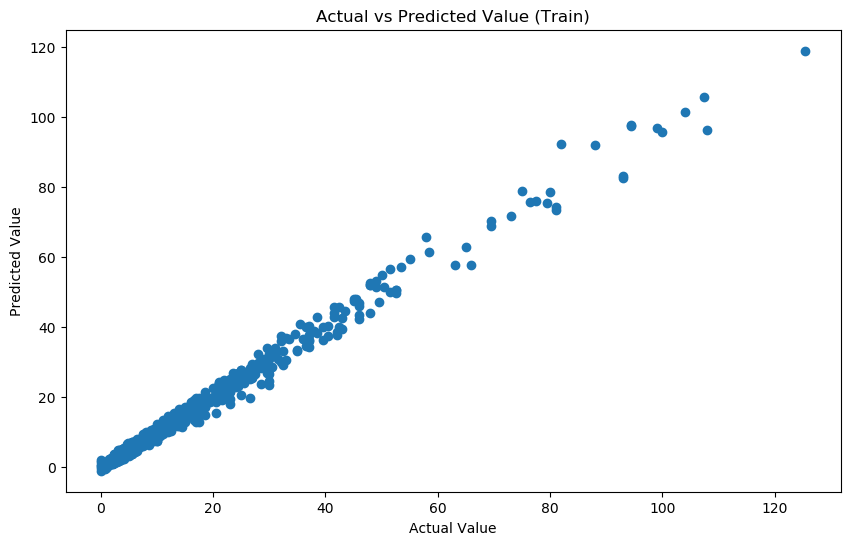

In [122]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(mid_y_train, mid_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [123]:
mid_y_pred_test = mid_lr.predict(mid_X_test)
mid_df = pd.DataFrame({'Name':mid_name_test,'Actual': mid_y_test, 'Predicted': mid_y_pred_test})
mid_df["Difference"] = mid_df["Actual"]-mid_df["Predicted"]
mid_df = round(mid_df.sort_values('Difference').set_index('Name'),2)
mid_df

Actual  Predicted  Difference
Name                                               
F. de Jong            119.50     128.06       -8.56
Carlos Soler           51.50      59.67       -8.17
Vinícius Jr.           56.50      64.19       -7.69
Pedri                  54.00      61.26       -7.26
Marcos Llorente        88.00      95.13       -7.13
N. Fekir               45.00      50.36       -5.36
Gonçalo Guedes         39.00      43.46       -4.46
A. Gómez               33.50      37.94       -4.44
David Silva            22.00      26.06       -4.06
Coutinho               30.00      33.36       -3.36
Koke                   52.50      55.79       -3.29
L. Ivanušec            12.50      15.40       -2.90
H. Herrera             21.00      23.88       -2.88
Sergi Darder           20.00      22.80       -2.80
J. Weigl               23.00      25.68       -2.68
D. Machís              26.00      28.63       -2.63
M. Simon                9.00      11.60       -2.60
Campaña                30.50      32.98       -2.48
Ferran Torres          68.50      70.81       -2.31
M. Edwards             15.00      17.16       -2.16
Marlos                 13.00      14.95       -1.95
Ricardo Horta          21.00      22.91       -1.91
E. Lamela              14.00      15.83       -1.83
L. Díaz                39.00      40.77       -1.77
Puertas                14.00      15.73       -1.73
Zubeldia               24.00      25.70       -1.70
D. González             4.50       6.16       -1.66
P. Mantalos             7.50       9.10       -1.60
A. Karabec              5.50       7.08       -1.58
Adrià Pedrosa          10.50      11.91       -1.41
A. Fulgini             20.00      21.39       -1.39
Álvaro García           5.50       6.87       -1.37
D. Latza                2.50       3.81       -1.31
L. Fer                  3.90       5.19       -1.29
Bruno Costa            12.00      13.29       -1.29
Matheus Nunes          17.00      18.27       -1.27
P. Piatti               8.50       9.77       -1.27
Douglas Luiz           20.00      21.27       -1.27
M. Özil                14.00      15.26       -1.26
D. McNeil              17.00      18.23       -1.23
G. Masouras             8.00       9.17       -1.17
S. Schwab               5.50       6.66       -1.16
Y. Chará                5.50       6.64       -1.14
F. Mollet              10.50      11.62       -1.12
G. Haraguchi            4.10       5.20       -1.10
Brais Méndez           12.00      13.09       -1.09
N. De Préville          2.30       3.38       -1.08
M. Coco                 3.80       4.87       -1.07
A. Musa                 2.40       3.45       -1.05
Claudiano Sobrino       4.10       5.14       -1.04
S. Meïté                8.50       9.51       -1.01
O. Idrissi             10.00      11.00       -1.00
F. Lemoine              1.40       2.36       -0.96
Fred                   18.50      19.45       -0.95
Luis Couprins           3.20       4.15       -0.95
Kangin Lee              9.50      10.44       -0.94
S. Boufal               6.00       6.91       -0.91
E. Piovi                2.70       3.61       -0.91
Diogo Gonçalves        12.00      12.87       -0.87
J. Jønsson              3.70       4.56       -0.86
F. Tait                 7.50       8.34       -0.84
F. Ribéry               6.00       6.81       -0.81
Aleix Febas             4.40       5.17       -0.77
Rúben Lameiras          5.00       5.76       -0.76
D. Kyereh               3.30       4.06       -0.76
Z. Ferhat               7.50       8.25       -0.75
Cesc Fàbregas           3.50       4.25       -0.75
P. Højbjerg            34.50      35.24       -0.74
P. Gueye               14.50      15.23       -0.73
D. Díaz                 3.10       3.81       -0.71
B. Mbeumo               5.50       6.19       -0.69
C. Doucouré             8.50       9.19       -0.69
J. Jankto               5.50       6.18       -0.68
T. Mangani              2.60       3.27       -0.67
Allan                  30.50      31.15       -0.65
F. Souček         

In [124]:
print('Mean Absolute Error:', metrics.mean_absolute_error(mid_y_test, mid_y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(mid_y_test, mid_y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_test, mid_y_pred_test)))
print('Linear Regression R^2:',mid_lr.score(mid_X_test,mid_y_test))

Mean Absolute Error: 1.0804736787671052
Mean Squared Error: 3.2847208116082136
Root Mean Squared Error: 1.8123798750836464
Linear Regression R^2: 0.9857174593784576


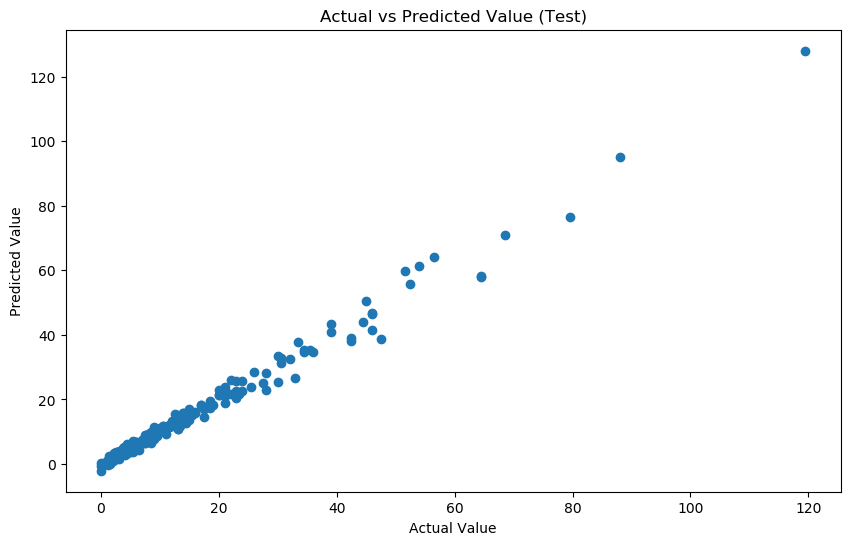

In [125]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(mid_y_test, mid_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [126]:
mid_lm = LinearRegression()
mid_scaler = StandardScaler()

mid_X_train_scaled = mid_scaler.fit_transform(mid_X_train.values)
mid_X_test_scaled = mid_scaler.transform(mid_X_test.values)

mid_lm_reg = Ridge(alpha=0.05, normalize=True)

mid_lm_lasso = Lasso(alpha=0.05, normalize=True)
mid_poly = PolynomialFeatures(degree=2) 

mid_X_train_poly = mid_poly.fit_transform(mid_X_train.values)
mid_X_test_poly = mid_poly.transform(mid_X_test.values)

mid_lm_poly = LinearRegression()

mid_lm.fit(mid_X_train, mid_y_train)
mid_lm_pred = mid_lm.predict(mid_X_test)
print(f'Linear Regression for test data R^2: {mid_lm.score(mid_X_test, mid_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_test, mid_lm_pred)))
print("")

mid_lm_reg.fit(mid_X_train_scaled, mid_y_train)
mid_lm_reg_pred = mid_lm_reg.predict(mid_X_test_scaled)
print(f'Ridge Regression for test data R^2: {mid_lm_reg.score(mid_X_test_scaled, mid_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_test, mid_lm_reg_pred)))
print("")


mid_lm_lasso.fit(mid_X_train,mid_y_train)
mid_lm_lasso_pred = mid_lm_lasso.predict(mid_X_test)
print(f'Lasso Regression for test data R^2: {mid_lm_lasso.score(mid_X_test, mid_y_test):.6f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_test, mid_lm_lasso_pred)))
print("")

mid_lm_poly.fit(mid_X_train_poly, mid_y_train)
mid_lm_poly_pred = mid_lm_poly.predict(mid_X_test_poly)
print(f'Degree 2 polynomial regression for test data R^2: {mid_lm_poly.score(mid_X_test_poly, mid_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_test, mid_lm_poly_pred)))

Linear Regression for test data R^2: 0.986
Root Mean Squared Error: 1.8123798750836446

Ridge Regression for test data R^2: 0.985
Root Mean Squared Error: 1.8527410252751921

Lasso Regression for test data R^2: 0.978378
Root Mean Squared Error: 2.2299425462218183



C:\Users\Mayank Gubba\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
C:\Users\Mayank Gubba\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

Degree 2 polynomial regression for test data R^2: 0.914
Root Mean Squared Error: 4.441411310507056


## MODELLING WITH SVR

#### We applied SVR with 4 different kernals ('poly' , 'linear' , 'rbf' , 'sigmoid') where 'poly' was producing the best results in terms of R^2 score

In [127]:
svr = SVR(kernel='poly').fit(mid_X_train, mid_y_train)

In [129]:
mid_y_pred = svr.predict(mid_X_train)
mid_df = pd.DataFrame({'Name':mid_name_train,'Actual': mid_y_train, 'Predicted': mid_y_pred})
mid_df["Difference"] = mid_df["Actual"]-mid_df["Predicted"]
mid_df_under = round(mid_df.sort_values('Difference').set_index('Name'),2)
mid_df_over = round(mid_df.sort_values('Difference').set_index('Name').tail(20),2)
mid_df_under

Actual  Predicted  Difference
Name                                           
F. Valverde         58.0      68.48      -10.48
Merino              50.0      58.01       -8.01
Bruno Fernandes    107.5     114.98       -7.48
L. Modrić           32.0      38.69       -6.69
Casemiro            88.0      94.01       -6.01
...                  ...        ...         ...
M. Diaby            52.5      45.50        7.00
S. Berghuis         30.0      22.57        7.43
P. Dybala           93.0      84.87        8.13
S. Gnabry           81.0      71.93        9.07
T. Müller           66.0      56.87        9.13

[1199 rows x 3 columns]

In [130]:
score = svr.score(mid_X_train, mid_y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(mid_y_train, mid_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(mid_y_train, mid_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_train, mid_y_pred)))
print('SVR R^2:',score)

Mean Absolute Error: 0.7626907732037136
Mean Squared Error: 1.8624268699439255
Root Mean Squared Error: 1.3647076133531042
SVR R^2: 0.9919204312385081


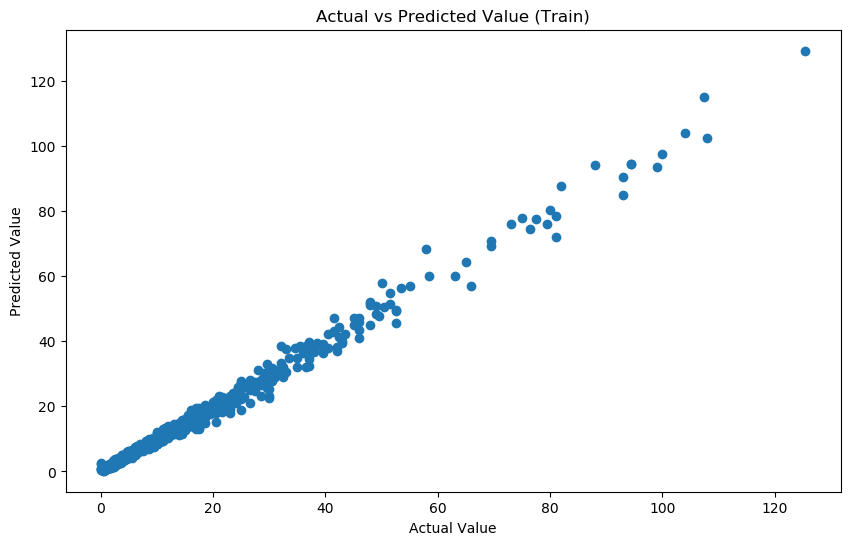

In [131]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(mid_y_train, mid_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [132]:
mid_y_pred_test = svr.predict(mid_X_test)
mid_df = pd.DataFrame({'Name':mid_name_test,'Actual': mid_y_test, 'Predicted': mid_y_pred_test})
mid_df["Difference"] = mid_df["Actual"]-mid_df["Predicted"]
mid_df_under = round(mid_df.sort_values('Difference').set_index('Name'),2)
mid_df_over = round(mid_df.sort_values('Difference').set_index('Name').tail(20),2)
mid_df_under

Actual  Predicted  Difference
Name                                               
F. de Jong            119.50     137.16      -17.66
Marcos Llorente        88.00     101.17      -13.17
Carlos Soler           51.50      58.68       -7.18
Koke                   52.50      56.87       -4.37
N. Fekir               45.00      48.85       -3.85
Pedri                  54.00      57.72       -3.72
A. Gómez               33.50      36.84       -3.34
Vinícius Jr.           56.50      59.48       -2.98
David Silva            22.00      24.65       -2.65
A. Karabec              5.50       7.82       -2.32
Campaña                30.50      32.64       -2.14
Sergi Darder           20.00      22.11       -2.11
P. Pogba               79.50      81.53       -2.03
H. Herrera             21.00      23.01       -2.01
Lucas Paquetá          46.00      47.96       -1.96
Coutinho               30.00      31.87       -1.87
S. Szymański            0.00       1.70       -1.70
E. Mwepu                9.00      10.48       -1.48
Zubeldia               24.00      25.46       -1.46
Adrià Pedrosa          10.50      11.95       -1.45
Kangin Lee              9.50      10.93       -1.43
Marlos                 13.00      14.36       -1.36
D. Machís              26.00      27.35       -1.35
Diogo Gonçalves        12.00      13.33       -1.33
F. Ribéry               6.00       7.29       -1.29
D. Díaz                 3.10       4.34       -1.24
O. Idrissi             10.00      11.19       -1.19
Aleix Febas             4.40       5.50       -1.10
E. Lamela              14.00      15.08       -1.08
B. Mbeumo               5.50       6.54       -1.04
M. Simon                9.00      10.03       -1.03
Matheus Nunes          17.00      18.02       -1.02
A. Ionov                0.00       0.98       -0.98
Marcos Antonio          7.50       8.42       -0.92
L. Ivanušec            12.50      13.41       -0.91
R. Sessegnon            9.00       9.91       -0.91
Álvaro García           5.50       6.40       -0.90
S. Meïté                8.50       9.38       -0.88
P. Mantalos             7.50       8.36       -0.86
Rúben Lameiras          5.00       5.83       -0.83
Brais Méndez           12.00      12.82       -0.82
C. O'Hare               6.00       6.81       -0.81
Gonçalo Guedes         39.00      39.80       -0.80
T. Murg                 3.10       3.89       -0.79
S. Schwab               5.50       6.27       -0.77
L. Paredes             28.00      28.75       -0.75
M. Jensen               5.50       6.24       -0.74
K. Thuram              11.50      12.24       -0.74
F. Souček               3.30       4.02       -0.72
L. Fer                  3.90       4.62       -0.72
Lucas Fernandes         4.70       5.41       -0.71
P. Frankowski           3.60       4.29       -0.69
C. Doucouré             8.50       9.18       -0.68
G. Masouras             8.00       8.66       -0.66
D. González             4.50       5.15       -0.65
J. Weigl               23.00      23.63       -0.63
T. Roberts              6.00       6.62       -0.62
T. Mangani              2.60       3.21       -0.61
H. Boudaoui            11.50      12.09       -0.59
J. Lerma                6.00       6.58       -0.58
Allan                  30.50      31.07       -0.57
Claudiano Sobrino       4.10       4.67       -0.57
M. Djenepo              6.50       7.06       -0.56
Fredy                   1.90       2.46       -0.56
S. Boufal               6.00       6.55       -0.55
J. Jønsson              3.70       4.25       -0.55
D. Kyereh               3.30       3.84       -0.54
P. Seguin               3.70       4.23       -0.53
Salva Sevilla           1.10       1.62       -0.52
J. Jankto               5.50       6.02       -0.52
A. Aouchiche            6.50       7.02       -0.52
L. Dendoncker          13.50      13.99       -0.49
M. Coco                 3.80       4.27       -0.47
I. Marcone              7.50       7.96       -0.46
P. Förster              2.80       3.25       -0.45
Murilo            

In [133]:
score1 = svr.score(mid_X_test, mid_y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(mid_y_test, mid_y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(mid_y_test, mid_y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_test, mid_y_pred_test)))
print('SVR R^2:',score1)

Mean Absolute Error: 0.9754528849882615
Mean Squared Error: 4.220180981978322
Root Mean Squared Error: 2.0543079082694304
SVR R^2: 0.9816499149357368


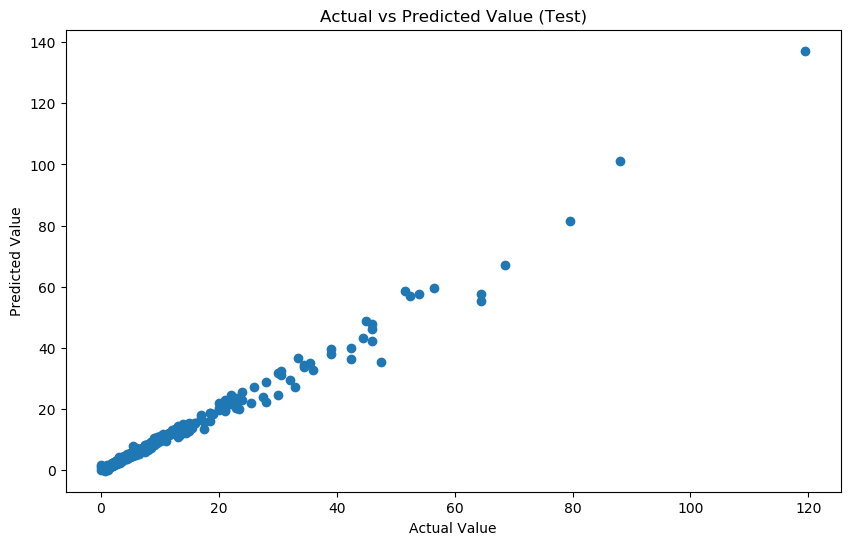

In [134]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(mid_y_test, mid_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## MODELLING WITH GRADIENT BOOSTING REGRESSION (GBR) MODEL

In [135]:
midGBR_model = GradientBoostingRegressor()
midGBR=midGBR_model.fit(mid_X_train, mid_y_train)

In [136]:
mid_y_pred = midGBR_model.predict(mid_X_train)
mid_df = pd.DataFrame({'Name':mid_name_train,'Actual': mid_y_train, 'Predicted': mid_y_pred})
mid_df["Difference"] = mid_df["Actual"]-mid_df["Predicted"]
mid_df_under = round(mid_df.sort_values('Difference').set_index('Name'),2)
mid_df_over = round(mid_df.sort_values('Difference').set_index('Name').tail(20),2)
mid_df_under

Actual  Predicted  Difference
Name                                            
Gedson Fernandes     17.0      19.76       -2.76
R. De Paul           41.5      44.15       -2.65
Muniain              36.5      39.02       -2.52
U. Račić             28.0      30.12       -2.12
Grimaldo             37.0      39.11       -2.11
...                   ...        ...         ...
R. Baku              32.0      29.60        2.40
J. Álvarez           17.0      14.50        2.50
S. Berghuis          30.0      27.40        2.60
E. Salvio            20.5      17.65        2.85
N. Lang              28.5      25.50        3.00

[1199 rows x 3 columns]

In [137]:
score = midGBR.score(mid_X_train, mid_y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(mid_y_train,mid_y_pred ))  
print('Mean Squared Error:', metrics.mean_squared_error(mid_y_train,mid_y_pred ))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_train,mid_y_pred )))
print('GBR R^2:',score)

Mean Absolute Error: 0.45031276234424805
Mean Squared Error: 0.41221580272480074
Root Mean Squared Error: 0.6420403435336449
GBR R^2: 0.998211727946779


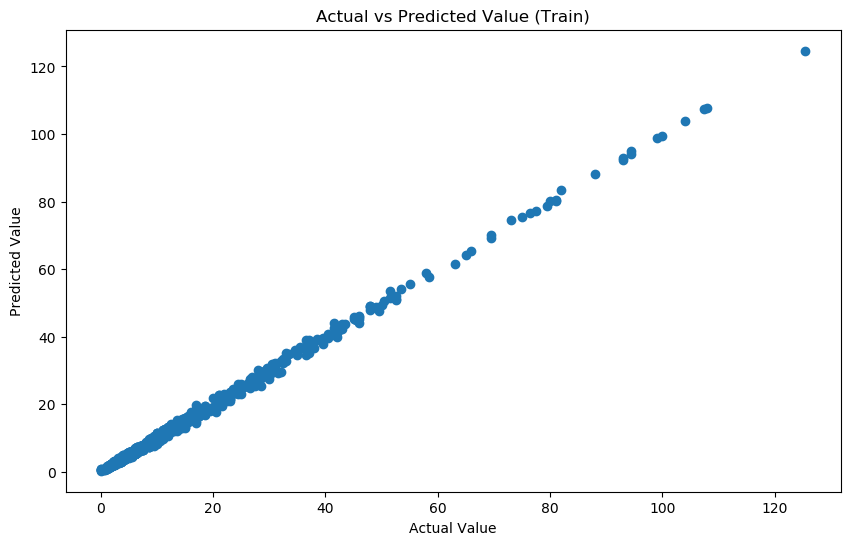

In [138]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(mid_y_train, mid_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [139]:
mid_y_pred_test = midGBR.predict(mid_X_test)
mid_df = pd.DataFrame({'Name':mid_name_test,'Actual': mid_y_test, 'Predicted': mid_y_pred_test})
mid_df["Difference"] = mid_df["Actual"]-mid_df["Predicted"]
mid_df_under = round(mid_df.sort_values('Difference').set_index('Name'),2)
mid_df_over = round(mid_df.sort_values('Difference').set_index('Name').tail(20),2)
mid_df_under

Actual  Predicted  Difference
Name                                               
Marcos Llorente        88.00      98.80      -10.80
David Silva            22.00      29.02       -7.02
Ferran Torres          68.50      73.62       -5.12
Pedri                  54.00      58.89       -4.89
N. Fekir               45.00      49.82       -4.82
D. Machís              26.00      30.16       -4.16
Carlos Soler           51.50      55.18       -3.68
L. Díaz                39.00      42.59       -3.59
A. Gómez               33.50      36.75       -3.25
Campaña                30.50      33.72       -3.22
J. Weigl               23.00      26.04       -3.04
V. Lindelöf            19.00      21.57       -2.57
Zubeldia               24.00      26.49       -2.49
Sergi Darder           20.00      22.16       -2.16
Kangin Lee              9.50      11.55       -2.05
Adama Traoré           18.50      20.53       -2.03
P. Pogba               79.50      81.45       -1.95
P. Højbjerg            34.50      36.34       -1.84
H. Herrera             21.00      22.82       -1.82
Gonçalo Guedes         39.00      40.80       -1.80
Matheus Nunes          17.00      18.67       -1.67
A. Fulgini             20.00      21.66       -1.66
E. Lamela              14.00      15.60       -1.60
L. Dendoncker          13.50      15.10       -1.60
Ronaldo Cabrais        35.50      37.08       -1.58
Coutinho               30.00      31.51       -1.51
F. Ribéry               6.00       7.49       -1.49
Brais Méndez           12.00      13.44       -1.44
D. James               16.00      17.38       -1.38
Bruno Costa            12.00      13.35       -1.35
M. Edwards             15.00      16.32       -1.32
O. Idrissi             10.00      11.30       -1.30
Puertas                14.00      15.27       -1.27
Adrià Pedrosa          10.50      11.72       -1.22
Ricardo Horta          21.00      22.18       -1.18
Diogo Gonçalves        12.00      13.16       -1.16
A. Karabec              5.50       6.59       -1.09
Marcos Antonio          7.50       8.57       -1.07
Nuno Padrenda          12.00      13.06       -1.06
L. Ivanušec            12.50      13.53       -1.03
Marlos                 13.00      14.03       -1.03
Pedrinho                9.00      10.01       -1.01
F. Souček               3.30       4.27       -0.97
L. Paredes             28.00      28.89       -0.89
Álvaro García           5.50       6.26       -0.76
S. Szymański            0.00       0.75       -0.75
P. Piatti               8.50       9.17       -0.67
J. Jønsson              3.70       4.37       -0.67
A. Aouchiche            6.50       7.16       -0.66
Cesc Fàbregas           3.50       4.15       -0.65
Lucas Fernandes         4.70       5.32       -0.62
Rúben Lameiras          5.00       5.61       -0.61
Pedrinho                2.40       3.01       -0.61
M. Munetsi              3.30       3.90       -0.60
Camarasa                2.70       3.29       -0.59
E. Karaca               3.50       4.09       -0.59
B. Mbeumo               5.50       6.08       -0.58
M. Sissoko             10.00      10.58       -0.58
A. Laurienté            9.50      10.07       -0.57
Xeka                   12.50      13.07       -0.57
Allan                  30.50      31.05       -0.55
Fredy                   1.90       2.42       -0.52
M. Djenepo              6.50       6.99       -0.49
K. Galanopoulos         3.70       4.17       -0.47
M. Jensen               5.50       5.97       -0.47
Murilo                  6.00       6.47       -0.47
Davidson               10.00      10.47       -0.47
Garrido                 1.60       2.07       -0.47
Aleix Febas             4.40       4.86       -0.46
J. Jankto               5.50       5.96       -0.46
F. Mollet              10.50      10.95       -0.45
A. Musa                 2.40       2.84       -0.44
E. Mwepu                9.00       9.44       -0.44
F. Torres               7.00       7.43       -0.43
I. Marcone              7.50       7.91       -0.41
Robson Denho      

In [140]:
score1 = midGBR.score(mid_X_test, mid_y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(mid_y_test,mid_y_pred_test ))  
print('Mean Squared Error:', metrics.mean_squared_error(mid_y_test,mid_y_pred_test ))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(mid_y_test,mid_y_pred_test )))
print('GBR R^2:',score1)

Mean Absolute Error: 0.8697308220198757
Mean Squared Error: 2.980719834751699
Root Mean Squared Error: 1.7264761321117934
GBR R^2: 0.9870393087988397


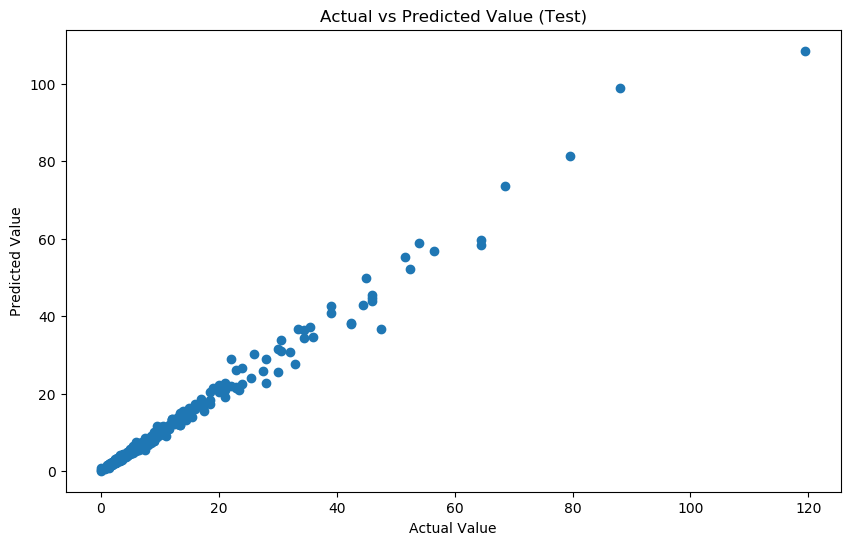

In [141]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(mid_y_test, mid_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## Model for defenders

### Dropping the derived features

In [142]:
defend_player_list.drop(['Movement', 'Power', 'Mentality', 'Defending', 'Total Stats', 'Base Stats'], axis=1, inplace=True)

### Correlation matrix

In [143]:
defend_corr_mat = defend_player_list.corr()
defend_corr_mat

Value       Age       OVA       POT    Height  \
Value                  1.000000 -0.243334  0.832708  0.773961  0.071294   
Age                   -0.243334  1.000000  0.012997 -0.501569 -0.009842   
OVA                    0.832708  0.012997  1.000000  0.754134  0.065164   
POT                    0.773961 -0.501569  0.754134  1.000000  0.116952   
Height                 0.071294 -0.009842  0.065164  0.116952  1.000000   
Weight                 0.066573  0.096750  0.097336  0.054004  0.754364   
BOV                    0.847869 -0.118191  0.967427  0.830620  0.155479   
Growth                 0.177565 -0.778258 -0.053340  0.615560  0.099633   
Wage in Thousand       0.089245 -0.040640  0.046778  0.064561 -0.003862   
Release Clause in Mil  0.994211 -0.253092  0.823018  0.779582  0.067893   
Heading Accuracy       0.274169  0.141335  0.364424  0.262175  0.657863   
Short Passing          0.526600 -0.059361  0.615522  0.502016 -0.199282   
FK Accuracy            0.057776  0.177810  0.121206 -0.088475 -0.341957   
Long Passing           0.347217  0.145922  0.457773  0.283392 -0.006495   
Acceleration           0.194394 -0.324502  0.140228  0.225258 -0.625614   
Sprint Speed           0.274019 -0.368363  0.207861  0.304651 -0.478616   
Agility                0.097609 -0.151447  0.075875  0.077784 -0.728518   
Reactions              0.667826  0.031822  0.804359  0.597476  0.057406   
Balance                0.044844 -0.106707  0.029748  0.027008 -0.813506   
Shot Power             0.135455  0.211857  0.225511  0.003265 -0.182923   
Jumping                0.135015  0.100056  0.183301  0.116193 -0.019522   
Stamina                0.212958 -0.155464  0.186350  0.170525 -0.403120   
Strength               0.122345  0.104794  0.150476  0.108207  0.733923   
Long Shots             0.069965  0.175130  0.152362 -0.058549 -0.380866   
Aggression             0.256266  0.192753  0.358437  0.197623  0.270259   
Interceptions          0.586761  0.097878  0.731845  0.556112  0.306262   
Positioning            0.123689  0.008741  0.155538  0.043670 -0.567231   
Vision                 0.269763  0.019579  0.329142  0.208618 -0.358525   
Penalties              0.034862  0.200939  0.129416 -0.053076 -0.251327   
Composure              0.480261  0.153243  0.616335  0.401375  0.065470   
Marking                0.539844  0.097550  0.684931  0.501471  0.382753   
Standing Tackle        0.641002  0.008215  0.775111  0.619314  0.347589   
Sliding Tackle         0.630281  0.031004  0.780563  0.590685  0.222890   
W/F                    0.113991  0.014129  0.130508  0.100215 -0.039816   
SM                     0.110445  0.017253  0.149515  0.053543 -0.499119   
IR                     0.491626  0.259759  0.634871  0.381142  0.135792   
PAC                    0.243710 -0.357943  0.181002  0.275085 -0.561507   
SHO                    0.132951  0.162059  0.224136  0.006578 -0.411033   
PAS                    0.317086  0.039206  0.404414  0.228798 -0.489931   
DRI                    0.312997 -0.111936  0.350454  0.276679 -0.603664   
DEF                    0.617752  0.085629  0.769898  0.584798  0.444674   
PHY                    0.277923  0.079377  0.321846  0.230847  0.508881   

                         Weight       BOV    Growth  Wage in Thousand  \
Value                  0.066573  0.847869  0.177565          0.089245   
Age                    0.096750 -0.118191 -0.778258         -0.040640   
OVA                    0.097336  0.967427 -0.053340          0.046778   
POT                    0.054004  0.830620  0.615560          0.064561   
Height                 0.754364  0.155479  0.099633         -0.003862   
Weight                 1.000000  0.150594 -0.034692          0.009383   
BOV                    0.150594  1.000000  0.102049          0.050711   
Growth                -0.034692  0.102049  1.000000          0.042033   
Wage in Thousand       0.009383  0.050711  0.042033          1.000000   
Release Clause in Mil  0.057582  0.841729  0.197739          0.101674 

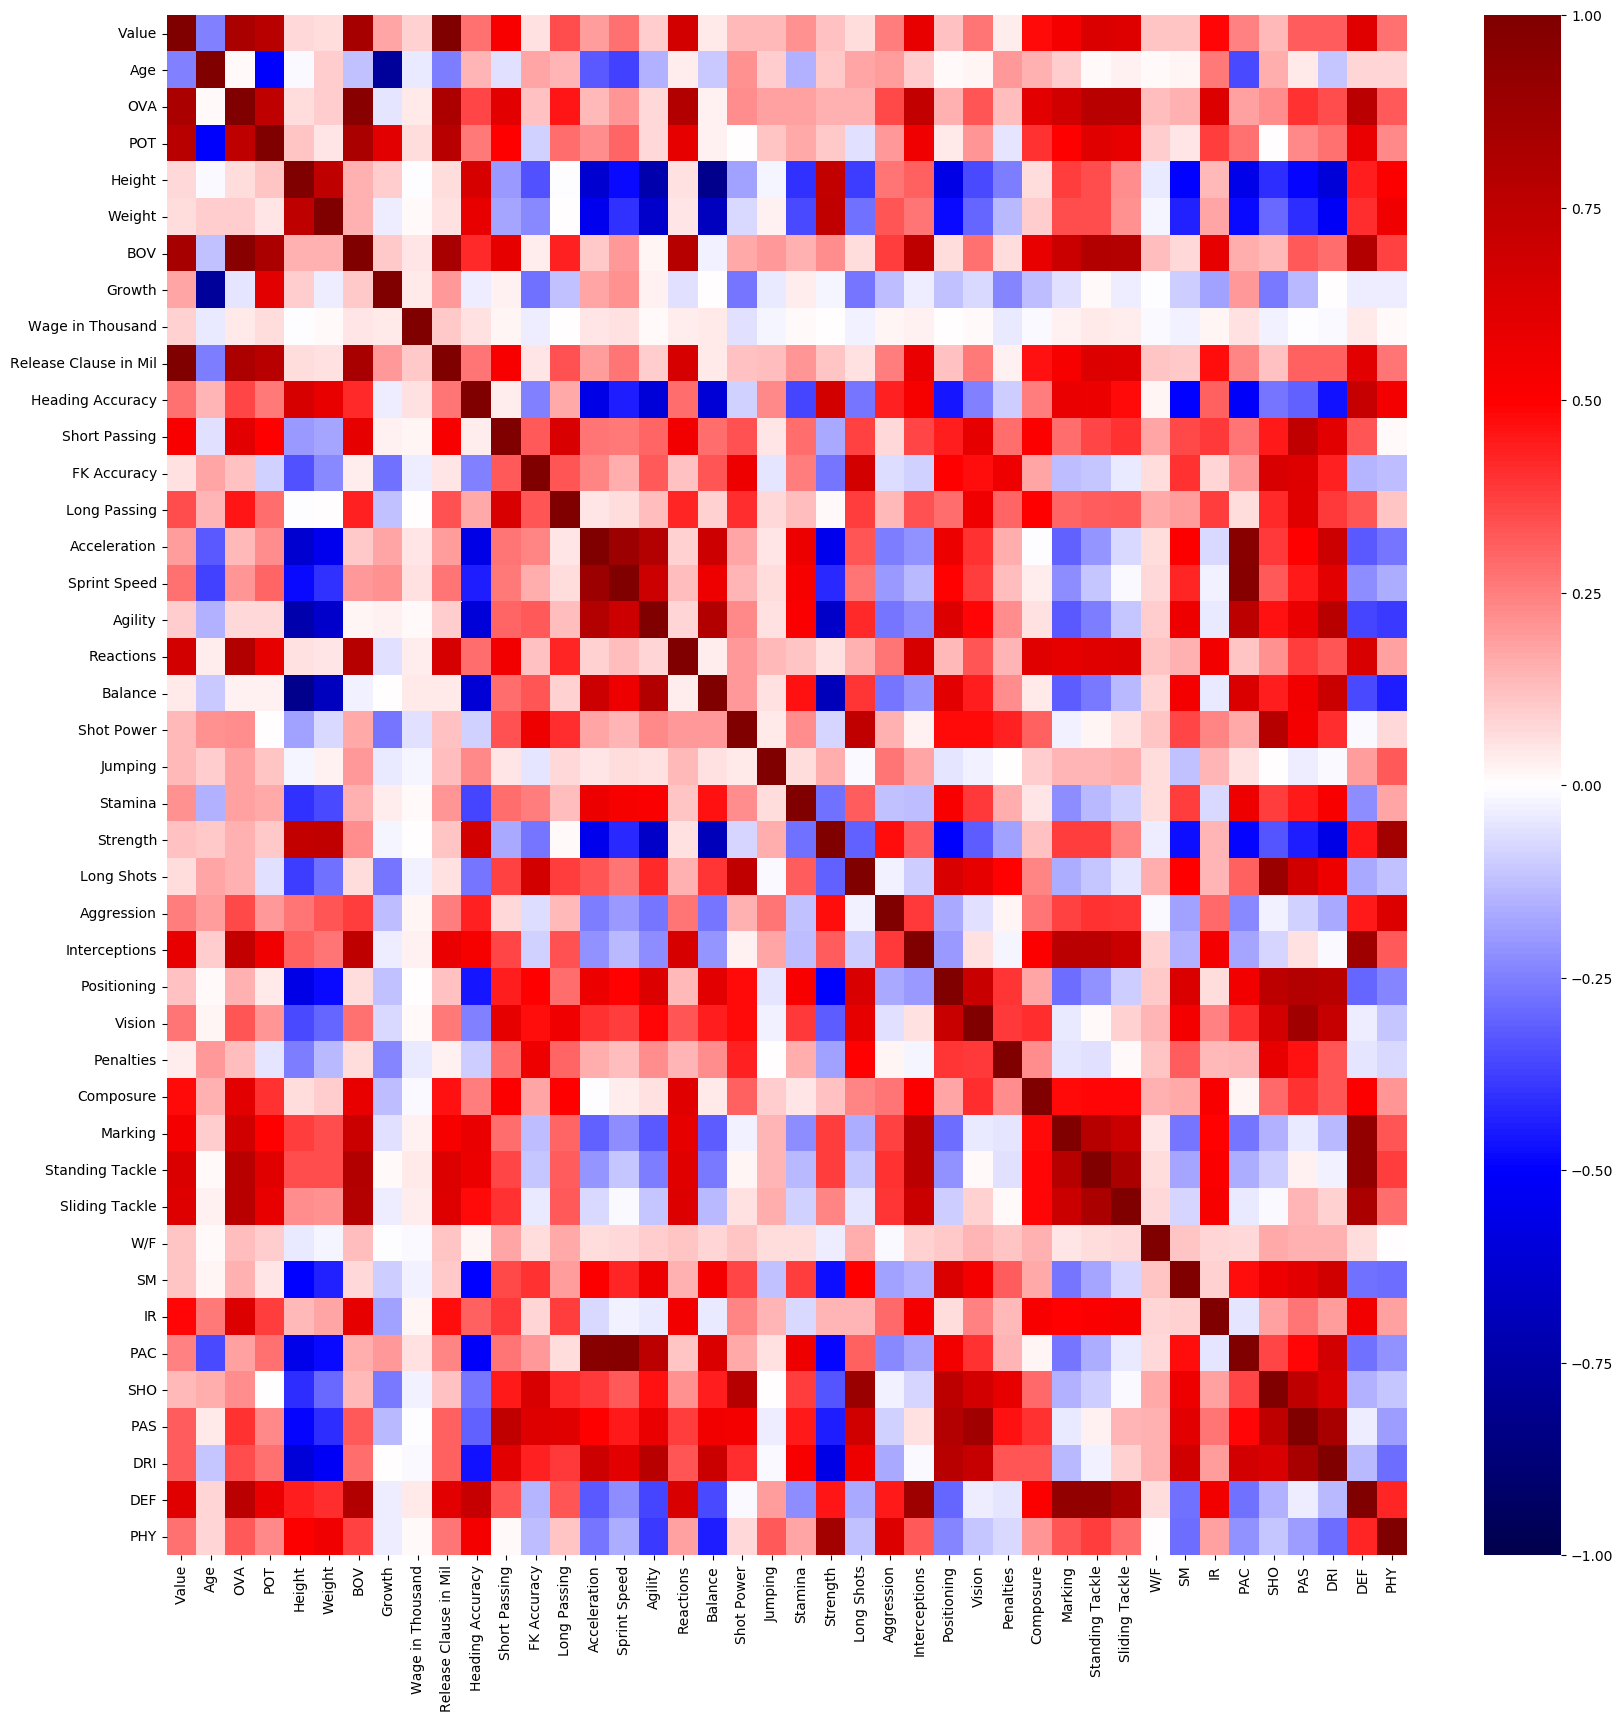

In [144]:
plt.figure(figsize=(20,20)),
plt.style.use('default')
sns.heatmap(defend_player_list.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);
plt.show()

In [145]:
pd.DataFrame(defend_corr_mat["Value"]).sort_values("Value", ascending=True).head(20)

Value
Age              -0.243334
Penalties         0.034862
Balance           0.044844
FK Accuracy       0.057776
Weight            0.066573
Long Shots        0.069965
Height            0.071294
Wage in Thousand  0.089245
Agility           0.097609
SM                0.110445
W/F               0.113991
Strength          0.122345
Positioning       0.123689
SHO               0.132951
Jumping           0.135015
Shot Power        0.135455
Growth            0.177565
Acceleration      0.194394
Stamina           0.212958
PAC               0.243710

In [146]:
defend_player_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   1202 non-null   object 
 1   Value                  1202 non-null   float64
 2   Age                    1202 non-null   int32  
 3   OVA                    1202 non-null   int32  
 4   POT                    1202 non-null   int32  
 5   Team & Contract        1202 non-null   object 
 6   Height                 1202 non-null   int32  
 7   Weight                 1202 non-null   int32  
 8   foot                   1202 non-null   object 
 9   BOV                    1202 non-null   int32  
 10  BP                     1202 non-null   object 
 11  Growth                 1202 non-null   int32  
 12  Wage in Thousand       1202 non-null   float64
 13  Release Clause in Mil  1202 non-null   float64
 14  Heading Accuracy       1202 non-null   int32  
 15  Shor

## Dropping the categorical and textual features

In [147]:
defend_X = defend_player_list.drop(columns=["Value","Team & Contract","BP", "A/W", "D/W","foot" ])
defend_Y = defend_player_list.loc[:,"Value"]

In [148]:
defend_X_train, defend_X_test, defend_y_train, defend_y_test = train_test_split(defend_X,defend_Y,test_size=0.2, random_state=10)

defender_name_train = defend_X_train.Name
defender_name_test = defend_X_test.Name

defend_X_train = defend_X_train.drop(columns=['Name'])
defend_X_test = defend_X_test.drop(columns=['Name'])

defend_lr = LinearRegression()
defend_lr.fit(defend_X_train,defend_y_train)

LinearRegression()

In [149]:
defend_y_pred = defend_lr.predict(defend_X_train)
defend_df = pd.DataFrame({'Name':defender_name_train,'Actual': defend_y_train, 'Predicted': defend_y_pred})
defend_df["Difference"] = defend_df["Actual"]-defend_df["Predicted"]
defend_df = round(defend_df.sort_values('Difference').set_index('Name'),2)
defend_df

Actual  Predicted  Difference
Name                                         
J. Koundé         53.0      62.23       -9.23
Éder Militão      56.5      64.21       -7.71
Gayà              43.5      48.51       -5.01
J. Giménez        52.0      56.09       -4.09
Diego Carlos      30.5      34.19       -3.69
...                ...        ...         ...
D. Blind          22.0      17.24        4.76
M. Škriniar       70.0      65.09        4.91
K. Koulibaly      55.5      49.94        5.56
N. Tagliafico     27.5      21.23        6.27
M. de Ligt        75.0      67.39        7.61

[961 rows x 3 columns]

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(defend_y_train, defend_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(defend_y_train, defend_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_train, defend_y_pred)))
print('Linear Regression R^2:',defend_lr.score(defend_X_train,defend_y_train))

Mean Absolute Error: 0.6966061267604712
Mean Squared Error: 1.2376616616975313
Root Mean Squared Error: 1.112502432220951
Linear Regression R^2: 0.9914031531815072


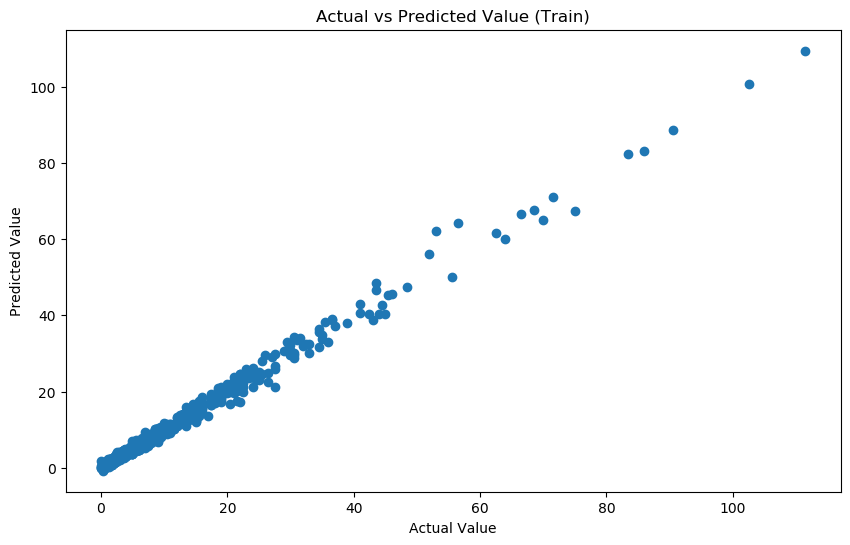

In [151]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(defend_y_train, defend_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [152]:
defend_y_pred_test = defend_lr.predict(defend_X_test)
defend_df = pd.DataFrame({'Name':defender_name_test,'Actual': defend_y_test, 'Predicted': defend_y_pred_test})
defend_df["Difference"] = defend_df["Actual"]-defend_df["Predicted"]
defend_df = round(defend_df.sort_values('Difference').set_index('Name'),2)
defend_df

Actual  Predicted  Difference
Name                                             
Pau Torres           56.50      65.55       -9.05
D. Alaba             35.50      39.04       -3.54
M. Acuña             37.00      40.38       -3.38
Jordi Alba           47.00      50.02       -3.02
Carvajal             47.50      50.38       -2.88
Bartra               17.50      19.86       -2.36
Eric García          15.50      17.70       -2.20
S. Umtiti            19.50      21.63       -2.13
Gabriel              30.00      32.13       -2.13
Gabriel Paulista     25.00      27.02       -2.02
L. Augustinsson       8.00       9.82       -1.82
Mario Gaspar         15.00      16.61       -1.61
Rubén Duarte         13.00      14.58       -1.58
Diogo Dalot          11.50      13.02       -1.52
D. Vida               9.00      10.51       -1.51
A. Rami               0.62       2.12       -1.50
J. Gomez             43.50      44.95       -1.45
Raúl Albiol           8.00       9.45       -1.45
N. Otamendi          12.50      13.90       -1.40
J. Denayer           24.50      25.89       -1.39
Thiago Silva          9.50      10.87       -1.37
R. Le Normand        19.00      20.28       -1.28
M. Keane             20.00      21.23       -1.23
R. Cannon             6.50       7.72       -1.22
Marcano               3.40       4.60       -1.20
S. Ingason            6.00       7.15       -1.15
M. Aarons            12.00      13.14       -1.14
Aritz Elustondo      18.50      19.64       -1.14
J. Bruma              2.50       3.62       -1.12
S. Deli               4.70       5.81       -1.11
P. van Aanholt        6.50       7.48       -0.98
F. Schär              7.00       7.97       -0.97
M. Kempf              8.00       8.97       -0.97
L. Ayling             6.50       7.45       -0.95
J. Svensson          12.50      13.45       -0.95
Akapo                 2.80       3.73       -0.93
Calero                7.00       7.92       -0.92
D. Godín              4.60       5.50       -0.90
J. Amavi              8.00       8.87       -0.87
José Fonte            4.60       5.44       -0.84
J. Andersen          12.50      13.25       -0.75
Vivian                6.50       7.24       -0.74
Nacho Vidal           7.00       7.74       -0.74
N. Aké               16.50      17.22       -0.72
E. Krafth             3.30       3.98       -0.68
Jonny                22.00      22.67       -0.67
Unai García           2.20       2.84       -0.64
Sidcley               3.80       4.44       -0.64
S. Kolašinac          5.00       5.62       -0.62
I. Piris              3.90       4.51       -0.61
D. Bradarić           8.50       9.10       -0.60
Juan Jesus            2.50       3.06       -0.56
F. Novák              3.10       3.66       -0.56
A. Masina             4.40       4.95       -0.55
Kaimo Lima            4.10       4.65       -0.55
A. Kolarov            3.20       3.74       -0.54
S. M'Bia              0.80       1.31       -0.51
A. Szalai            11.00      11.50       -0.50
R. Aguilar           12.50      12.99       -0.49
M. Salisu            15.50      15.99       -0.49
A. Nyom               3.50       3.98       -0.48
Rodrigo               2.10       2.57       -0.47
J. Toljan             3.30       3.76       -0.46
B. Ecuélé Manga       1.50       1.94       -0.44
Cris Laranjeiros      4.70       5.12       -0.42
Z. Sanusi             8.00       8.40       -0.40
S. Aziz               3.50       3.89       -0.39
Willyan               3.10       3.48       -0.38
V. Nsimba             2.30       2.67       -0.37
T. Delaine            6.50       6.87       -0.37
Emerson              25.00      25.35       -0.35
H. Palacios           2.80       3.15       -0.35
Juli Piresinho        5.00       5.34       -0.34
C. Dawson             7.00       7.33       -0.33
Ó. Duarte             2.00       2.31       -0.31
L. Dunk              16.00      16.31       -0.31
K. Ehizibue           2.80       3.11       -0.31
Caio Henrique        18.50      18.80       -0.30
Cote                

In [153]:
print('Mean Absolute Error:', metrics.mean_absolute_error(defend_y_test, defend_y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(defend_y_test, defend_y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_test, defend_y_pred_test)))
print('Linear Regression R^2:',defend_lr.score(defend_X_test,defend_y_test))

Mean Absolute Error: 0.7806553642685681
Mean Squared Error: 1.8322066182017671
Root Mean Squared Error: 1.353590269690857
Linear Regression R^2: 0.9863942030677186


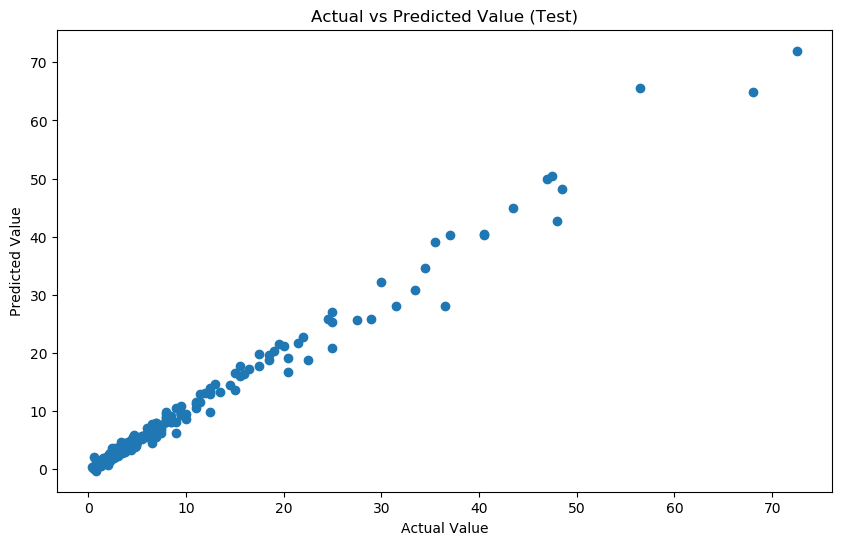

In [154]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(defend_y_test, defend_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [155]:
defend_lm = LinearRegression()
defend_scaler = StandardScaler()

defend_X_train_scaled = defend_scaler.fit_transform(defend_X_train.values)
defend_X_test_scaled = defend_scaler.transform(defend_X_test.values)

defend_lm_reg = Ridge(alpha=0.05, normalize=True)

defend_lm_lasso = Lasso(alpha=0.05, normalize=True)
defend_poly = PolynomialFeatures(degree=2) 

defend_X_train_poly = defend_poly.fit_transform(defend_X_train.values)
defend_X_test_poly = defend_poly.transform(defend_X_test.values)

defend_lm_poly = LinearRegression()

defend_lm.fit(defend_X_train, defend_y_train)
defend_lm_pred = defend_lm.predict(defend_X_test)
print(f'Linear Regression for test data R^2: {defend_lm.score(defend_X_test, defend_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_test, defend_lm_pred)))
print("")

defend_lm_reg.fit(defend_X_train_scaled, defend_y_train)
defend_lm_reg_pred = defend_lm_reg.predict(defend_X_test_scaled)
print(f'Ridge Regression for test data R^2: {defend_lm_reg.score(defend_X_test_scaled, defend_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_test, defend_lm_reg_pred)))
print("")


defend_lm_lasso.fit(defend_X_train,defend_y_train)
defend_lm_lasso_pred = defend_lm_lasso.predict(defend_X_test)
print(f'Lasso Regression for test data R^2: {defend_lm_lasso.score(defend_X_test, defend_y_test):.6f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_test, defend_lm_lasso_pred)))
print("")

defend_lm_poly.fit(defend_X_train_poly, defend_y_train)
defend_lm_poly_pred = defend_lm_poly.predict(defend_X_test_poly)
print(f'Degree 2 polynomial regression for test data R^2: {defend_lm_poly.score(defend_X_test_poly, defend_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_test, defend_lm_poly_pred)))

Linear Regression for test data R^2: 0.986
Root Mean Squared Error: 1.353590269690857

Ridge Regression for test data R^2: 0.984
Root Mean Squared Error: 1.4880299198677893

Lasso Regression for test data R^2: 0.971681
Root Mean Squared Error: 1.952841162435751



C:\Users\Mayank Gubba\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
C:\Users\Mayank Gubba\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

Degree 2 polynomial regression for test data R^2: 0.951
Root Mean Squared Error: 2.569286499632733


## MODELLING WITH SVR

#### We applied SVR with 4 different kernals ('poly' , 'linear' , 'rbf' , 'sigmoid') where 'poly' was producing the best results in terms of R^2 score

In [156]:
svr = SVR(kernel='poly').fit(defend_X_train, defend_y_train)

In [157]:
defend_y_pred = svr.predict(defend_X_train)
defend_df = pd.DataFrame({'Name':defender_name_train,'Actual': defend_y_train, 'Predicted': defend_y_pred})
defend_df["Difference"] = defend_df["Actual"]-defend_df["Predicted"]
defend_df_under = round(defend_df.sort_values('Difference').set_index('Name'),2)
defend_df_over = round(defend_df.sort_values('Difference').set_index('Name').tail(20),2)
defend_df_under

Actual  Predicted  Difference
Name                                         
Éder Militão      56.5      64.90       -8.40
J. Koundé         53.0      60.04       -7.04
F. Mendy          43.5      49.59       -6.09
V. van Dijk       86.0      90.74       -4.74
Marquinhos        90.5      94.28       -3.78
...                ...        ...         ...
D. Blind          22.0      16.00        6.00
M. Škriniar       70.0      63.15        6.85
N. Tagliafico     27.5      20.40        7.10
M. de Ligt        75.0      66.99        8.01
K. Koulibaly      55.5      47.48        8.02

[961 rows x 3 columns]

In [158]:
score = svr.score(defend_X_train, defend_y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(defend_y_train, defend_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(defend_y_train, defend_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_train, defend_y_pred)))
print('SVR R^2:',score)

Mean Absolute Error: 0.5827159220791732
Mean Squared Error: 1.2828970861018367
Root Mean Squared Error: 1.1326504695190995
SVR R^2: 0.9910889461357465


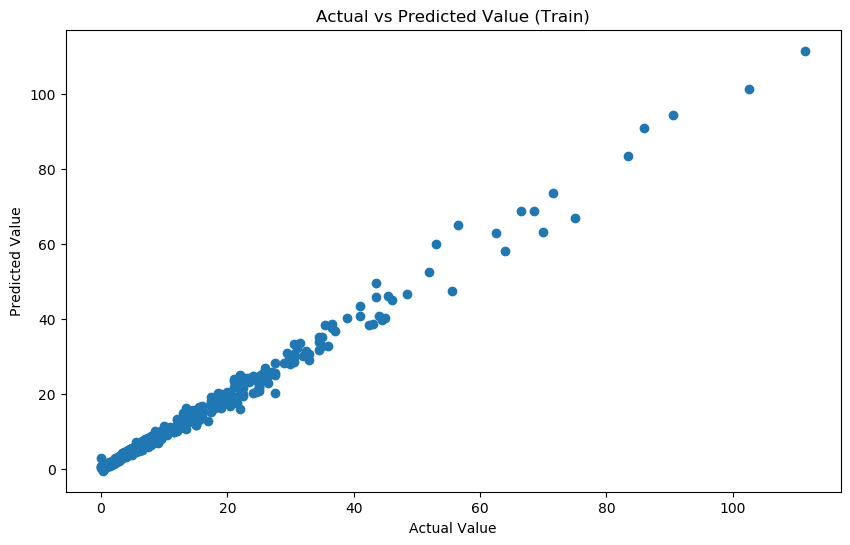

In [159]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(defend_y_train, defend_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [160]:
defend_y_pred_test = svr.predict(defend_X_test)
defend_df = pd.DataFrame({'Name':defender_name_test,'Actual': defend_y_test, 'Predicted': defend_y_pred_test})
defend_df["Difference"] = defend_df["Actual"]-defend_df["Predicted"]
defend_df_under = round(defend_df.sort_values('Difference').set_index('Name'),2)
defend_df_over = round(defend_df.sort_values('Difference').set_index('Name').tail(20),2)
defend_df_under

Actual  Predicted  Difference
Name                                             
Pau Torres           56.50      62.58       -6.08
D. Alaba             35.50      40.24       -4.74
M. Acuña             37.00      40.53       -3.53
Carvajal             47.50      50.92       -3.42
Jordi Alba           47.00      49.92       -2.92
Thiago Silva          9.50      11.34       -1.84
Gabriel Paulista     25.00      26.43       -1.43
Bartra               17.50      18.71       -1.21
Eric García          15.50      16.69       -1.19
Raúl Albiol           8.00       9.13       -1.13
Germán                5.50       6.54       -1.04
José Fonte            4.60       5.61       -1.01
Diogo Dalot          11.50      12.36       -0.86
Calero                7.00       7.80       -0.80
J. Denayer           24.50      25.28       -0.78
S. Ingason            6.00       6.77       -0.77
Vivian                6.50       7.25       -0.75
E. Botka              2.30       3.04       -0.74
Marcano               3.40       4.09       -0.69
Sidcley               3.80       4.49       -0.69
L. Augustinsson       8.00       8.64       -0.64
A. Nyom               3.50       4.14       -0.64
R. Cannon             6.50       7.13       -0.63
N. Otamendi          12.50      13.11       -0.61
Mario Gaspar         15.00      15.59       -0.59
A. Kolarov            3.20       3.78       -0.58
S. Umtiti            19.50      20.08       -0.58
L. Shaw              48.50      49.05       -0.55
Cote                  5.50       6.03       -0.53
M. Blažič             3.10       3.62       -0.52
Rafa Soares           3.70       4.22       -0.52
Nacho Vidal           7.00       7.52       -0.52
Juli Piresinho        5.00       5.51       -0.51
Jaume Costa           7.50       8.00       -0.50
I. Piris              3.90       4.39       -0.49
Unai García           2.20       2.68       -0.48
D. Godín              4.60       5.06       -0.46
P. Aguilar            1.80       2.24       -0.44
S. Deli               4.70       5.13       -0.43
F. Novák              3.10       3.52       -0.42
H. Palacios           2.80       3.22       -0.42
P. van Aanholt        6.50       6.92       -0.42
A. Szalai            11.00      11.41       -0.41
J. Duverne            3.00       3.41       -0.41
F. Schär              7.00       7.41       -0.41
D. Amartey            8.00       8.40       -0.40
D. Bradarić           8.50       8.89       -0.39
J. Lewis              6.00       6.39       -0.39
E. Krafth             3.30       3.68       -0.38
Kaimo Lima            4.10       4.47       -0.37
E. Cabaco             4.00       4.37       -0.37
P. Goltz              1.00       1.36       -0.36
A. Robinson           4.30       4.65       -0.35
A. Masina             4.40       4.75       -0.35
V. Nsimba             2.30       2.65       -0.35
N. Phillips           4.40       4.74       -0.34
Akapo                 2.80       3.14       -0.34
L. Ayling             6.50       6.84       -0.34
Willyan               3.10       3.43       -0.33
S. Aziz               3.50       3.83       -0.33
R. Řezník             2.10       2.42       -0.32
L. Takács             2.90       3.21       -0.31
M. Heyer              2.00       2.30       -0.30
S. Kolašinac          5.00       5.29       -0.29
R. Thomas             3.60       3.88       -0.28
S. Mitrović           2.10       2.38       -0.28
Rodrigo               2.10       2.37       -0.27
Ó. Duarte             2.00       2.26       -0.26
P. Pekarík            1.50       1.75       -0.25
P. McNair             3.10       3.35       -0.25
Cris Laranjeiros      4.70       4.95       -0.25
Y. Valery             4.00       4.25       -0.25
Ö. Şahiner            1.60       1.85       -0.25
J. Svensson          12.50      12.74       -0.24
M. Le Marchand        2.10       2.34       -0.24
L. Kelly              4.90       5.13       -0.23
Vieirundinho          5.00       5.23       -0.23
C. Jullien            5.50       5.73       -0.23
M. Aarons           

In [161]:
score1 = svr.score(defend_X_test, defend_y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(defend_y_test, defend_y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(defend_y_test, defend_y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_test, defend_y_pred_test)))
print('SVR R^2:',score1)

Mean Absolute Error: 0.6487706031218903
Mean Squared Error: 1.816055953968444
Root Mean Squared Error: 1.347611202820919
SVR R^2: 0.9865141364069485


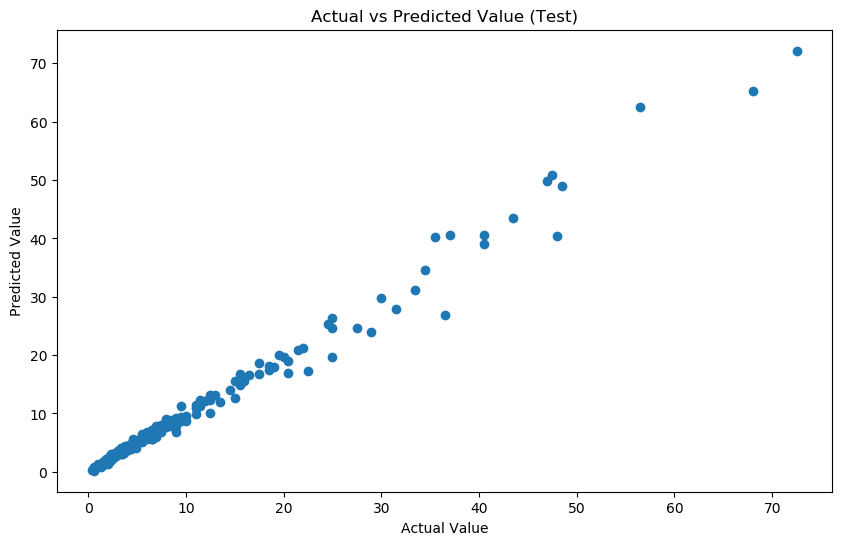

In [162]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(defend_y_test, defend_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## MODELLING WITH GRADIENT BOOSTING REGRESSION (GBR) MODEL

In [163]:
defendGBR_model = GradientBoostingRegressor()
defendGBR=defendGBR_model.fit(defend_X_train, defend_y_train)

In [164]:
defend_y_pred = defendGBR_model.predict(defend_X_train)
defend_df = pd.DataFrame({'Name':defender_name_train,'Actual': defend_y_train, 'Predicted': defend_y_pred})
defend_df["Difference"] = defend_df["Actual"]-defend_df["Predicted"]
defend_df_under = round(defend_df.sort_values('Difference').set_index('Name'),2)
defend_df_over = round(defend_df.sort_values('Difference').set_index('Name').tail(20),2)
defend_df_under

Actual  Predicted  Difference
Name                                          
Mario Hermoso      35.5      37.75       -2.25
C. Mbemba          20.5      22.43       -1.93
Gayà               43.5      45.40       -1.90
R. Araujo          29.5      31.16       -1.66
Pedraza            14.5      16.14       -1.64
...                 ...        ...         ...
F. Maouassa        13.5      11.89        1.61
D. Muñoz            9.5       7.85        1.65
N. Tagliafico      27.5      25.64        1.86
E. Álvarez         20.5      18.61        1.89
F. Angileri        15.0      12.90        2.10

[961 rows x 3 columns]

In [165]:
score = defendGBR.score(defend_X_train, defend_y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(defend_y_train,defend_y_pred ))  
print('Mean Squared Error:', metrics.mean_squared_error(defend_y_train,defend_y_pred ))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_train,defend_y_pred )))
print('GBR R^2:',score)

Mean Absolute Error: 0.33308099212174486
Mean Squared Error: 0.22235005136579525
Root Mean Squared Error: 0.4715400845800866
GBR R^2: 0.998455547755229


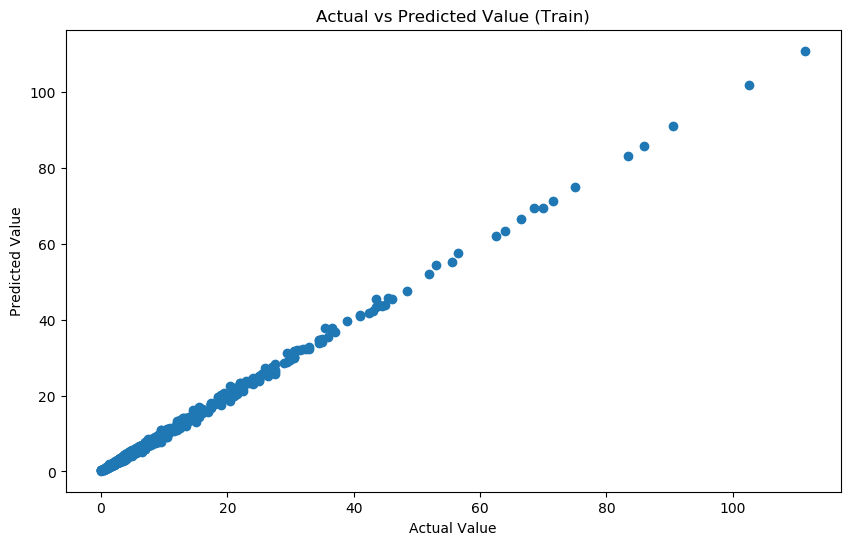

In [166]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(defend_y_train, defend_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [167]:
defend_y_pred_test = defendGBR.predict(defend_X_test)
defend_df = pd.DataFrame({'Name':defender_name_test,'Actual': defend_y_test, 'Predicted': defend_y_pred_test})
defend_df["Difference"] = defend_df["Actual"]-defend_df["Predicted"]
defend_df_under = round(defend_df.sort_values('Difference').set_index('Name'),2)
defend_df_over = round(defend_df.sort_values('Difference').set_index('Name').tail(20),2)
defend_df_under

Actual  Predicted  Difference
Name                                             
Pau Torres           56.50      64.11       -7.61
Jordi Alba           47.00      51.24       -4.24
D. Alaba             35.50      38.68       -3.18
Gabriel              30.00      32.84       -2.84
Carvajal             47.50      49.84       -2.34
M. Aarons            12.00      13.91       -1.91
Diogo Dalot          11.50      13.23       -1.73
Aritz Elustondo      18.50      20.17       -1.67
Mario Gaspar         15.00      16.39       -1.39
A. Szalai            11.00      12.39       -1.39
N. Otamendi          12.50      13.87       -1.37
Rubén Duarte         13.00      14.22       -1.22
J. Gomez             43.50      44.67       -1.17
M. Keane             20.00      21.13       -1.13
C. Dagba             10.00      11.06       -1.06
N. Aké               16.50      17.51       -1.01
M. Acuña             37.00      37.97       -0.97
T. Castagne          21.50      22.36       -0.86
Raúl Albiol           8.00       8.86       -0.86
L. Augustinsson       8.00       8.86       -0.86
J. Denayer           24.50      25.32       -0.82
Eric García          15.50      16.25       -0.75
Germán                5.50       6.24       -0.74
L. Dunk              16.00      16.73       -0.73
R. Holding           11.50      12.23       -0.73
J. Lewis              6.00       6.72       -0.72
J. Svensson          12.50      13.22       -0.72
J. Andersen          12.50      13.16       -0.66
A. Nyom               3.50       4.14       -0.64
Jaume Costa           7.50       8.13       -0.63
R. Aguilar           12.50      13.12       -0.62
R. Cannon             6.50       7.09       -0.59
S. Umtiti            19.50      20.08       -0.58
Y. Valery             4.00       4.55       -0.55
Gabriel Paulista     25.00      25.54       -0.54
Z. Sanusi             8.00       8.54       -0.54
S. Deli               4.70       5.24       -0.54
D. Bradarić           8.50       9.02       -0.52
P. van Aanholt        6.50       7.01       -0.51
T. Delaine            6.50       7.00       -0.50
I. Piris              3.90       4.40       -0.50
Akapo                 2.80       3.29       -0.49
Sidcley               3.80       4.26       -0.46
H. Palacios           2.80       3.26       -0.46
Juli Piresinho        5.00       5.44       -0.44
E. Cabaco             4.00       4.43       -0.43
Unai García           2.20       2.62       -0.42
Ö. Şahiner            1.60       2.01       -0.41
Jean                  2.20       2.61       -0.41
Cote                  5.50       5.90       -0.40
Rafa Soares           3.70       4.10       -0.40
Vivian                6.50       6.89       -0.39
J. Duverne            3.00       3.37       -0.37
Calero                7.00       7.37       -0.37
Marcano               3.40       3.76       -0.36
P. McNair             3.10       3.45       -0.35
A. Robinson           4.30       4.63       -0.33
S. Doumbia            4.30       4.63       -0.33
A. Kolarov            3.20       3.53       -0.33
P. Goltz              1.00       1.33       -0.33
A. Masina             4.40       4.73       -0.33
Z. Feddal            14.50      14.83       -0.33
A. Bamba              1.70       2.02       -0.32
Saúl                  2.30       2.62       -0.32
Bigas                 1.90       2.22       -0.32
Willyan               3.10       3.41       -0.31
T. Smith              1.60       1.91       -0.31
H. Toffolo            2.90       3.20       -0.30
P. Pekarík            1.50       1.80       -0.30
J. Bruma              2.50       2.79       -0.29
S. M'Bia              0.80       1.09       -0.29
S. Malone             2.00       2.28       -0.28
Henrique Gomes        2.40       2.67       -0.27
C. Jullien            5.50       5.75       -0.25
S. Kolašinac          5.00       5.25       -0.25
M. Le Marchand        2.10       2.34       -0.24
José Fonte            4.60       4.84       -0.24
S. Mitrović           2.10       2.33       -0.23
B. Ecuélé Manga     

In [168]:
score1 = defendGBR.score(defend_X_test, defend_y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(defend_y_test,defend_y_pred_test ))  
print('Mean Squared Error:', metrics.mean_squared_error(defend_y_test,defend_y_pred_test ))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(defend_y_test,defend_y_pred_test )))
print('GBR R^2:',score1)

Mean Absolute Error: 0.6825553398594423
Mean Squared Error: 1.8067382295715284
Root Mean Squared Error: 1.3441496306481389
GBR R^2: 0.9865833289667592


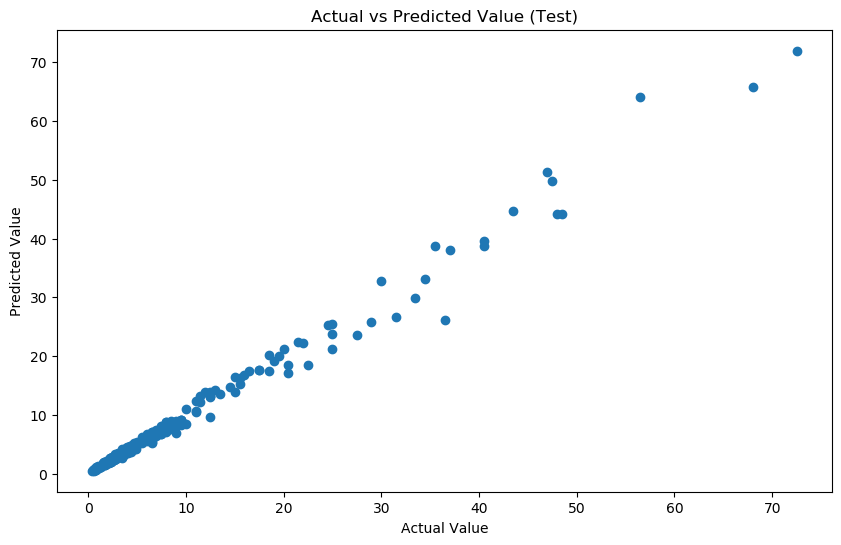

In [169]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(defend_y_test, defend_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## Model for goalkeeper

### Dropping the derived features

In [170]:
goalkeeper_player_list.drop(['Mentality', 'Goalkeeping', 'Total Stats', 'Base Stats'], axis=1, inplace=True)

### Correlation matrix

In [171]:
goalkeeper_corr_mat = goalkeeper_player_list.corr()
goalkeeper_corr_mat

Value       Age       OVA       POT    Height  \
Value                  1.000000 -0.256530  0.745673  0.755705  0.116905   
Age                   -0.256530  1.000000  0.049594 -0.366936 -0.064616   
OVA                    0.745673  0.049594  1.000000  0.843597  0.104974   
POT                    0.755705 -0.366936  0.843597  1.000000  0.140419   
Height                 0.116905 -0.064616  0.104974  0.140419  1.000000   
Weight                 0.075409  0.136327  0.075689  0.002219  0.561079   
BOV                    0.745673  0.049594  1.000000  0.843597  0.104974   
Growth                 0.163467 -0.762504 -0.095647  0.453827  0.086101   
Wage in Thousand       0.044446 -0.003678  0.000698 -0.026492  0.017949   
Release Clause in Mil  0.995654 -0.258197  0.730113  0.747239  0.113768   
Short Passing          0.299861  0.067911  0.355087  0.320728 -0.062068   
Long Passing           0.257103  0.096482  0.300979  0.269138 -0.022435   
Stamina                0.172007  0.039593  0.269850  0.181827 -0.090701   
Aggression             0.030908  0.259065  0.111372 -0.054307  0.006039   
Vision                 0.204065  0.048334  0.284195  0.211867 -0.101429   
Penalties              0.070259  0.205214  0.149678  0.036112 -0.047359   
Composure              0.195829  0.226765  0.331609  0.176609 -0.025237   
GK Diving              0.651565 -0.057464  0.877822  0.761166  0.087596   
GK Handling            0.634035  0.045063  0.859817  0.723455  0.139022   
GK Kicking             0.415692  0.003999  0.516699  0.468617 -0.063630   
GK Positioning         0.593859  0.199478  0.876531  0.691860  0.132519   
GK Reflexes            0.663912 -0.084789  0.877314  0.795757  0.092710   
W/F                    0.112099  0.013086  0.085197  0.089966 -0.087963   
SM                          NaN       NaN       NaN       NaN       NaN   
IR                     0.492379  0.256999  0.658087  0.482214  0.129434   
PAC                    0.651565 -0.057464  0.877822  0.761166  0.087596   
SHO                    0.634035  0.045063  0.859817  0.723455  0.139022   
PAS                    0.415692  0.003999  0.516699  0.468617 -0.063630   
DRI                    0.663912 -0.084789  0.877314  0.795757  0.092710   
DEF                    0.169249  0.039358  0.254093  0.158778 -0.209036   
PHY                    0.593859  0.199478  0.876531  0.691860  0.132519   

                         Weight       BOV    Growth  Wage in Thousand  \
Value                  0.075409  0.745673  0.163467          0.044446   
Age                    0.136327  0.049594 -0.762504         -0.003678   
OVA                    0.075689  1.000000 -0.095647          0.000698   
POT                    0.002219  0.843597  0.453827         -0.026492   
Height                 0.561079  0.104974  0.086101          0.017949   
Weight                 1.000000  0.075689 -0.121488         -0.018259   
BOV                    0.075689  1.000000 -0.095647          0.000698   
Growth                -0.121488 -0.095647  1.000000         -0.050267   
Wage in Thousand      -0.018259  0.000698 -0.050267          1.000000   
Release Clause in Mil  0.069995  0.730113  0.173597          0.055429   
Short Passing         -0.008339  0.355087  0.005293         -0.077507   
Long Passing           0.020113  0.300979 -0.000550         -0.068847   
Stamina               -0.054621  0.269850 -0.110744         -0.130369   
Aggression             0.112474  0.111372 -0.285488         -0.053203   
Vision                -0.081056  0.284195 -0.078864         -0.135901   
Penalties              0.041825  0.149678 -0.181443         -0.001288   
Composure             -0.000906  0.331609 -0.222904         -0.020419   
GK Diving             -0.009174  0.877822 -0.045704          0.003247   
GK Handling            0.084680  0.859817 -0.085733          0.008028   
GK Kicking            -0.022527  0.516699  0.011255          0.007668   
GK Positioning         0.146466  0.876531 -0.172037         -0.026448   
GK Reflexes        

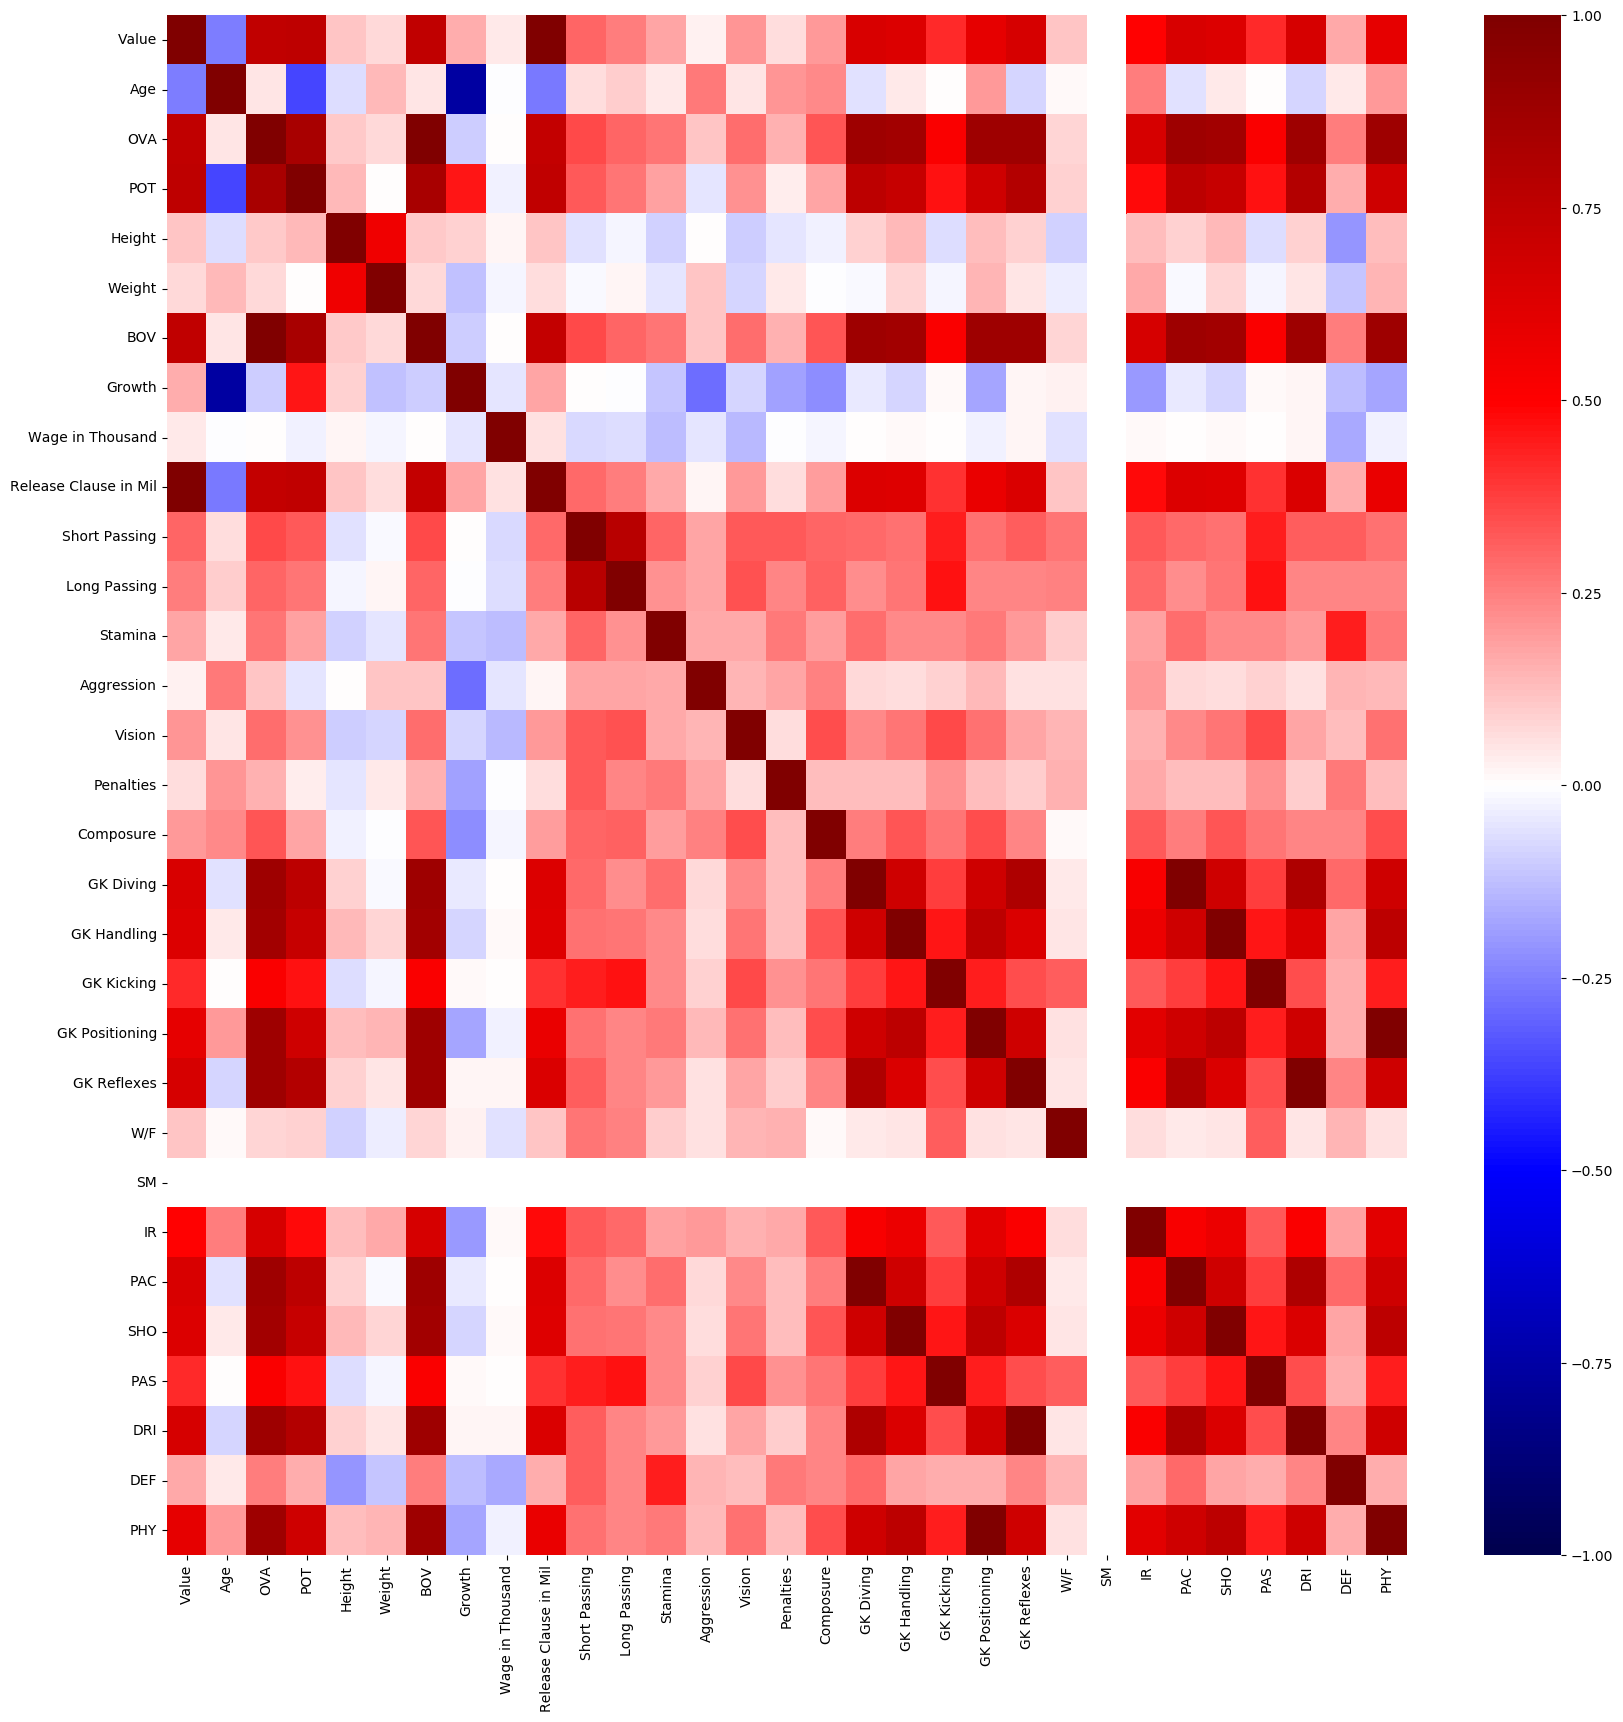

In [172]:
plt.figure(figsize=(20,20)),
plt.style.use('default')
sns.heatmap(goalkeeper_player_list.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);
plt.show()

In [173]:
pd.DataFrame(goalkeeper_corr_mat["Value"]).sort_values("Value", ascending=True).head(20)

Value
Age              -0.256530
Aggression        0.030908
Wage in Thousand  0.044446
Penalties         0.070259
Weight            0.075409
W/F               0.112099
Height            0.116905
Growth            0.163467
DEF               0.169249
Stamina           0.172007
Composure         0.195829
Vision            0.204065
Long Passing      0.257103
Short Passing     0.299861
PAS               0.415692
GK Kicking        0.415692
IR                0.492379
GK Positioning    0.593859
PHY               0.593859
SHO               0.634035

In [174]:
goalkeeper_player_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   366 non-null    object 
 1   Value                  366 non-null    float64
 2   Age                    366 non-null    int32  
 3   OVA                    366 non-null    int32  
 4   POT                    366 non-null    int32  
 5   Team & Contract        366 non-null    object 
 6   Height                 366 non-null    int32  
 7   Weight                 366 non-null    int32  
 8   foot                   366 non-null    object 
 9   BOV                    366 non-null    int32  
 10  BP                     366 non-null    object 
 11  Growth                 366 non-null    int32  
 12  Wage in Thousand       366 non-null    float64
 13  Release Clause in Mil  366 non-null    float64
 14  Short Passing          366 non-null    int32  
 15  Long P

## Dropping the categorical and textual features

In [175]:
goalkeeper_X = goalkeeper_player_list.drop(columns=["Value","Team & Contract","BP", "A/W", "D/W","foot" ])
goalkeeper_Y = goalkeeper_player_list.loc[:,"Value"]

In [176]:
goalkeeper_X_train, goalkeeper_X_test, goalkeeper_y_train, goalkeeper_y_test = train_test_split(goalkeeper_X,goalkeeper_Y,test_size=0.2, random_state=10)

goalkeeper_name_train = goalkeeper_X_train.Name
goalkeeper_name_test = goalkeeper_X_test.Name

goalkeeper_X_train = goalkeeper_X_train.drop(columns=['Name'])
goalkeeper_X_test = goalkeeper_X_test.drop(columns=['Name'])

goalkeeper_lr = LinearRegression()
goalkeeper_lr.fit(goalkeeper_X_train,goalkeeper_y_train)

LinearRegression()

In [177]:
goalkeeper_y_pred = goalkeeper_lr.predict(goalkeeper_X_train)
goalkeeper_df = pd.DataFrame({'Name':goalkeeper_name_train,'Actual': goalkeeper_y_train, 'Predicted': goalkeeper_y_pred})
goalkeeper_df["Difference"] = goalkeeper_df["Actual"]-goalkeeper_df["Predicted"]
goalkeeper_df = round(goalkeeper_df.sort_values('Difference').set_index('Name'),2)
goalkeeper_df

Actual  Predicted  Difference
Name                                               
J. Oblak              112.00     119.35       -7.35
D. Livaković           35.00      40.35       -5.35
Luís Maximiano         24.50      28.10       -3.60
Rui Silva              25.50      28.74       -3.24
David Soria            20.50      23.02       -2.52
M. Dmitrović           16.00      18.17       -2.17
G. Rulli               17.50      19.66       -2.16
A. Lafont              18.50      20.61       -2.11
G. Mamardashvili       14.00      16.07       -2.07
T. Vaclík              13.00      14.65       -1.65
Sergio Asenjo          15.00      16.61       -1.61
O. Vlachodimos         23.50      25.04       -1.54
K. Schmeichel           9.00      10.53       -1.53
Neto                   13.50      15.03       -1.53
Sergio Herrera         12.00      13.50       -1.50
J. Cillessen           13.00      14.41       -1.41
Matheus                15.00      16.29       -1.29
J. Ledesma              9.50      10.78       -1.28
Aitor                  17.00      18.27       -1.27
J. Pickford            33.00      34.17       -1.17
S. Rochet               9.00      10.17       -1.17
Simão Donatinho         4.60       5.76       -1.16
Victorino Magela        3.70       4.84       -1.14
Helton Leite            9.50      10.57       -1.07
A. Bayındır            18.00      19.07       -1.07
P. Rajković            16.50      17.54       -1.04
E. Martínez            33.50      34.53       -1.03
A. Lunin                8.00       9.02       -1.02
S. Sirigu               4.40       5.37       -0.97
J. Butland              2.40       3.36       -0.96
Diogo Costa            11.00      11.94       -0.94
S. Romero               3.00       3.93       -0.93
P. Bernardoni          13.00      13.92       -0.92
M. Sels                 8.50       9.41       -0.91
Nelsildo Reis           8.00       8.87       -0.87
M. Bizot                5.50       6.37       -0.87
F. Forster              1.80       2.61       -0.81
J. Staněk               6.00       6.80       -0.80
S. Ortega              12.00      12.79       -0.79
M. Dituro               1.80       2.57       -0.77
P. Nardi                6.00       6.76       -0.76
L. Mejía                3.70       4.46       -0.76
B. Costil               5.50       6.26       -0.76
R. Ofori                4.10       4.86       -0.76
P. Gazzaniga            5.00       5.75       -0.75
André Milazisco         1.90       2.64       -0.74
Ł. Fabiański            3.40       4.13       -0.73
Guilherme               1.20       1.91       -0.71
Robert Sanchéz          9.50      10.21       -0.71
B. Leno                23.50      24.20       -0.70
Sergio Rico             9.50      10.20       -0.70
M. Flekken              6.00       6.69       -0.69
H. Lloris              13.50      14.17       -0.67
F. Woodman              7.00       7.67       -0.67
R. Zentner              5.50       6.17       -0.67
Miguel Silva            4.50       5.17       -0.67
Dani Cárdenas           4.50       5.16       -0.66
Gabri Prestão          12.00      12.64       -0.64
J. Omlin               11.00      11.62       -0.62
M. Rodák                5.50       6.11       -0.61
Fred Aníbão             5.00       5.60       -0.60
G. Buffon               2.30       2.89       -0.59
M. Borjan               0.00       0.59       -0.59
I. Arboleda             3.80       4.36       -0.56
W. Benítez             18.00      18.56       -0.56
S. Dimitrievski         6.00       6.56       -0.56
W. Faríñez              3.50       4.03       -0.53
M. Riemann              2.80       3.31       -0.51
C. Tătărușanu           0.82       1.31       -0.49
C. Bravo                1.60       2.09       -0.49
Pedro Trigueira         0.75       1.22       -0.47
K. Navas               15.50      15.97       -0.47
Rubén Blanco            6.00       6.47       -0.47
J. Leca                 0.62       1.08       -0.46
D. Boyko                1.00       1.46       -0.46
B. Samba          

In [178]:
print('Mean Absolute Error:', metrics.mean_absolute_error(goalkeeper_y_train, goalkeeper_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(goalkeeper_y_train, goalkeeper_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_train, goalkeeper_y_pred)))
print('Linear Regression R^2:',goalkeeper_lr.score(goalkeeper_X_train,goalkeeper_y_train))

Mean Absolute Error: 0.7092018840330245
Mean Squared Error: 1.4538070963457503
Root Mean Squared Error: 1.205739232315906
Linear Regression R^2: 0.9926728469170379


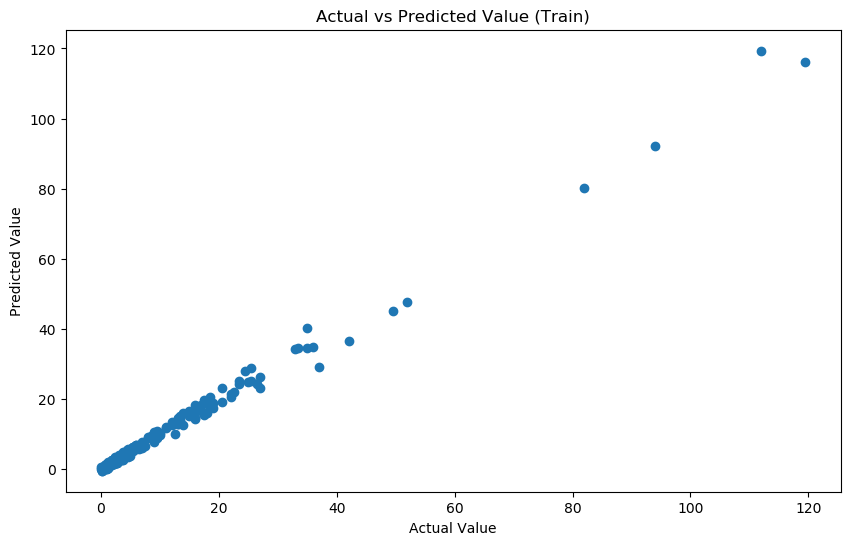

In [179]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(goalkeeper_y_train, goalkeeper_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [180]:
goalkeeper_y_pred_test = goalkeeper_lr.predict(goalkeeper_X_test)
goalkeeper_df = pd.DataFrame({'Name':goalkeeper_name_test,'Actual': goalkeeper_y_test, 'Predicted': goalkeeper_y_pred_test})
goalkeeper_df["Difference"] = goalkeeper_df["Actual"]-goalkeeper_df["Predicted"]
goalkeeper_df = round(goalkeeper_df.sort_values('Difference').set_index('Name'),2)
goalkeeper_df

Actual  Predicted  Difference
Name                                           
M. ter Stegen      99.00     106.31       -7.31
T. Courtois        85.50      91.49       -5.99
Unai Simón         34.50      38.70       -4.20
Álex Remiro        26.00      29.65       -3.65
Pacheco            17.50      20.43       -2.93
Edgar Badia        13.50      15.48       -1.98
Y. Bounou          20.50      22.37       -1.87
G. Bushchan         6.00       7.77       -1.77
M. Ryan             8.50       9.98       -1.48
U. Çakır           19.00      20.47       -1.47
A. Marchesín        8.50       9.74       -1.24
Adán                4.40       5.59       -1.19
I. Akinfeev         2.30       3.43       -1.13
A. Ramsdale        13.50      14.51       -1.01
Joel Robles         4.00       4.95       -0.95
L. Karius           4.50       5.36       -0.86
I. Meslier         20.50      21.34       -0.84
J. Joronen          0.00       0.74       -0.74
M. Günok            2.80       3.52       -0.72
A. Oukidja          5.00       5.70       -0.70
O. Kolář           10.50      11.20       -0.70
Diego López         1.60       2.26       -0.66
R. Jarstein         0.82       1.47       -0.65
Jordi               4.10       4.62       -0.52
G. Ochoa            2.30       2.79       -0.49
A. Begović          0.95       1.38       -0.43
J. Broun            0.48       0.89       -0.41
D. Ward             3.00       3.41       -0.41
D. Greif            4.50       4.88       -0.38
Mateus Pasinato     1.60       1.98       -0.38
Sivera              3.00       3.30       -0.30
S. Johnson          1.50       1.76       -0.26
Pepe Reina          1.60       1.84       -0.24
A. Lopes           20.50      20.72       -0.22
K. Lamprou          1.60       1.82       -0.22
G. Akkan            1.60       1.81       -0.21
R. Pasveer          0.48       0.66       -0.18
L. Burián           0.82       0.99       -0.17
A. Gunn             2.60       2.77       -0.17
Herrerín            1.80       1.97       -0.17
F. Rønnow           3.00       3.13       -0.13
Pierrino Faria      0.82       0.88       -0.06
Kaíquão Castro      4.60       4.65       -0.05
E. Green            4.40       4.42       -0.02
R. Gurtner          0.40       0.40       -0.00
A. McCarthy         3.00       3.00        0.00
P. Tschauner        0.21       0.19        0.02
J. Dahlin           0.40       0.34        0.06
D. Dibusz           2.00       1.90        0.10
A. Šemper           4.50       4.40        0.10
C. Álvarez          0.48       0.36        0.12
I. Provedel         3.90       3.77        0.13
S. Moyano           2.00       1.86        0.14
Héniton Pires      17.00      16.81        0.19
M. Sportiello       5.00       4.80        0.20
D. Ospina           8.50       8.28        0.22
S. Viera            0.48       0.24        0.24
A. Talavera         1.60       1.27        0.33
A. Consigli         3.60       3.26        0.34
Juan Carlos         1.00       0.66        0.34
M. Trmal            3.60       3.22        0.38
Fabricio            1.00       0.53        0.47
T. Kaminski         2.60       2.10        0.50
M. Silvestri       11.50      10.98        0.52
A. Blake            7.00       6.42        0.58
G. Alcalá           3.60       2.99        0.61
G. Herrera          4.30       3.63        0.67
P. Pentz            4.50       3.66        0.84
B. Drągowski       12.00      11.08        0.92
D. Stipica          1.60       0.64        0.96
A. Bodart           3.90       2.92        0.98
J. Graterol         3.00       1.97        1.03
D. von Ballmoos     8.00       6.71        1.29
P. Gulácsi         28.50      25.47        3.03

In [181]:
print('Mean Absolute Error:', metrics.mean_absolute_error(goalkeeper_y_test, goalkeeper_y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(goalkeeper_y_test, goalkeeper_y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_test, goalkeeper_y_pred_test)))
print('Linear Regression R^2:',goalkeeper_lr.score(goalkeeper_X_test,goalkeeper_y_test))

Mean Absolute Error: 0.8754147294912782
Mean Squared Error: 2.3500924835466237
Root Mean Squared Error: 1.5330011361856923
Linear Regression R^2: 0.990500653354697


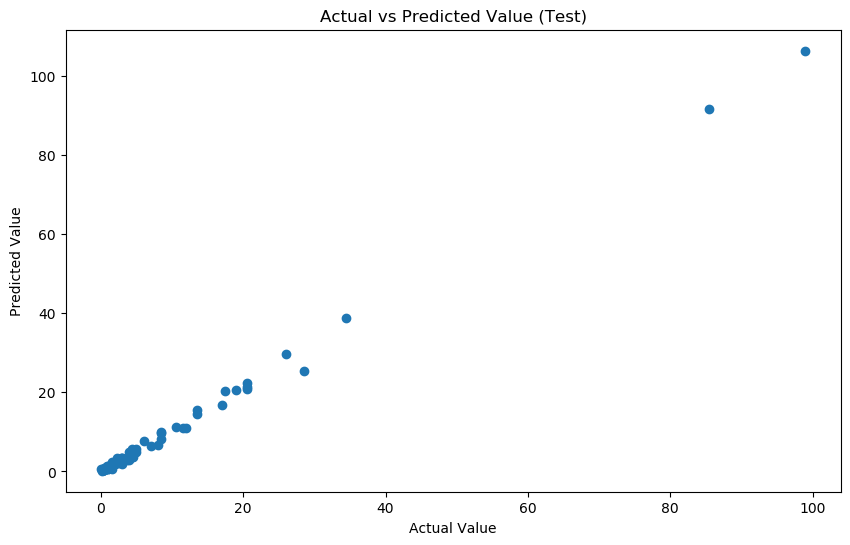

In [182]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(goalkeeper_y_test, goalkeeper_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [183]:
goalkeeper_lm = LinearRegression()
goalkeeper_scaler = StandardScaler()

goalkeeper_X_train_scaled = goalkeeper_scaler.fit_transform(goalkeeper_X_train.values)
goalkeeper_X_test_scaled = goalkeeper_scaler.transform(goalkeeper_X_test.values)

goalkeeper_lm_reg = Ridge(alpha=0.05, normalize=True)

goalkeeper_lm_lasso = Lasso(alpha=0.05, normalize=True)
goalkeeper_poly = PolynomialFeatures(degree=2) 

goalkeeper_X_train_poly = goalkeeper_poly.fit_transform(goalkeeper_X_train.values)
goalkeeper_X_test_poly = goalkeeper_poly.transform(goalkeeper_X_test.values)

goalkeeper_lm_poly = LinearRegression()

goalkeeper_lm.fit(goalkeeper_X_train, goalkeeper_y_train)
goalkeeper_lm_pred = goalkeeper_lm.predict(goalkeeper_X_test)
print(f'Linear Regression for test data R^2: {goalkeeper_lm.score(goalkeeper_X_test, goalkeeper_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_test, goalkeeper_lm_pred)))
print("")

goalkeeper_lm_reg.fit(goalkeeper_X_train_scaled, goalkeeper_y_train)
goalkeeper_lm_reg_pred = goalkeeper_lm_reg.predict(goalkeeper_X_test_scaled)
print(f'Ridge Regression for test data R^2: {goalkeeper_lm_reg.score(goalkeeper_X_test_scaled, goalkeeper_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_test, goalkeeper_lm_reg_pred)))
print("")


goalkeeper_lm_lasso.fit(goalkeeper_X_train,goalkeeper_y_train)
goalkeeper_lm_lasso_pred = goalkeeper_lm_lasso.predict(goalkeeper_X_test)
print(f'Lasso Regression for test data R^2: {goalkeeper_lm_lasso.score(goalkeeper_X_test, goalkeeper_y_test):.6f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_test, goalkeeper_lm_lasso_pred)))
print("")

goalkeeper_lm_poly.fit(goalkeeper_X_train_poly, goalkeeper_y_train)
goalkeeper_lm_poly_pred = goalkeeper_lm_poly.predict(goalkeeper_X_test_poly)
print(f'Degree 2 polynomial regression for test data R^2: {goalkeeper_lm_poly.score(goalkeeper_X_test_poly, goalkeeper_y_test):.3f}')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_test, goalkeeper_lm_poly_pred)))

Linear Regression for test data R^2: 0.991
Root Mean Squared Error: 1.5330011361856923

Ridge Regression for test data R^2: 0.995
Root Mean Squared Error: 1.1105619566083105

Lasso Regression for test data R^2: 0.995886
Root Mean Squared Error: 1.0087968151061886

Degree 2 polynomial regression for test data R^2: 0.943
Root Mean Squared Error: 3.7484749131590034


C:\Users\Mayank Gubba\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
C:\Users\Mayank Gubba\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

## MODELLING WITH SVR

#### We applied SVR with 4 different kernals ('poly' , 'linear' , 'rbf' , 'sigmoid') where 'poly' was producing the best results in terms of R^2 score

In [184]:
svr = SVR(kernel='poly').fit(goalkeeper_X_train, goalkeeper_y_train)

In [185]:
goalkeeper_y_pred = svr.predict(goalkeeper_X_train)
goalkeeper_df = pd.DataFrame({'Name':goalkeeper_name_train,'Actual': goalkeeper_y_train, 'Predicted': goalkeeper_y_pred})
goalkeeper_df["Difference"] = goalkeeper_df["Actual"]-goalkeeper_df["Predicted"]
goalkeeper_df_under = round(goalkeeper_df.sort_values('Difference').set_index('Name'),2)
goalkeeper_df_over = round(goalkeeper_df.sort_values('Difference').set_index('Name').tail(20),2)
goalkeeper_df_under

Actual  Predicted  Difference
Name                                               
M. Neuer               13.50      18.18       -4.68
K. Schmeichel           9.00      13.11       -4.11
S. Handanovič           6.00       9.40       -3.40
K. Navas               15.50      18.83       -3.33
H. Lloris              13.50      16.76       -3.26
Ł. Fabiański            3.40       6.45       -3.05
Guaita                  3.60       6.51       -2.91
F. Muslera              2.30       4.89       -2.59
M. Safonov              0.00       2.58       -2.58
S. Mandanda             2.30       4.74       -2.44
B. Foster               1.60       3.82       -2.22
S. Romero               3.00       5.18       -2.18
N. Guzmán               1.90       4.06       -2.16
J. Oblak              112.00     113.99       -1.99
Guilherme               1.20       3.18       -1.98
C. Bravo                1.60       3.51       -1.91
C. Tătărușanu           0.82       2.70       -1.88
S. Sirigu               4.40       6.21       -1.81
M. Dituro               1.80       3.55       -1.75
T. Heaton               0.62       2.24       -1.62
P. Gazzaniga            5.00       6.58       -1.58
M. Borjan               0.00       1.49       -1.49
M. Hitz                 4.60       6.08       -1.48
A. Luthe                1.30       2.77       -1.47
W. Hennessey            0.72       2.11       -1.39
F. Armani               3.60       4.97       -1.37
Adrián                  0.72       2.05       -1.33
B. Costil               5.50       6.76       -1.26
A. Trubin               2.90       4.11       -1.21
J. Hart                 0.72       1.90       -1.18
Marcelo Grohe           1.30       2.47       -1.17
F. Forster              1.80       2.96       -1.16
D. Randolph             0.72       1.87       -1.15
A. Mirante              0.82       1.90       -1.08
Andrés Fernández        1.30       2.35       -1.05
T. Krul                 3.40       4.44       -1.04
M. Stekelenburg         0.82       1.84       -1.02
J. Leca                 0.62       1.59       -0.97
J. Corona               0.82       1.79       -0.97
J. Staněk               6.00       6.92       -0.92
P. Pervan               1.40       2.28       -0.88
Roberto                 0.48       1.36       -0.88
O. Karnezis             0.35       1.21       -0.86
Neto                   13.50      14.34       -0.84
G. Buffon               2.30       3.05       -0.75
Nilson Alfarinho        0.48       1.19       -0.71
Manolo Reina            0.48       1.18       -0.70
R. Cota                 2.40       3.08       -0.68
Rui Patrício           10.00      10.65       -0.65
T. Sippel               1.00       1.65       -0.65
A. Desmas               2.10       2.73       -0.63
P. Pentke               0.35       0.96       -0.61
S. Ulreich              2.80       3.40       -0.60
Renan Ribeiro           1.20       1.80       -0.60
A. Lunin                8.00       8.57       -0.57
Rubén Blanco            6.00       6.57       -0.57
J. Hansen               0.48       1.04       -0.56
A. McGregor             0.62       1.17       -0.55
Enzo Marteiro           2.90       3.42       -0.52
V. Milinković-Savić     2.80       3.31       -0.51
E. Kawashima            0.35       0.85       -0.50
S. Kapino               3.00       3.48       -0.48
Jaim Abra               2.10       2.57       -0.47
S. Dimitrievski         6.00       6.47       -0.47
C. Pinsoglio            1.20       1.67       -0.47
D. Subašić              0.82       1.28       -0.46
M. Riemann              2.80       3.26       -0.46
J. Butland              2.40       2.86       -0.46
Bruno Varela            2.20       2.64       -0.44
Oier                    2.20       2.63       -0.43
J. Zoet                 2.80       3.23       -0.43
Robert Sanchéz          9.50       9.92       -0.42
R. Gikiewicz            5.50       5.92       -0.42
B. Samba                3.00       3.41       -0.41
Jaume                   3.70       4.11       -0.41
Sacramentinho     

In [186]:
score = svr.score(goalkeeper_X_train, goalkeeper_y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(goalkeeper_y_train, goalkeeper_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(goalkeeper_y_train, goalkeeper_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_train, goalkeeper_y_pred)))
print('SVR R^2:',score)

Mean Absolute Error: 1.0977706961007314
Mean Squared Error: 4.145242724945348
Root Mean Squared Error: 2.0359869166930684
SVR R^2: 0.9791080755568924


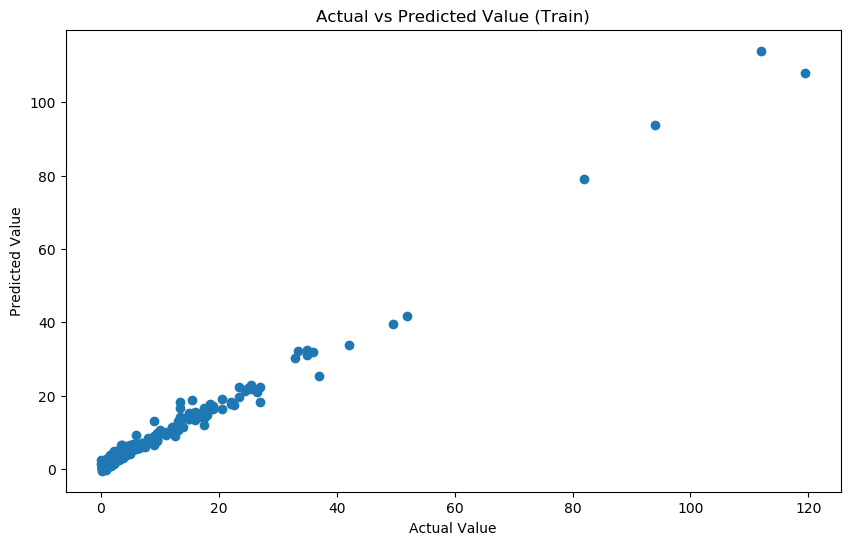

In [187]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(goalkeeper_y_train, goalkeeper_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [188]:
goalkeeper_y_pred_test = svr.predict(goalkeeper_X_test)
goalkeeper_df = pd.DataFrame({'Name':goalkeeper_name_test,'Actual': goalkeeper_y_test, 'Predicted': goalkeeper_y_pred_test})
goalkeeper_df["Difference"] = goalkeeper_df["Actual"]-goalkeeper_df["Predicted"]
goalkeeper_df_under = round(goalkeeper_df.sort_values('Difference').set_index('Name'),2)
goalkeeper_df_over = round(goalkeeper_df.sort_values('Difference').set_index('Name').tail(20),2)
goalkeeper_df_under

Actual  Predicted  Difference
Name                                           
M. ter Stegen      99.00     110.24      -11.24
T. Courtois        85.50      90.99       -5.49
I. Akinfeev         2.30       4.77       -2.47
G. Ochoa            2.30       4.54       -2.24
A. Consigli         3.60       5.81       -2.21
Adán                4.40       6.61       -2.21
Pepe Reina          1.60       3.54       -1.94
A. Begović          0.95       2.78       -1.83
O. Kolář           10.50      12.22       -1.72
Pierrino Faria      0.82       2.32       -1.50
A. Talavera         1.60       3.03       -1.43
R. Jarstein         0.82       2.24       -1.42
Diego López         1.60       2.98       -1.38
M. Günok            2.80       4.13       -1.33
L. Karius           4.50       5.79       -1.29
Joel Robles         4.00       5.10       -1.10
J. Broun            0.48       1.49       -1.01
C. Álvarez          0.48       1.47       -0.99
L. Burián           0.82       1.79       -0.97
A. Marchesín        8.50       9.41       -0.91
R. Pasveer          0.48       1.32       -0.84
Jordi               4.10       4.88       -0.78
A. McCarthy         3.00       3.72       -0.72
Herrerín            1.80       2.46       -0.66
Juan Carlos         1.00       1.59       -0.59
Fabricio            1.00       1.58       -0.58
D. Ward             3.00       3.57       -0.57
J. Joronen          0.00       0.54       -0.54
A. Oukidja          5.00       5.52       -0.52
S. Viera            0.48       0.93       -0.45
F. Rønnow           3.00       3.45       -0.45
A. Gunn             2.60       3.02       -0.42
M. Ryan             8.50       8.86       -0.36
G. Bushchan         6.00       6.35       -0.35
Sivera              3.00       3.29       -0.29
P. Tschauner        0.21       0.49       -0.28
M. Sportiello       5.00       5.21       -0.21
E. Green            4.40       4.60       -0.20
D. Greif            4.50       4.67       -0.17
T. Kaminski         2.60       2.73       -0.13
G. Akkan            1.60       1.62       -0.02
S. Johnson          1.50       1.51       -0.01
A. Šemper           4.50       4.47        0.03
Mateus Pasinato     1.60       1.53        0.07
I. Provedel         3.90       3.80        0.10
D. Ospina           8.50       8.34        0.16
K. Lamprou          1.60       1.38        0.22
R. Gurtner          0.40       0.15        0.25
D. Stipica          1.60       1.34        0.26
M. Trmal            3.60       3.34        0.26
S. Moyano           2.00       1.73        0.27
G. Herrera          4.30       4.02        0.28
A. Bodart           3.90       3.52        0.38
J. Dahlin           0.40       0.00        0.40
Kaíquão Castro      4.60       4.16        0.44
J. Graterol         3.00       2.51        0.49
G. Alcalá           3.60       3.08        0.52
P. Pentz            4.50       3.59        0.91
D. Dibusz           2.00       0.97        1.03
A. Ramsdale        13.50      12.44        1.06
D. von Ballmoos     8.00       6.89        1.11
Pacheco            17.50      16.35        1.15
A. Blake            7.00       5.69        1.31
Y. Bounou          20.50      19.10        1.40
M. Silvestri       11.50       9.91        1.59
Edgar Badia        13.50      11.79        1.71
B. Drągowski       12.00      10.06        1.94
Álex Remiro        26.00      23.72        2.28
I. Meslier         20.50      18.07        2.43
U. Çakır           19.00      16.55        2.45
A. Lopes           20.50      17.94        2.56
Héniton Pires      17.00      13.26        3.74
Unai Simón         34.50      30.71        3.79
P. Gulácsi         28.50      23.75        4.75

In [189]:
score1 = svr.score(goalkeeper_X_test, goalkeeper_y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(goalkeeper_y_test, goalkeeper_y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(goalkeeper_y_test, goalkeeper_y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_test, goalkeeper_y_pred_test)))
print('SVR R^2:',score1)

Mean Absolute Error: 1.2592174045467133
Mean Squared Error: 4.101784899762488
Root Mean Squared Error: 2.0252863747535774
SVR R^2: 0.9834201092509727


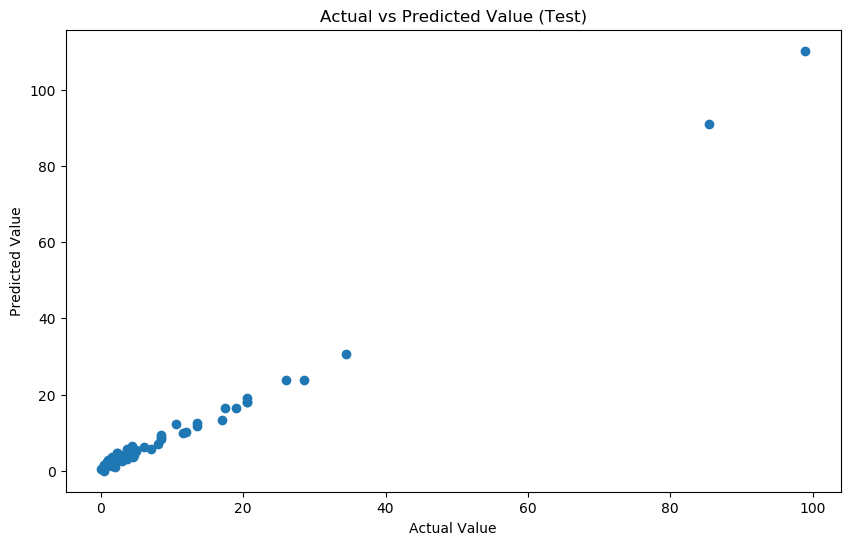

In [190]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(goalkeeper_y_test, goalkeeper_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

## MODELLING WITH GRADIENT BOOSTING REGRESSION (GBR) MODEL

In [191]:
goalkeeperGBR_model = GradientBoostingRegressor()
goalkeeperGBR=goalkeeperGBR_model.fit(goalkeeper_X_train, goalkeeper_y_train)

In [192]:
goalkeeper_y_pred = goalkeeperGBR_model.predict(goalkeeper_X_train)
goalkeeper_df = pd.DataFrame({'Name':goalkeeper_name_train,'Actual': goalkeeper_y_train, 'Predicted': goalkeeper_y_pred})
goalkeeper_df["Difference"] = goalkeeper_df["Actual"]-goalkeeper_df["Predicted"]
goalkeeper_df_under = round(goalkeeper_df.sort_values('Difference').set_index('Name'),2)
goalkeeper_df_over = round(goalkeeper_df.sort_values('Difference').set_index('Name').tail(20),2)
goalkeeper_df_under

Actual  Predicted  Difference
Name                                               
P. Bernardoni          13.00      13.67       -0.67
M. Bizot                5.50       5.98       -0.48
José Sá                15.00      15.48       -0.48
Ł. Fabiański            3.40       3.85       -0.45
Matheus                15.00      15.42       -0.42
W. Benítez             18.00      18.42       -0.42
J. Cillessen           13.00      13.42       -0.42
Miguel Silva            4.50       4.90       -0.40
Aitor                  17.00      17.40       -0.40
J. Omlin               11.00      11.40       -0.40
G. Gallon               3.60       3.99       -0.39
G. Mamardashvili       14.00      14.35       -0.35
Tiago Sá                2.70       3.05       -0.35
M. Dmitrović           16.00      16.34       -0.34
A. Desmas               2.10       2.44       -0.34
I. Arboleda             3.80       4.13       -0.33
P. Rajković            16.50      16.83       -0.33
M. Dupé                 2.00       2.32       -0.32
Oier                    2.20       2.52       -0.32
David Soria            20.50      20.81       -0.31
Sergio Asenjo          15.00      15.31       -0.31
M. Dituro               1.80       2.11       -0.31
Diogo Costa            11.00      11.31       -0.31
Dani Cárdenas           4.50       4.80       -0.30
E. Martínez            33.50      33.80       -0.30
A. Lunin                8.00       8.30       -0.30
G. Rulli               17.50      17.79       -0.29
Bruno Varela            2.20       2.49       -0.29
T. Vaclík              13.00      13.28       -0.28
Luís Maximiano         24.50      24.78       -0.28
F. Woodman              7.00       7.28       -0.28
K. Dawson               4.30       4.57       -0.27
Rui Silva              25.50      25.77       -0.27
S. Handanovič           6.00       6.27       -0.27
B. Costil               5.50       5.77       -0.27
É. Mendy               35.00      35.25       -0.25
K. Schmeichel           9.00       9.25       -0.25
O. Vlachodimos         23.50      23.74       -0.24
B. Leno                23.50      23.73       -0.23
M. Borjan               0.00       0.23       -0.23
A. Lafont              18.50      18.73       -0.23
S. Lung                 1.50       1.73       -0.23
P. Nardi                6.00       6.23       -0.23
A. Davies               1.60       1.83       -0.23
Renan Ribeiro           1.20       1.42       -0.22
Jaim Abra               2.10       2.32       -0.22
Gabri Prestão          12.00      12.22       -0.22
Neto                   13.50      13.72       -0.22
M. Rodák                5.50       5.71       -0.21
D. Bentley              2.80       3.01       -0.21
M. Dúbravka            13.00      13.21       -0.21
Munir                   1.50       1.71       -0.21
S. Rochet               9.00       9.20       -0.20
M. Schwäbe              2.00       2.20       -0.20
S. Romero               3.00       3.19       -0.19
Jaume                   3.70       3.89       -0.19
Sergio Herrera         12.00      12.19       -0.19
Freder Cabral           2.10       2.29       -0.19
M. Sels                 8.50       8.68       -0.18
M. Safonov              0.00       0.18       -0.18
G. Kobel               27.00      27.18       -0.18
J. Pickford            33.00      33.17       -0.17
D. Bertaud              2.80       2.97       -0.17
S. Scuffet              2.40       2.57       -0.17
V. Babacan              1.20       1.37       -0.17
F. Muslera              2.30       2.47       -0.17
F. Niță                 3.40       3.57       -0.17
V. Milinković-Savić     2.80       2.97       -0.17
Pedro Trigueira         0.75       0.91       -0.16
G. Buffon               2.30       2.46       -0.16
Rubén Blanco            6.00       6.15       -0.15
A. Trubin               2.90       3.05       -0.15
Nilson Alfarinho        0.48       0.63       -0.15
C. Lucchetti            0.25       0.40       -0.15
Rui Patrício           10.00      10.14       -0.14
Helton Leite      

In [193]:
score = goalkeeperGBR.score(goalkeeper_X_train, goalkeeper_y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(goalkeeper_y_train,goalkeeper_y_pred ))  
print('Mean Squared Error:', metrics.mean_squared_error(goalkeeper_y_train,goalkeeper_y_pred ))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_train,goalkeeper_y_pred )))
print('GBR R^2:',score)

Mean Absolute Error: 0.18024200989036712
Mean Squared Error: 0.061380625887382405
Root Mean Squared Error: 0.24775113700522627
GBR R^2: 0.9996906431098491


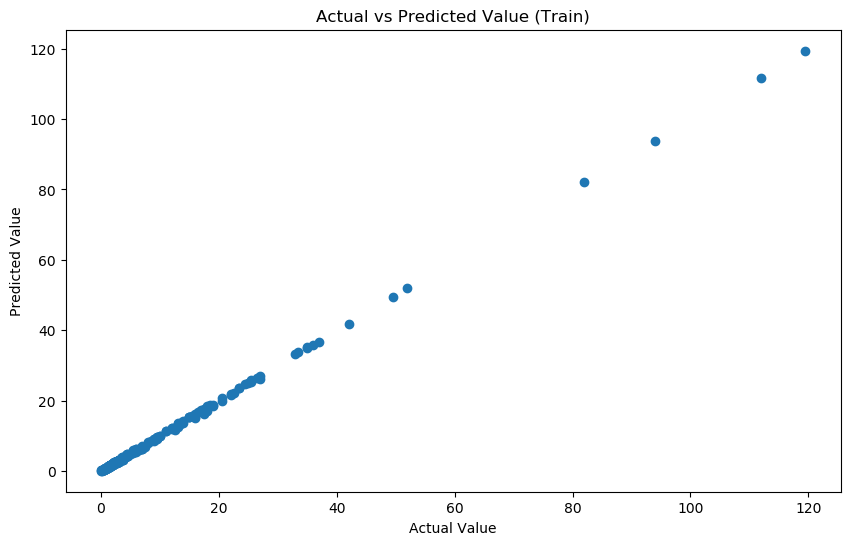

In [194]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(goalkeeper_y_train, goalkeeper_y_pred)
plt.title ("Actual vs Predicted Value (Train)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [195]:
goalkeeper_y_pred_test = goalkeeperGBR.predict(goalkeeper_X_test)
goalkeeper_df = pd.DataFrame({'Name':goalkeeper_name_test,'Actual': goalkeeper_y_test, 'Predicted': goalkeeper_y_pred_test})
goalkeeper_df["Difference"] = goalkeeper_df["Actual"]-goalkeeper_df["Predicted"]
goalkeeper_df_under = round(goalkeeper_df.sort_values('Difference').set_index('Name'),2)
goalkeeper_df_over = round(goalkeeper_df.sort_values('Difference').set_index('Name').tail(20),2)
goalkeeper_df_under

Actual  Predicted  Difference
Name                                           
M. ter Stegen      99.00     103.17       -4.17
A. Lopes           20.50      23.03       -2.53
Edgar Badia        13.50      15.63       -2.13
Pacheco            17.50      19.54       -2.04
Unai Simón         34.50      36.47       -1.97
A. Ramsdale        13.50      14.71       -1.21
M. Ryan             8.50       9.54       -1.04
Álex Remiro        26.00      26.91       -0.91
M. Trmal            3.60       4.38       -0.78
A. Marchesín        8.50       9.26       -0.76
O. Kolář           10.50      11.22       -0.72
Joel Robles         4.00       4.65       -0.65
U. Çakır           19.00      19.64       -0.64
A. Oukidja          5.00       5.53       -0.53
Sivera              3.00       3.52       -0.52
Y. Bounou          20.50      21.01       -0.51
J. Joronen          0.00       0.51       -0.51
I. Akinfeev         2.30       2.79       -0.49
Jordi               4.10       4.58       -0.48
Adán                4.40       4.86       -0.46
D. Greif            4.50       4.92       -0.42
T. Kaminski         2.60       3.00       -0.40
A. Gunn             2.60       2.98       -0.38
D. Ward             3.00       3.36       -0.36
P. Tschauner        0.21       0.55       -0.34
E. Green            4.40       4.73       -0.33
I. Meslier         20.50      20.80       -0.30
G. Akkan            1.60       1.90       -0.30
Diego López         1.60       1.88       -0.28
A. Begović          0.95       1.22       -0.27
Mateus Pasinato     1.60       1.80       -0.20
A. McCarthy         3.00       3.19       -0.19
D. Dibusz           2.00       2.18       -0.18
Herrerín            1.80       1.98       -0.18
M. Günok            2.80       2.97       -0.17
A. Talavera         1.60       1.77       -0.17
Pepe Reina          1.60       1.76       -0.16
Pierrino Faria      0.82       0.97       -0.15
L. Karius           4.50       4.65       -0.15
D. Ospina           8.50       8.62       -0.12
A. Šemper           4.50       4.62       -0.12
G. Bushchan         6.00       6.10       -0.10
S. Johnson          1.50       1.60       -0.10
R. Pasveer          0.48       0.57       -0.09
Fabricio            1.00       1.09       -0.09
Kaíquão Castro      4.60       4.67       -0.07
J. Dahlin           0.40       0.47       -0.07
G. Ochoa            2.30       2.32       -0.02
R. Gurtner          0.40       0.39        0.01
J. Broun            0.48       0.46        0.02
R. Jarstein         0.82       0.80        0.02
C. Álvarez          0.48       0.45        0.03
F. Rønnow           3.00       2.95        0.05
Juan Carlos         1.00       0.93        0.07
L. Burián           0.82       0.72        0.10
K. Lamprou          1.60       1.46        0.14
S. Moyano           2.00       1.81        0.19
D. Stipica          1.60       1.34        0.26
S. Viera            0.48       0.18        0.30
I. Provedel         3.90       3.58        0.32
M. Sportiello       5.00       4.67        0.33
G. Alcalá           3.60       3.26        0.34
A. Consigli         3.60       3.17        0.43
J. Graterol         3.00       2.53        0.47
A. Bodart           3.90       3.37        0.53
G. Herrera          4.30       3.60        0.70
P. Pentz            4.50       3.27        1.23
M. Silvestri       11.50      10.27        1.23
Héniton Pires      17.00      15.65        1.35
T. Courtois        85.50      84.00        1.50
D. von Ballmoos     8.00       6.39        1.61
A. Blake            7.00       5.29        1.71
B. Drągowski       12.00      10.12        1.88
P. Gulácsi         28.50      26.52        1.98

In [196]:
score1 = goalkeeperGBR.score(goalkeeper_X_test, goalkeeper_y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(goalkeeper_y_test,goalkeeper_y_pred_test ))  
print('Mean Squared Error:', metrics.mean_squared_error(goalkeeper_y_test,goalkeeper_y_pred_test ))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(goalkeeper_y_test,goalkeeper_y_pred_test )))
print('GBR R^2:',score1)

Mean Absolute Error: 0.6161721677464915
Mean Squared Error: 0.9107511853059583
Root Mean Squared Error: 0.9543328482798642
GBR R^2: 0.9963186379781167


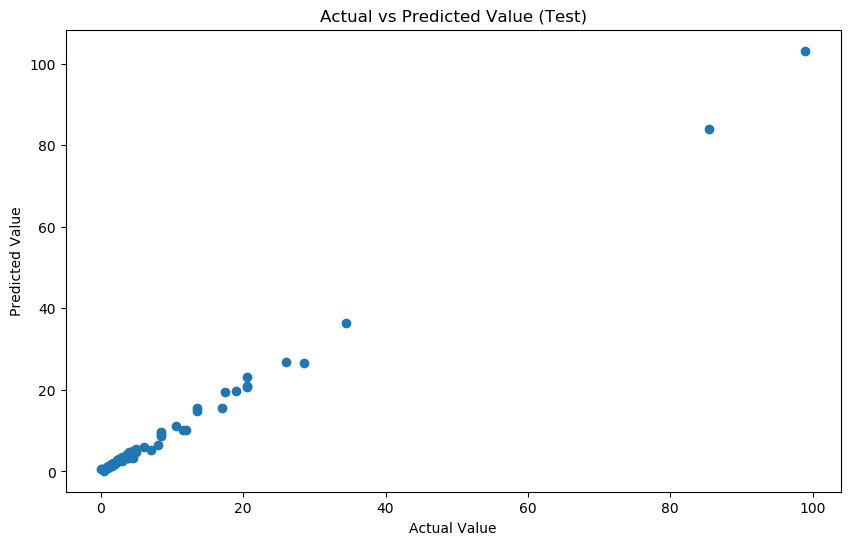

In [197]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(goalkeeper_y_test, goalkeeper_y_pred_test)
plt.title ("Actual vs Predicted Value (Test)")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()